In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import MultiLabelBinarizer

from scipy import stats

from catboost import CatBoost, Pool, CatBoostRegressor

df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

/var/folders/6n/pcltk5896ts9hbxrsn2fxxyw0000gn/T/ipykernel_41575/319679572.py:18: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')
/var/folders/6n/pcltk5896ts9hbxrsn2fxxyw0000gn/T/ipykernel_41575/319679572.py:19: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv('test.csv')


In [2]:
df.info()
df.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33538 entries, 0 to 33537
Data columns (total 65 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                33538 non-null  int64  
 1   name                              33526 non-null  object 
 2   summary                           32266 non-null  object 
 3   space                             23038 non-null  object 
 4   description                       33230 non-null  object 
 5   experiences_offered               33538 non-null  object 
 6   neighborhood_overview             19948 non-null  object 
 7   notes                             13445 non-null  object 
 8   transit                           20796 non-null  object 
 9   access                            19304 non-null  object 
 10  interaction                       18658 non-null  object 
 11  house_rules                       19983 non-null  object 
 12  host

33538

In [3]:
df = df.drop(["host_acceptance_rate", 
              "square_feet",
              "state",
              "country_code",
              "country",
              "host_id"], axis = 1)

# Remove dollar sign and convert to float, assigning it to a new column
df['extra_people'] = df['extra_people'].str.replace('^\$', '', regex=True).astype(float)


# Remove percentage sign and convert to float, assigning it to a new column
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '', regex=True).astype(float) / 100



In [4]:
df.info()
df.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33538 entries, 0 to 33537
Data columns (total 59 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                33538 non-null  int64  
 1   name                              33526 non-null  object 
 2   summary                           32266 non-null  object 
 3   space                             23038 non-null  object 
 4   description                       33230 non-null  object 
 5   experiences_offered               33538 non-null  object 
 6   neighborhood_overview             19948 non-null  object 
 7   notes                             13445 non-null  object 
 8   transit                           20796 non-null  object 
 9   access                            19304 non-null  object 
 10  interaction                       18658 non-null  object 
 11  house_rules                       19983 non-null  object 
 12  host

33538

# Numerical Data

In [5]:
df_num = df.select_dtypes(exclude=['object'])
df_num = df_num.drop(['id', 'price'], axis = 1)

In [6]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33538 entries, 0 to 33537
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_response_rate              17345 non-null  float64
 1   host_listings_count             33533 non-null  float64
 2   accommodates                    33538 non-null  int64  
 3   bathrooms                       33478 non-null  float64
 4   bedrooms                        33505 non-null  float64
 5   beds                            33507 non-null  float64
 6   guests_included                 33538 non-null  int64  
 7   extra_people                    33538 non-null  float64
 8   minimum_nights                  33538 non-null  int64  
 9   maximum_nights                  33538 non-null  int64  
 10  number_of_reviews               33538 non-null  int64  
 11  review_scores_rating            25874 non-null  float64
 12  review_scores_accuracy          

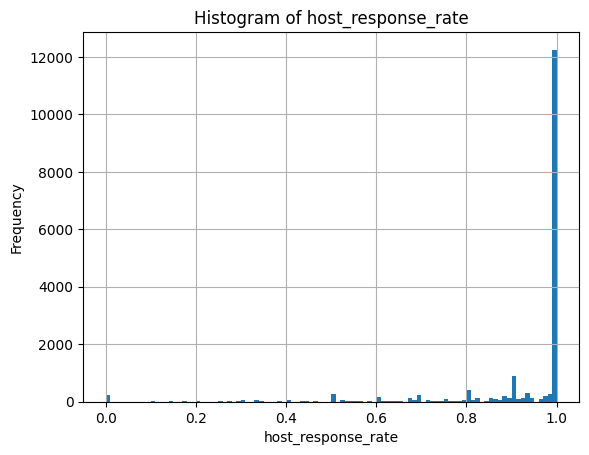

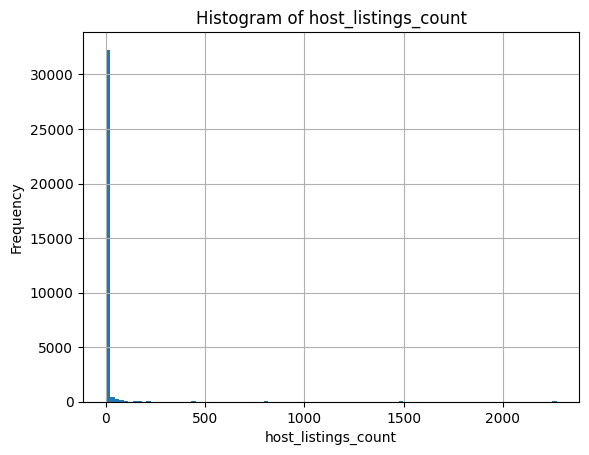

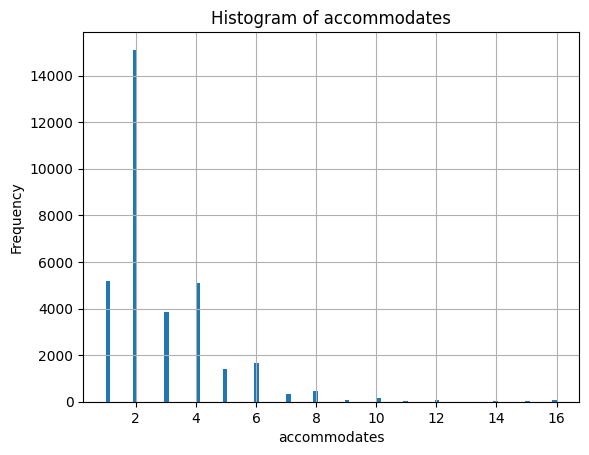

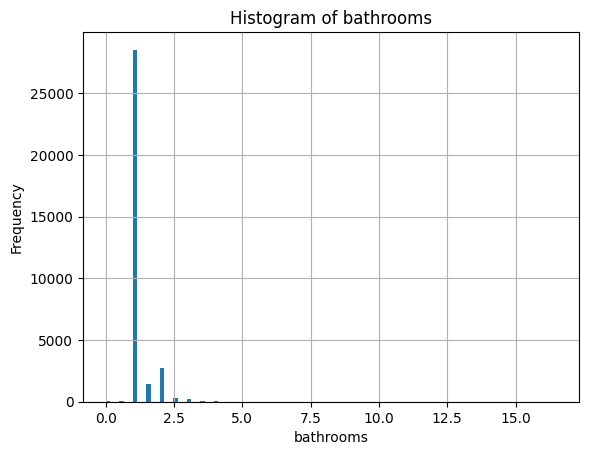

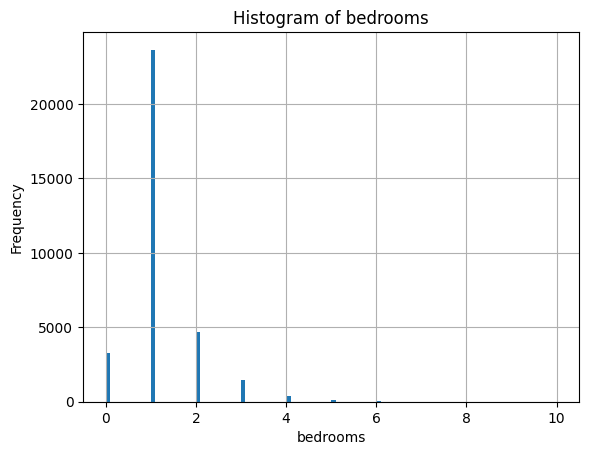

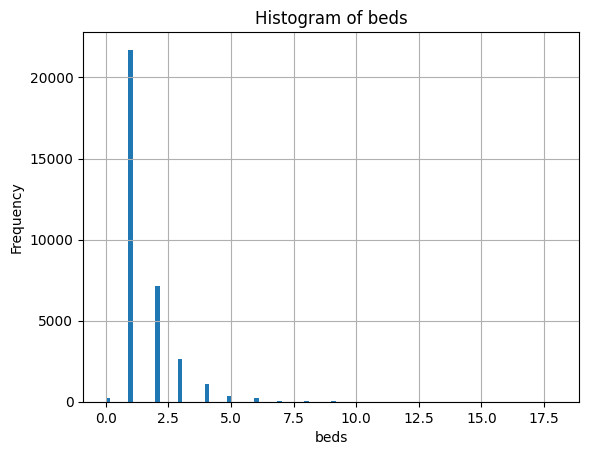

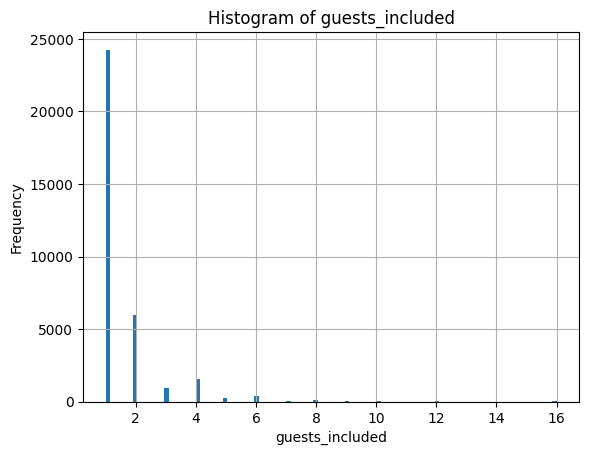

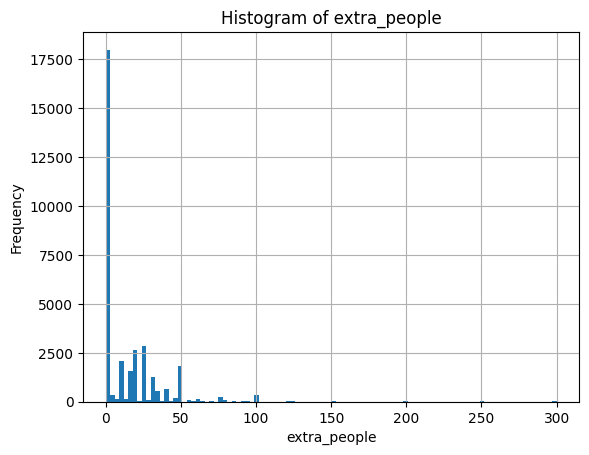

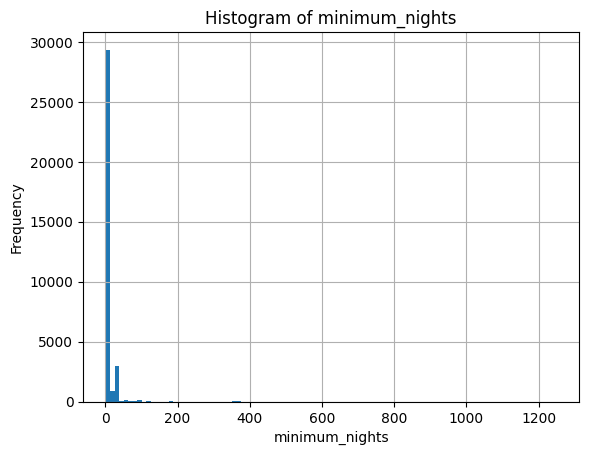

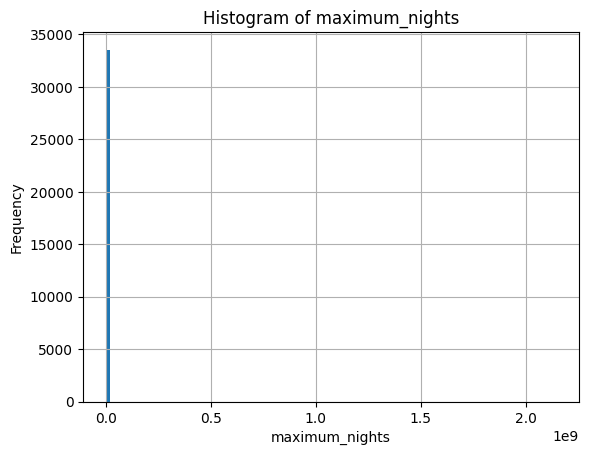

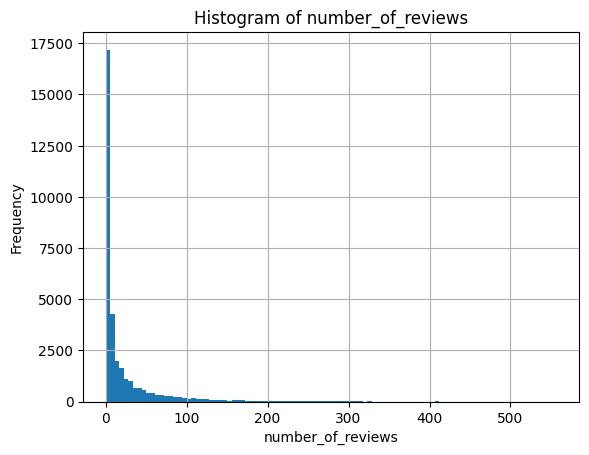

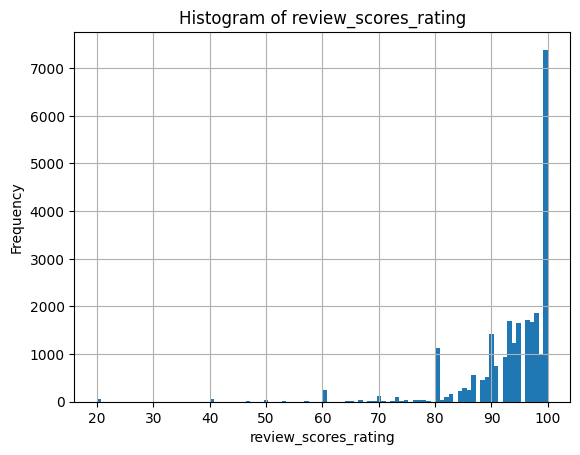

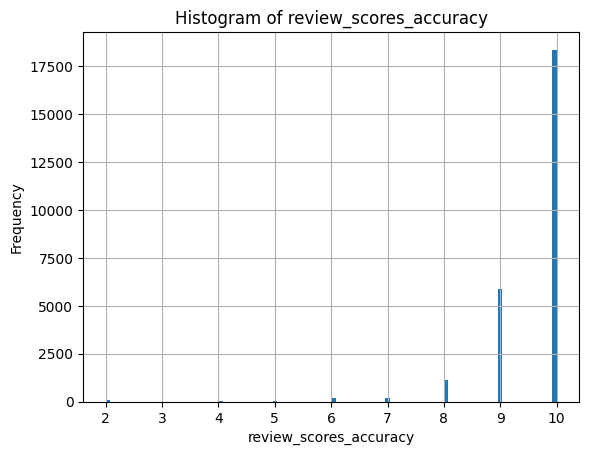

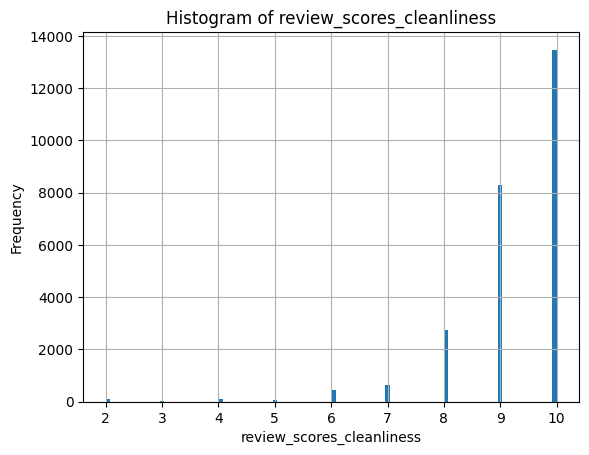

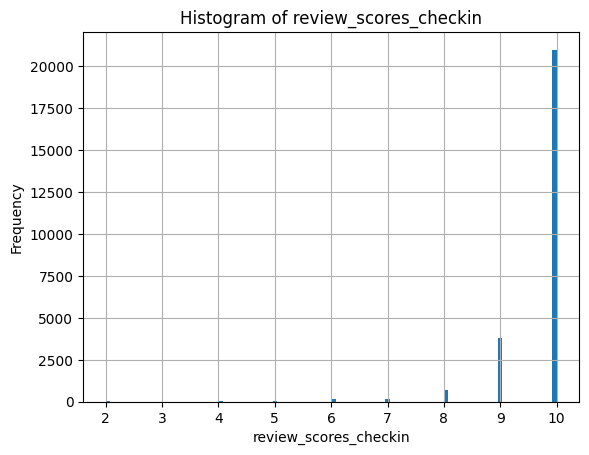

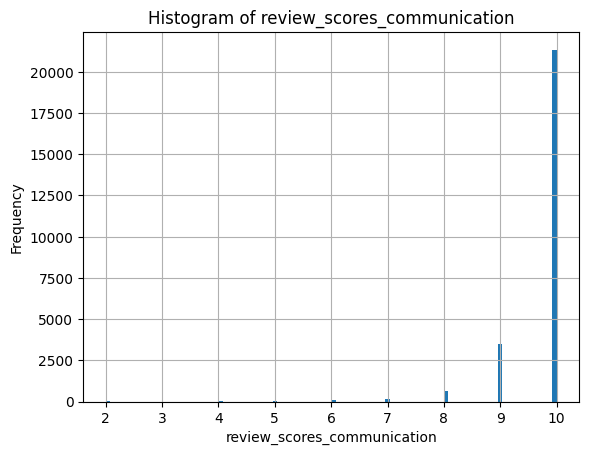

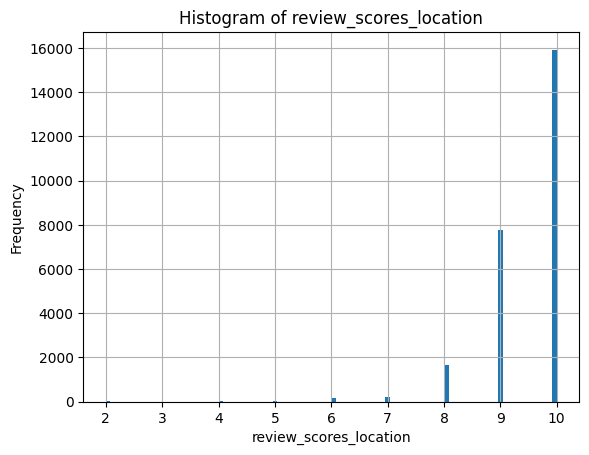

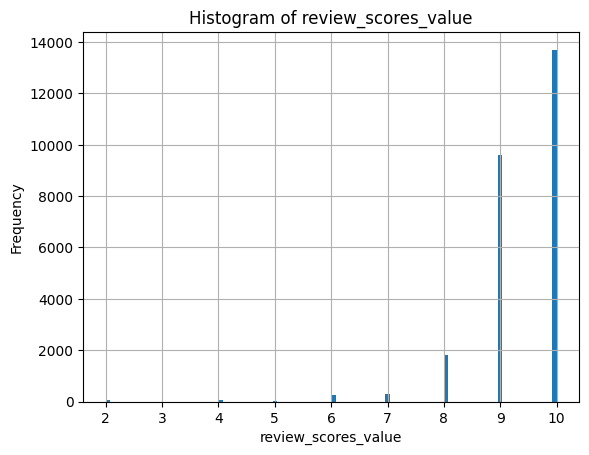

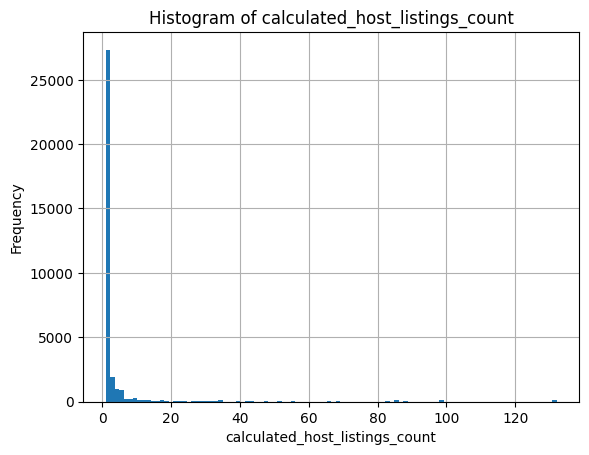

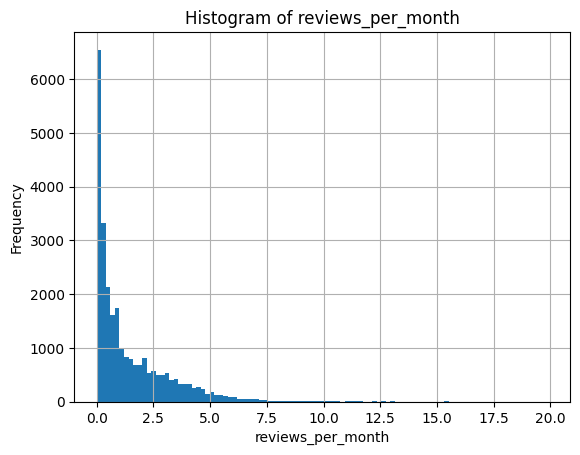

In [7]:
for feature in df_num.columns:
    df_num[feature].hist(bins=100)  # You can adjust the number of bins as needed
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature}')
    plt.grid(True)
    plt.show()

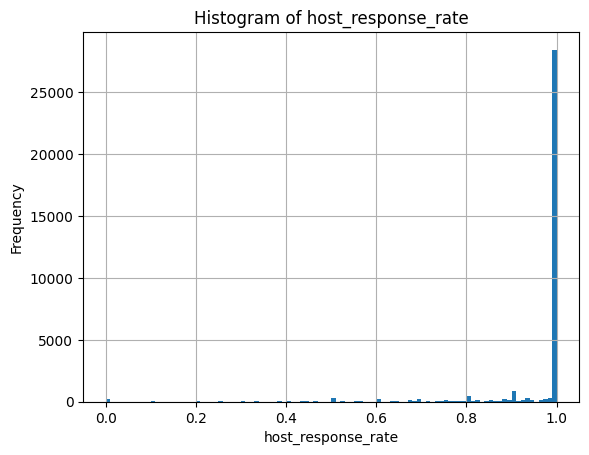

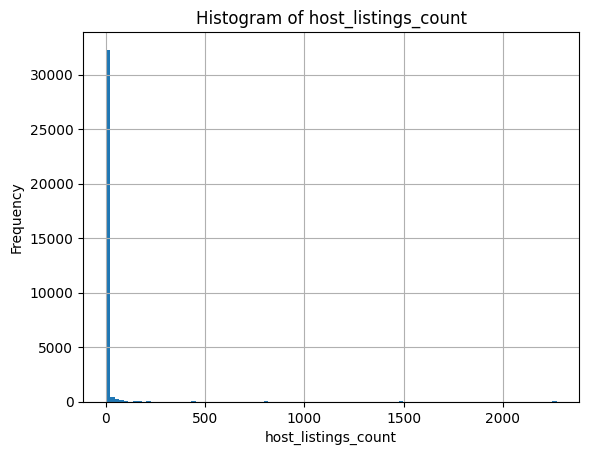

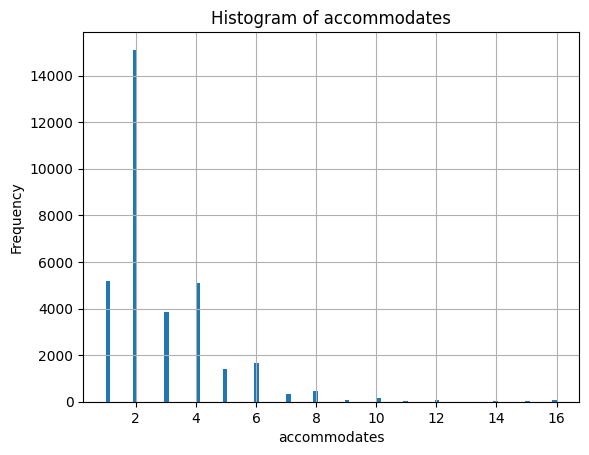

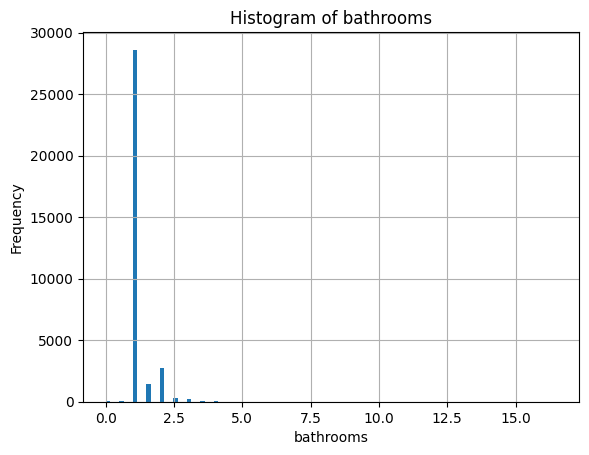

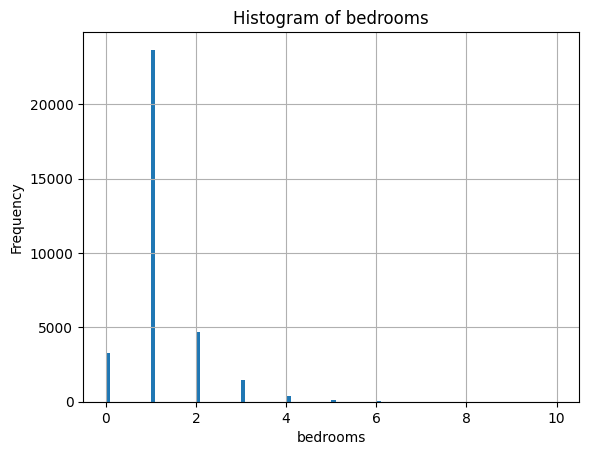

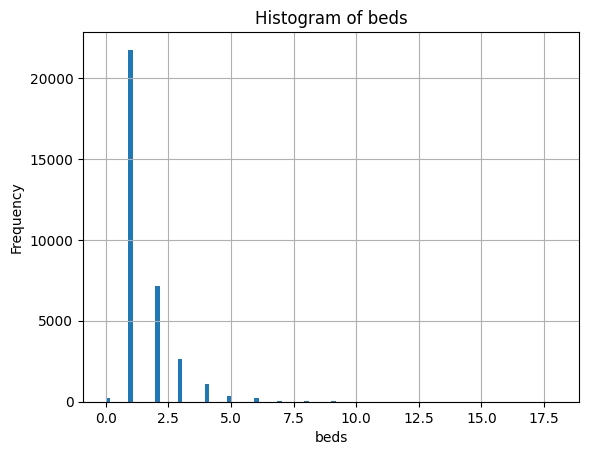

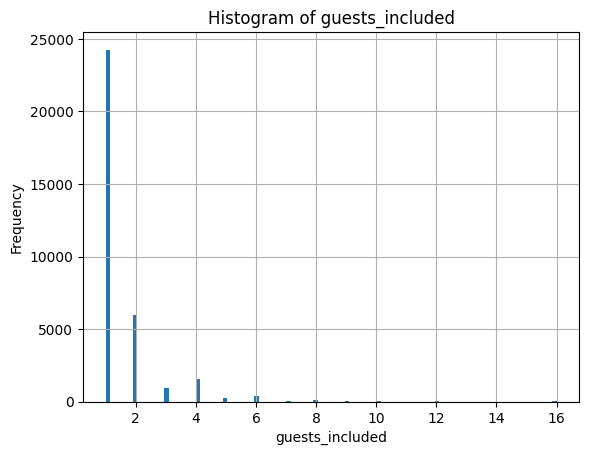

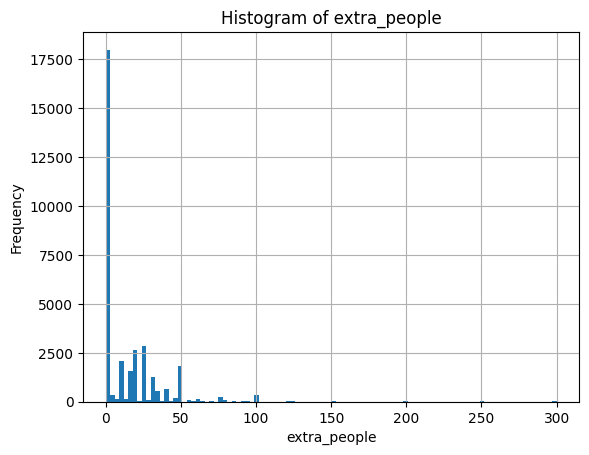

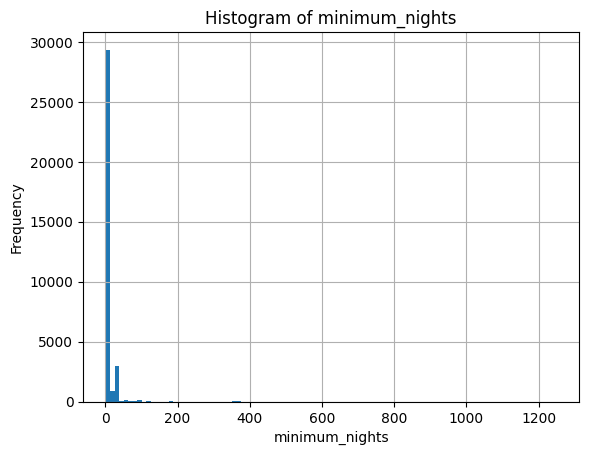

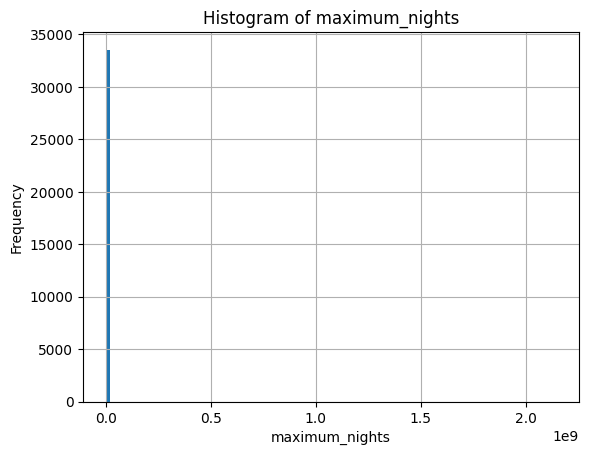

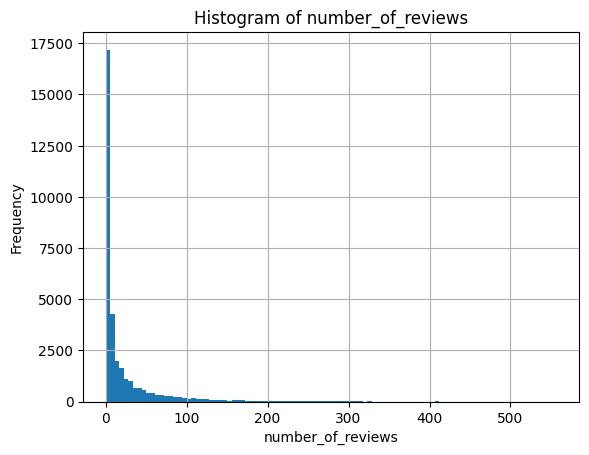

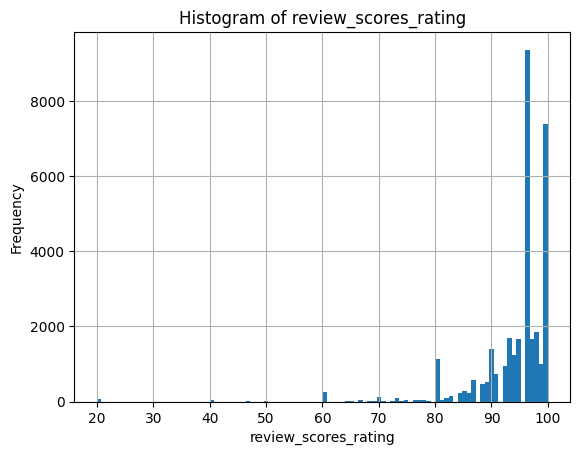

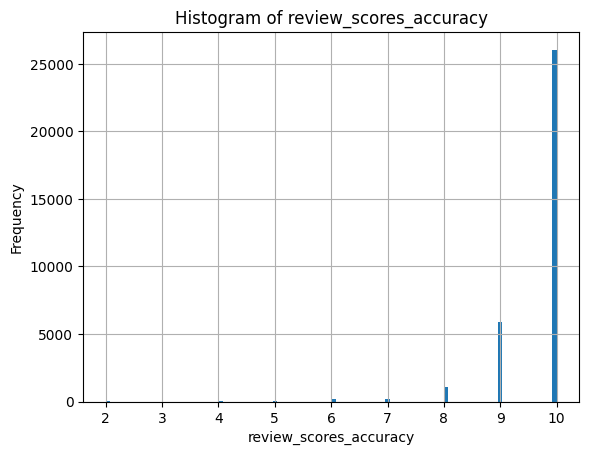

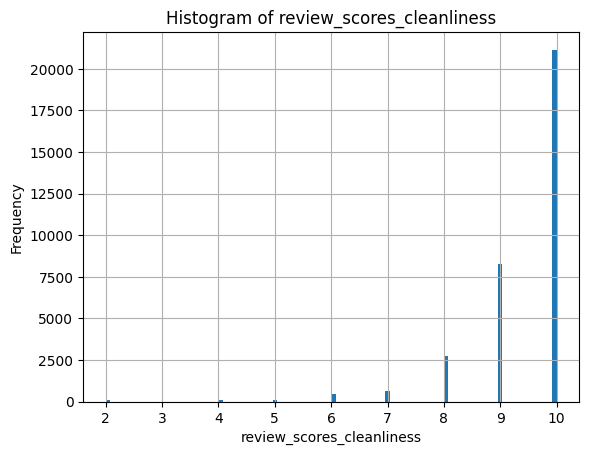

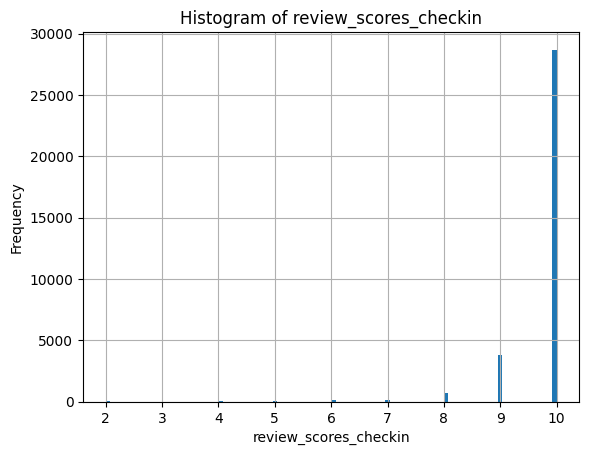

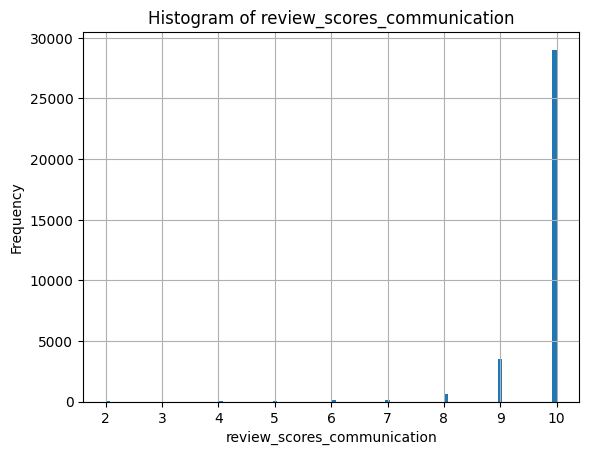

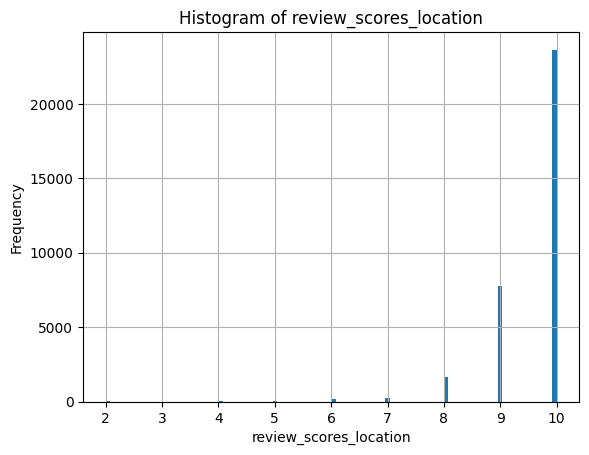

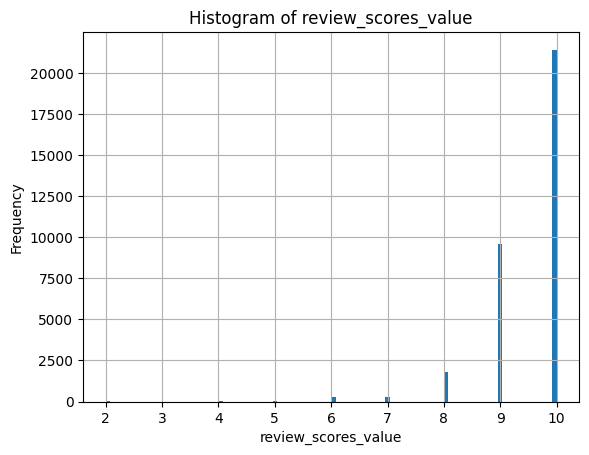

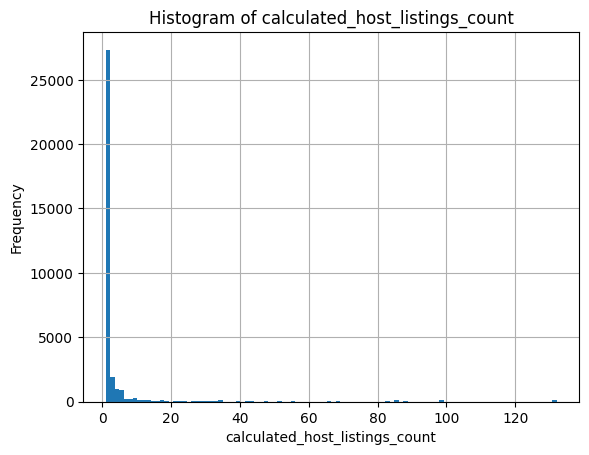

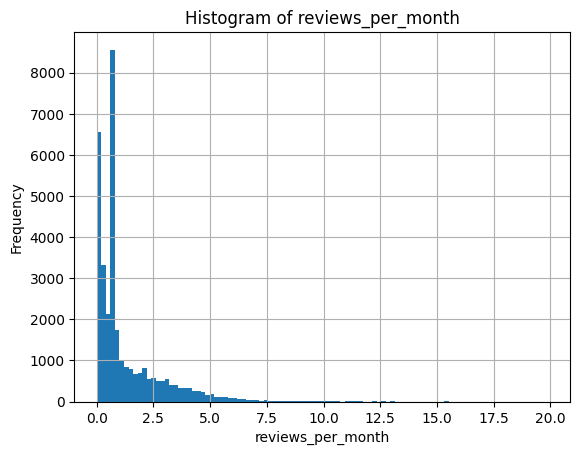

In [8]:
for feature in df_num.columns:
    median = df_num[feature].median()
    df_num[feature].fillna(median, inplace=True)
    df_num[feature].hist(bins=100)  # You can adjust the number of bins as needed
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature}')
    plt.grid(True)
    plt.show()

In [9]:
# for feature in df_num.columns:
#     Q1 = df.quantile(0.25)
#     Q3 = df.quantile(0.75)
    
#     IQR = Q3 - Q1
    
#     # Define the lower and upper bounds for outliers
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
        
#     std = np.std(df_num[feature])
#     mean = np.mean(df_num[feature])
#     median = np.median(df_num[feature])
    
#     for x in df_num[feature]:
#         if x > upper_bound:
#             df_num[feature] = df_num[feature].replace([x], median)
#         if x < lower_bound:
#             df_num[feature] = df_num[feature].replace([x], median)
        
        
# # Calculate the first quartile (Q1) and third quartile (Q3)
    
    
#     # Calculate the IQR (Interquartile Range)
   
    
    

# Categorical Data

In [10]:
df_cat = df.select_dtypes(include=['object'])
df_cat = df_cat.fillna("Unknown")

df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33538 entries, 0 to 33537
Data columns (total 37 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   name                              33538 non-null  object
 1   summary                           33538 non-null  object
 2   space                             33538 non-null  object
 3   description                       33538 non-null  object
 4   experiences_offered               33538 non-null  object
 5   neighborhood_overview             33538 non-null  object
 6   notes                             33538 non-null  object
 7   transit                           33538 non-null  object
 8   access                            33538 non-null  object
 9   interaction                       33538 non-null  object
 10  house_rules                       33538 non-null  object
 11  host_name                         33538 non-null  object
 12  host_since        

In [11]:
enc = OneHotEncoder(sparse_output = False).set_output(transform = "pandas")

features_to_be_encoded = ["host_response_time", 
                          "neighbourhood_group_cleansed", 
                          "room_type",
                          "bed_type",
                          "cancellation_policy"]

df_cat = df_cat[features_to_be_encoded]

In [12]:
for feature in features_to_be_encoded:
    feature_transformed = enc.fit_transform(df_cat[[feature]])
    
    
    df_cat = pd.concat([df_cat, feature_transformed], axis = "columns").drop([feature], axis = 1)

df_cat.head()

,host_response_time_Unknown,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,...,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_long_term,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
temp_id = test_df['id']

df_cat = pd.concat([df['id'], df_cat], axis = "columns")

#test_df = test_df.set_index('id').join(df_cat.set_index('id'))

df = pd.concat([df, df_cat], axis = "columns")

df_cat = df_cat.drop(df['id'], axis = 1)

#test_df.info(25)

In [14]:
df_cat = df_cat.rename(columns={'room_type_Entire home/apt': 'room_type_Entire_home_apt'})
test_df = test_df.rename(columns={'room_type_Entire home/apt': 'room_type_Entire_home_apt'})
df = df.rename(columns={'room_type_Entire home/apt': 'room_type_Entire_home_apt'})

print(df.columns)

Index(['id', 'name', 'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city',
       'zipcode', 'market', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores

# Dictionary data

In [15]:
# dict_features = ["amenities", "host_verifications"]

# df_dict = df.filter(dict_features, axis = 1)
# df_dict.info()

In [16]:
# mlb = MultiLabelBinarizer()

# for feature in df_dict.columns:
#     res = pd.DataFrame(mlb.fit_transform(df_dict[feature]))

In [17]:
# enc = OneHotEncoder(sparse_output = False).set_output(transform = "pandas")

# for feature in dated_features:
#     feature_transformed = enc.fit_transform(df_dict[[feature]])

#     df_dict = pd.concat([df_dict, dated_features], axis = "columns").drop([feature], axis = 1)

# df_dict.head()

# Merge data

In [18]:
df_train = pd.concat([df_num, df_cat, df['price']], axis="columns")
df_train.head(25)

,host_response_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,extra_people,minimum_nights,maximum_nights,...,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_long_term,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,price
0,1.00,1.0,2,1.0,1.0,1.0,2,30.0,7,12,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,145.0
1,1.00,4.0,8,1.0,3.0,5.0,3,19.0,3,30,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,175.0
2,1.00,1.0,2,1.0,0.0,1.0,1,0.0,2,1125,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,180.0
3,1.00,1.0,1,1.0,1.0,1.0,1,0.0,3,1125,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0
4,1.00,1.0,2,1.0,1.0,1.0,1,14.0,1,90,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0
5,0.98,104.0,6,2.5,2.0,3.0,1,0.0,30,1125,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,550.0
6,1.00,1.0,4,1.0,1.0,1.0,2,25.0,3,1125,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,177.0
7,1.00,1.0,1,1.0,1.0,3.0,1,0.0,2,2,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,70.0
8,1.00,1.0,16,2.0,0.0,1.0,1,0.0,1,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,500.0
9,1.00,1.0,4,1.0,1.0,2.0,2,25.0,1,1125,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,106.0


In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33538 entries, 0 to 33537
Data columns (total 46 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   host_response_rate                               33538 non-null  float64
 1   host_listings_count                              33538 non-null  float64
 2   accommodates                                     33538 non-null  int64  
 3   bathrooms                                        33538 non-null  float64
 4   bedrooms                                         33538 non-null  float64
 5   beds                                             33538 non-null  float64
 6   guests_included                                  33538 non-null  int64  
 7   extra_people                                     33538 non-null  float64
 8   minimum_nights                                   33538 non-null  int64  
 9   maximum_nights              

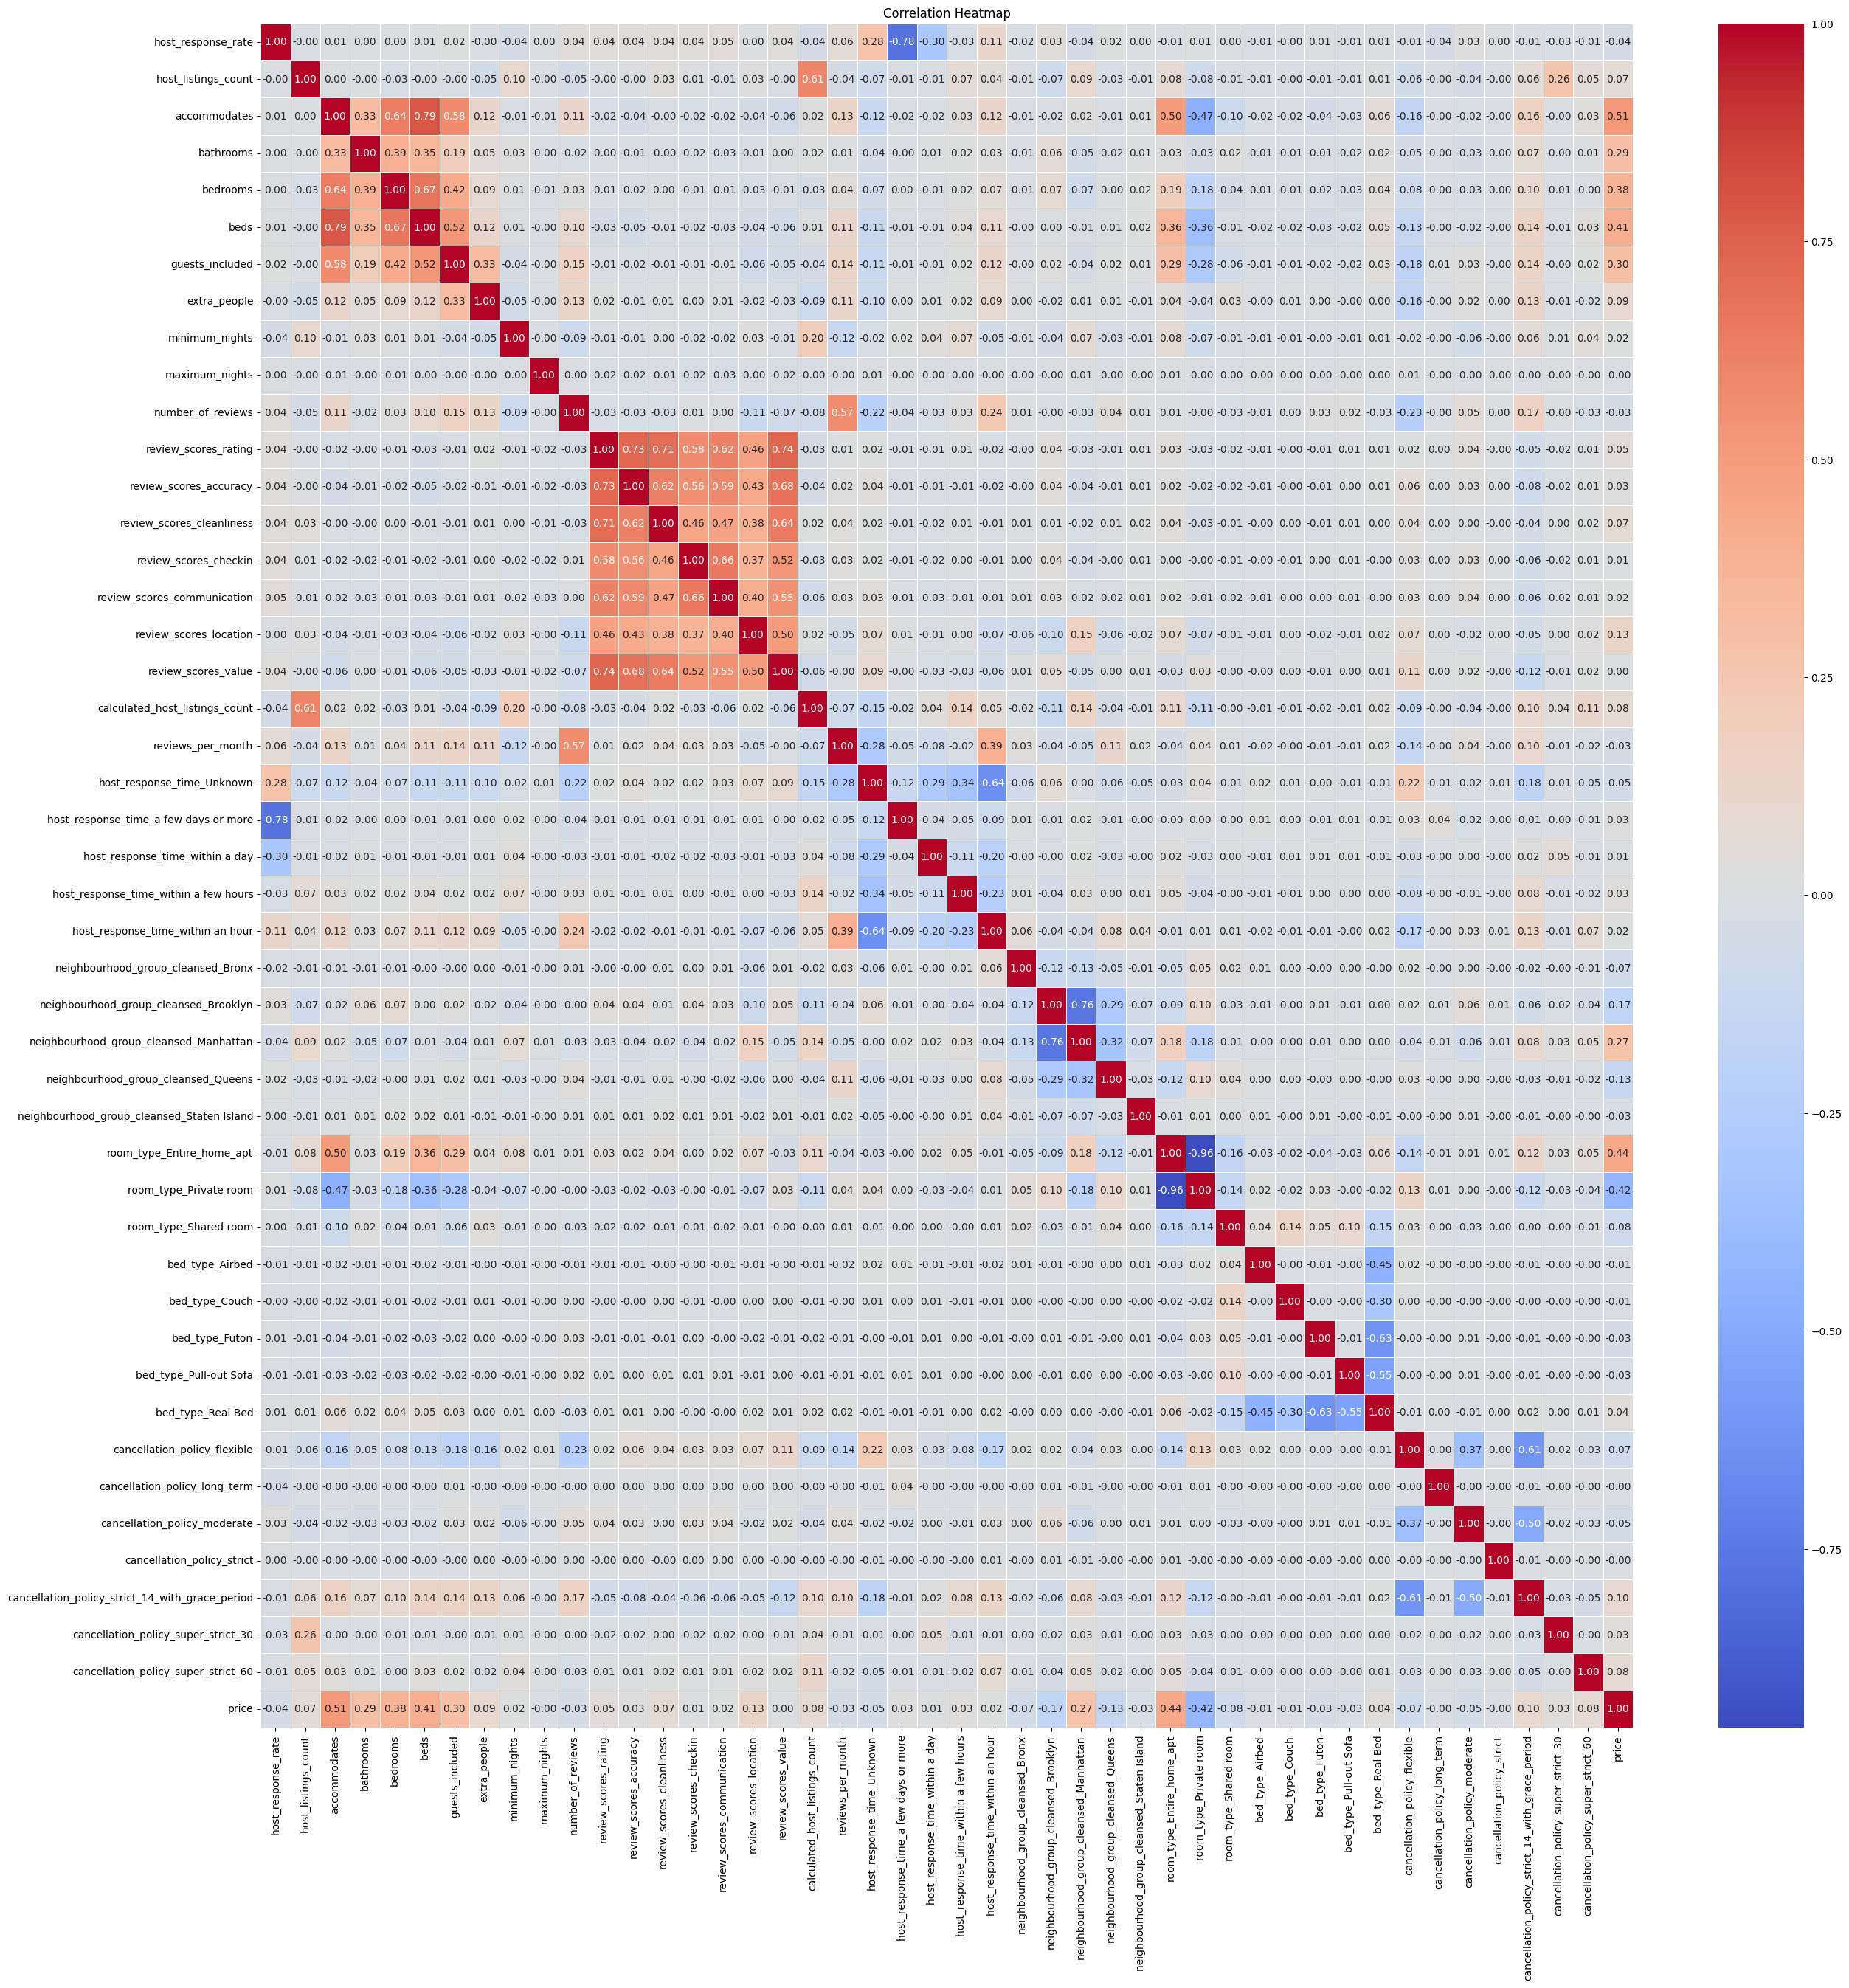

In [20]:
correlation_matrix = df_train.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


In [21]:
print(df_train.columns)

Index(['host_response_rate', 'host_listings_count', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'reviews_per_month', 'host_response_time_Unknown',
       'host_response_time_a few days or more',
       'host_response_time_within a day',
       'host_response_time_within a few hours',
       'host_response_time_within an hour',
       'neighbourhood_group_cleansed_Bronx',
       'neighbourhood_group_cleansed_Brooklyn',
       'neighbourhood_group_cleansed_Manhattan',
       'neighbourhood_group_cleansed_Queens',
       'neighbourhood_group_cleansed_Staten Island',
       'room_type_Entire_home_apt', 'room_type_Private room',
    

In [22]:
from math import isnan

def to_float(s):
    try:
        ret = float(s)
    except:
        ret = -1
    if isnan(ret):
        ret = -1
    return ret

def to_int(s):
    try:
        ret = int(s)
    except:
        ret = -1
    return ret

categories = [x for x in list(set(df['neighbourhood_group_cleansed'])) if type(x) is str]
# print(categories)

def create_feature(row):
    host_listings_count = to_float(row.host_listings_count)
    accommodates = to_int(row.accommodates) 
    bathrooms = to_float(row.bathrooms) 
    bedrooms = to_float(row.bedrooms) 
    beds = to_float(row.beds) 
    guests_included = to_int(row.guests_included) 
#     minimum_nights = to_int(row.minimum_nights) 
#     maximum_nights = to_int(row.maximum_nights) 
#     number_of_reviews = to_int(row.number_of_reviews) 
    review_scores_rating = to_float(row.review_scores_rating) 
#     review_scores_accuracy = to_float(row.review_scores_accuracy) 
    review_scores_cleanliness = to_float(row.review_scores_cleanliness) 
#     review_scores_checkin = to_float(row.review_scores_checkin) 
#     review_scores_communication = to_float(row.review_scores_communication) 
    review_scores_location = to_float(row.review_scores_location) 
#     review_scores_value = to_float(row.review_scores_value) 
    calculated_host_listings_count = to_int(row.calculated_host_listings_count) 
#     reviews_per_month = to_float(row.reviews_per_month) 
#    extra_people = to_float(row.extra_people) 
#     host_response_rate_float = to_float(row.host_response_rate_float) 
#     host_response_time_enc = to_float(row.host_response_time_enc) 
#    neighbourhood_group_cleansed_Manhattan = to_int(row.neighbourhood_group_cleansed_Manhattan) 
#    room_type_Entire_home_apt = to_float(row.room_type_Entire_home_apt) 
#     bed_type_enc = to_float(row.bed_type_enc) 
#     cancellation_policy_enc = to_float(row.cancellation_policy_enc)
    one_hot = [int(row.neighbourhood_group_cleansed == category) for category in categories]
    
    return [host_listings_count,
            accommodates, 
            bathrooms,
            bedrooms, 
            beds, 
            guests_included,
            review_scores_rating,
            review_scores_location,
            calculated_host_listings_count,
            review_scores_cleanliness
           ] + one_hot

train_X, train_y = [], []
for (idx, row) in df.iterrows():
    price = float(row.price)
    feature = create_feature(row)

    train_X.append(feature)
    train_y.append(price)

print(len(train_X), len(train_y))

33538 33538


In [23]:
test_X = train_X
test_y = df['price']

# Assume X is your feature matrix and y is your target variable
X_train, X_val, y_train, y_val = train_test_split(train_X, df['price'], test_size=0.2, random_state=42)


# Example usage:
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_val)

# Evaluate the model using metrics such as MSE, RMSE, MAE, etc.
# You can use scikit-learn's metrics module for this purpose

# Example:
# from sklearn.metrics import mean_squared_error
# mse = mean_squared_error(y_val, y_pred)
# print("Mean Squared Error:", mse)

In [24]:
# train_dataset = Pool(train_X, train_y)
train_dataset = Pool(X_train, y_train)
test_dataset = Pool(test_X, test_y)

model = CatBoostRegressor(loss_function = 'RMSE')

grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}

model.grid_search(grid, train_dataset)

pred = model.predict(X_val)
# pred = model.predict(test_X)


rmse = (np.sqrt(mean_squared_error(y_val, pred)))
# rmse = (np.sqrt(mean_squared_error(test_y, pred)))

print('Testing performance')
print('RMSE: {:.2f}'.format(rmse))

0:	learn: 192.3919398	test: 194.3862678	best: 194.3862678 (0)	total: 59.2ms	remaining: 5.86s
1:	learn: 188.6657314	test: 190.6943489	best: 190.6943489 (1)	total: 60.5ms	remaining: 2.96s
2:	learn: 185.0912444	test: 187.1540538	best: 187.1540538 (2)	total: 61.5ms	remaining: 1.99s
3:	learn: 181.6637865	test: 183.7606426	best: 183.7606426 (3)	total: 62.7ms	remaining: 1.5s
4:	learn: 178.3853726	test: 180.5720065	best: 180.5720065 (4)	total: 63.8ms	remaining: 1.21s
5:	learn: 175.2030896	test: 177.4620372	best: 177.4620372 (5)	total: 64.9ms	remaining: 1.02s
6:	learn: 172.1608544	test: 174.4513250	best: 174.4513250 (6)	total: 65.9ms	remaining: 876ms
7:	learn: 169.2315781	test: 171.5336562	best: 171.5336562 (7)	total: 67ms	remaining: 771ms
8:	learn: 166.4095553	test: 168.7433418	best: 168.7433418 (8)	total: 68.1ms	remaining: 688ms
9:	learn: 163.7420279	test: 166.0925491	best: 166.0925491 (9)	total: 69.1ms	remaining: 622ms
10:	learn: 161.1711210	test: 163.5961403	best: 163.5961403 (10)	total: 70

79:	learn: 98.8034165	test: 101.0869631	best: 101.0869631 (79)	total: 87.5ms	remaining: 21.9ms
80:	learn: 98.7727021	test: 101.0307001	best: 101.0307001 (80)	total: 90.3ms	remaining: 21.2ms
81:	learn: 98.7381975	test: 101.0146916	best: 101.0146916 (81)	total: 92.8ms	remaining: 20.4ms
82:	learn: 98.6706363	test: 100.9322026	best: 100.9322026 (82)	total: 95ms	remaining: 19.5ms
83:	learn: 98.6332613	test: 100.8975141	best: 100.8975141 (83)	total: 96.7ms	remaining: 18.4ms
84:	learn: 98.5836664	test: 100.8582040	best: 100.8582040 (84)	total: 100ms	remaining: 17.7ms
85:	learn: 98.5254052	test: 100.8287832	best: 100.8287832 (85)	total: 102ms	remaining: 16.6ms
86:	learn: 98.4991039	test: 100.7950357	best: 100.7950357 (86)	total: 103ms	remaining: 15.4ms
87:	learn: 98.4708985	test: 100.7634386	best: 100.7634386 (87)	total: 104ms	remaining: 14.2ms
88:	learn: 98.4090784	test: 100.6948736	best: 100.6948736 (88)	total: 106ms	remaining: 13ms
89:	learn: 98.3729461	test: 100.6659431	best: 100.6659431 (

22:	learn: 106.2461858	test: 108.5992038	best: 108.5992038 (22)	total: 24.5ms	remaining: 82.1ms
23:	learn: 105.8157373	test: 108.0835600	best: 108.0835600 (23)	total: 27.3ms	remaining: 86.4ms
24:	learn: 105.3674645	test: 107.6531082	best: 107.6531082 (24)	total: 30.4ms	remaining: 91.1ms
25:	learn: 105.0088751	test: 107.2745833	best: 107.2745833 (25)	total: 33.3ms	remaining: 94.8ms
26:	learn: 104.7087672	test: 106.9159130	best: 106.9159130 (26)	total: 35.2ms	remaining: 95.2ms
27:	learn: 104.4222799	test: 106.6404871	best: 106.6404871 (27)	total: 38.3ms	remaining: 98.5ms
28:	learn: 104.1733661	test: 106.3825085	best: 106.3825085 (28)	total: 41.1ms	remaining: 101ms
29:	learn: 103.8593277	test: 106.0909428	best: 106.0909428 (29)	total: 42.3ms	remaining: 98.6ms
30:	learn: 103.6190300	test: 105.8661608	best: 105.8661608 (30)	total: 43.3ms	remaining: 96.5ms
31:	learn: 103.3300009	test: 105.5663773	best: 105.5663773 (31)	total: 44.4ms	remaining: 94.4ms
32:	learn: 103.1489095	test: 105.3451885	

88:	learn: 104.8986122	test: 107.4776610	best: 107.4776610 (88)	total: 95.9ms	remaining: 11.9ms
89:	learn: 104.7840037	test: 107.3629592	best: 107.3629592 (89)	total: 99.2ms	remaining: 11ms
90:	learn: 104.6853278	test: 107.2584720	best: 107.2584720 (90)	total: 102ms	remaining: 10.1ms
91:	learn: 104.5972286	test: 107.1645982	best: 107.1645982 (91)	total: 105ms	remaining: 9.13ms
92:	learn: 104.4929341	test: 107.0559341	best: 107.0559341 (92)	total: 107ms	remaining: 8.05ms
93:	learn: 104.3977963	test: 106.9632230	best: 106.9632230 (93)	total: 109ms	remaining: 6.94ms
94:	learn: 104.3073461	test: 106.8216314	best: 106.8216314 (94)	total: 111ms	remaining: 5.86ms
95:	learn: 104.2081538	test: 106.7259529	best: 106.7259529 (95)	total: 113ms	remaining: 4.72ms
96:	learn: 104.1137791	test: 106.6308859	best: 106.6308859 (96)	total: 114ms	remaining: 3.54ms
97:	learn: 104.0387385	test: 106.5416022	best: 106.5416022 (97)	total: 116ms	remaining: 2.36ms
98:	learn: 103.9540592	test: 106.4548494	best: 106

35:	learn: 122.4415078	test: 125.5798610	best: 125.5798610 (35)	total: 65ms	remaining: 116ms
36:	learn: 121.6257464	test: 124.7709013	best: 124.7709013 (36)	total: 69.5ms	remaining: 118ms
37:	learn: 120.8603310	test: 124.0392451	best: 124.0392451 (37)	total: 72.2ms	remaining: 118ms
38:	learn: 120.1218323	test: 123.3052341	best: 123.3052341 (38)	total: 77.9ms	remaining: 122ms
39:	learn: 119.3970060	test: 122.5687448	best: 122.5687448 (39)	total: 82.1ms	remaining: 123ms
40:	learn: 118.7099256	test: 121.8503598	best: 121.8503598 (40)	total: 87.2ms	remaining: 125ms
41:	learn: 118.0320059	test: 121.1989074	best: 121.1989074 (41)	total: 90ms	remaining: 124ms
42:	learn: 117.4264555	test: 120.5925262	best: 120.5925262 (42)	total: 93.2ms	remaining: 123ms
43:	learn: 116.8178260	test: 119.9534101	best: 119.9534101 (43)	total: 95ms	remaining: 121ms
44:	learn: 116.2400761	test: 119.3650995	best: 119.3650995 (44)	total: 97.1ms	remaining: 119ms
45:	learn: 115.6856577	test: 118.7878640	best: 118.78786

65:	learn: 108.4761542	test: 111.2997629	best: 111.2997629 (65)	total: 84.8ms	remaining: 108ms
66:	learn: 108.2653172	test: 111.0880891	best: 111.0880891 (66)	total: 87.3ms	remaining: 108ms
67:	learn: 108.0539578	test: 110.8720000	best: 110.8720000 (67)	total: 89.2ms	remaining: 108ms
68:	learn: 107.8452771	test: 110.6347183	best: 110.6347183 (68)	total: 91.4ms	remaining: 107ms
69:	learn: 107.6642129	test: 110.4460122	best: 110.4460122 (69)	total: 93.5ms	remaining: 107ms
70:	learn: 107.4508375	test: 110.2340874	best: 110.2340874 (70)	total: 96.7ms	remaining: 108ms
71:	learn: 107.2525058	test: 110.0030850	best: 110.0030850 (71)	total: 99.1ms	remaining: 107ms
72:	learn: 107.1021380	test: 109.8323971	best: 109.8323971 (72)	total: 101ms	remaining: 107ms
73:	learn: 106.9137336	test: 109.6368093	best: 109.6368093 (73)	total: 102ms	remaining: 105ms
74:	learn: 106.7421501	test: 109.4003277	best: 109.4003277 (74)	total: 103ms	remaining: 103ms
75:	learn: 106.5831227	test: 109.2335684	best: 109.23

43:	learn: 101.3315371	test: 103.4907415	best: 103.4907415 (43)	total: 52.2ms	remaining: 126ms
44:	learn: 101.2301621	test: 103.4125546	best: 103.4125546 (44)	total: 54.1ms	remaining: 126ms
45:	learn: 101.1325449	test: 103.3733295	best: 103.3733295 (45)	total: 55.8ms	remaining: 126ms
46:	learn: 101.0365326	test: 103.2362540	best: 103.2362540 (46)	total: 58.5ms	remaining: 128ms
47:	learn: 100.9099408	test: 103.1054878	best: 103.1054878 (47)	total: 61ms	remaining: 130ms
48:	learn: 100.8226906	test: 103.0265894	best: 103.0265894 (48)	total: 64.3ms	remaining: 132ms
49:	learn: 100.7468534	test: 102.9588498	best: 102.9588498 (49)	total: 65.3ms	remaining: 131ms
50:	learn: 100.6761735	test: 102.8746180	best: 102.8746180 (50)	total: 66.3ms	remaining: 129ms
51:	learn: 100.5899589	test: 102.8363053	best: 102.8363053 (51)	total: 67.3ms	remaining: 127ms
52:	learn: 100.4954700	test: 102.7243304	best: 102.7243304 (52)	total: 68.5ms	remaining: 125ms
53:	learn: 100.4004696	test: 102.5808467	best: 102.5

37:	learn: 120.8558942	test: 123.9184237	best: 123.9184237 (37)	total: 45.5ms	remaining: 134ms
38:	learn: 120.1126790	test: 123.1793231	best: 123.1793231 (38)	total: 48.2ms	remaining: 137ms
39:	learn: 119.3964647	test: 122.4941395	best: 122.4941395 (39)	total: 49.7ms	remaining: 137ms
40:	learn: 118.7032266	test: 121.7682765	best: 121.7682765 (40)	total: 52.7ms	remaining: 140ms
41:	learn: 118.0229670	test: 121.1139239	best: 121.1139239 (41)	total: 55.3ms	remaining: 142ms
42:	learn: 117.4161691	test: 120.5057110	best: 120.5057110 (42)	total: 58.6ms	remaining: 146ms
43:	learn: 116.8096393	test: 119.8758498	best: 119.8758498 (43)	total: 59.7ms	remaining: 144ms
44:	learn: 116.2257941	test: 119.2804515	best: 119.2804515 (44)	total: 60.9ms	remaining: 142ms
45:	learn: 115.6680454	test: 118.6992584	best: 118.6992584 (45)	total: 61.9ms	remaining: 140ms
46:	learn: 115.1466053	test: 118.1465873	best: 118.1465873 (46)	total: 63.1ms	remaining: 138ms
47:	learn: 114.6435243	test: 117.6221573	best: 117

45:	learn: 101.1918107	test: 103.3953459	best: 103.3953459 (45)	total: 59.4ms	remaining: 134ms
46:	learn: 101.0558590	test: 103.2554589	best: 103.2554589 (46)	total: 62.6ms	remaining: 137ms
47:	learn: 100.9078217	test: 103.1044490	best: 103.1044490 (47)	total: 65.2ms	remaining: 138ms
48:	learn: 100.8204014	test: 103.0170423	best: 103.0170423 (48)	total: 67.4ms	remaining: 139ms
49:	learn: 100.7352191	test: 102.9416196	best: 102.9416196 (49)	total: 69.3ms	remaining: 139ms
50:	learn: 100.6614878	test: 102.8634381	best: 102.8634381 (50)	total: 74.1ms	remaining: 144ms
51:	learn: 100.5802701	test: 102.8290342	best: 102.8290342 (51)	total: 75.4ms	remaining: 142ms
52:	learn: 100.4616319	test: 102.6763553	best: 102.6763553 (52)	total: 76.5ms	remaining: 140ms
53:	learn: 100.3334445	test: 102.4890432	best: 102.4890432 (53)	total: 77.6ms	remaining: 138ms
54:	learn: 100.2648225	test: 102.4435160	best: 102.4435160 (54)	total: 78.6ms	remaining: 136ms
55:	learn: 100.1560711	test: 102.3348656	best: 102

54:	learn: 111.6366329	test: 114.6228420	best: 114.6228420 (54)	total: 63.9ms	remaining: 110ms
55:	learn: 111.2885869	test: 114.2452609	best: 114.2452609 (55)	total: 66.1ms	remaining: 111ms
56:	learn: 110.9583462	test: 113.8841293	best: 113.8841293 (56)	total: 69.1ms	remaining: 113ms
57:	learn: 110.6299433	test: 113.5635046	best: 113.5635046 (57)	total: 71.2ms	remaining: 113ms
58:	learn: 110.3192247	test: 113.2231826	best: 113.2231826 (58)	total: 73.2ms	remaining: 113ms
59:	learn: 110.0328297	test: 112.9218388	best: 112.9218388 (59)	total: 75.5ms	remaining: 113ms
60:	learn: 109.7492180	test: 112.6245616	best: 112.6245616 (60)	total: 77.1ms	remaining: 112ms
61:	learn: 109.4605733	test: 112.3293364	best: 112.3293364 (61)	total: 78.3ms	remaining: 111ms
62:	learn: 109.2235231	test: 112.0717347	best: 112.0717347 (62)	total: 79.3ms	remaining: 110ms
63:	learn: 108.9711290	test: 111.8241519	best: 111.8241519 (63)	total: 80.3ms	remaining: 108ms
64:	learn: 108.7346595	test: 111.5605997	best: 111

61:	learn: 99.7181188	test: 101.9878623	best: 101.9878623 (61)	total: 70.7ms	remaining: 100ms
62:	learn: 99.6404105	test: 101.8738291	best: 101.8738291 (62)	total: 74.3ms	remaining: 103ms
63:	learn: 99.5696834	test: 101.8254607	best: 101.8254607 (63)	total: 77.5ms	remaining: 104ms
64:	learn: 99.4971918	test: 101.7098306	best: 101.7098306 (64)	total: 80.6ms	remaining: 105ms
65:	learn: 99.4507727	test: 101.6430512	best: 101.6430512 (65)	total: 84ms	remaining: 107ms
66:	learn: 99.4072807	test: 101.5868095	best: 101.5868095 (66)	total: 85.5ms	remaining: 106ms
67:	learn: 99.3633603	test: 101.5397786	best: 101.5397786 (67)	total: 86.6ms	remaining: 104ms
68:	learn: 99.3173792	test: 101.5021243	best: 101.5021243 (68)	total: 88ms	remaining: 103ms
69:	learn: 99.2654474	test: 101.4913921	best: 101.4913921 (69)	total: 90ms	remaining: 103ms
70:	learn: 99.2189159	test: 101.4685740	best: 101.4685740 (70)	total: 91.1ms	remaining: 101ms
71:	learn: 99.1678307	test: 101.4452271	best: 101.4452271 (71)	tot

59:	learn: 110.0907424	test: 113.0892007	best: 113.0892007 (59)	total: 85.5ms	remaining: 128ms
60:	learn: 109.7983631	test: 112.7633981	best: 112.7633981 (60)	total: 88.3ms	remaining: 129ms
61:	learn: 109.5269938	test: 112.4689182	best: 112.4689182 (61)	total: 90.1ms	remaining: 128ms
62:	learn: 109.2929519	test: 112.2153531	best: 112.2153531 (62)	total: 91.8ms	remaining: 127ms
63:	learn: 109.0383386	test: 111.9663328	best: 111.9663328 (63)	total: 93.7ms	remaining: 126ms
64:	learn: 108.8015511	test: 111.7030493	best: 111.7030493 (64)	total: 95.4ms	remaining: 125ms
65:	learn: 108.5623964	test: 111.4658481	best: 111.4658481 (65)	total: 97.7ms	remaining: 124ms
66:	learn: 108.3469436	test: 111.2375115	best: 111.2375115 (66)	total: 98.7ms	remaining: 122ms
67:	learn: 108.1357692	test: 111.0219997	best: 111.0219997 (67)	total: 99.8ms	remaining: 120ms
68:	learn: 107.9250181	test: 110.7829328	best: 110.7829328 (68)	total: 101ms	remaining: 119ms
69:	learn: 107.7424489	test: 110.5931941	best: 110.

79:	learn: 98.8706497	test: 101.1237993	best: 101.1237993 (79)	total: 90.3ms	remaining: 79ms
80:	learn: 98.8379264	test: 101.1062570	best: 101.1062570 (80)	total: 92.4ms	remaining: 78.7ms
81:	learn: 98.8094727	test: 101.0886776	best: 101.0886776 (81)	total: 93.8ms	remaining: 77.8ms
82:	learn: 98.7806934	test: 101.0457870	best: 101.0457870 (82)	total: 96ms	remaining: 77.5ms
83:	learn: 98.7409212	test: 101.0138027	best: 101.0138027 (83)	total: 97.6ms	remaining: 76.7ms
84:	learn: 98.7061785	test: 100.9810050	best: 100.9810050 (84)	total: 101ms	remaining: 76.9ms
85:	learn: 98.6552115	test: 100.9174412	best: 100.9174412 (85)	total: 103ms	remaining: 76.9ms
86:	learn: 98.6287965	test: 100.8844524	best: 100.8844524 (86)	total: 106ms	remaining: 76.8ms
87:	learn: 98.5864713	test: 100.8661116	best: 100.8661116 (87)	total: 107ms	remaining: 75.6ms
88:	learn: 98.5344835	test: 100.7798163	best: 100.7798163 (88)	total: 108ms	remaining: 74.3ms
89:	learn: 98.5097431	test: 100.7659490	best: 100.7659490 (

102:	learn: 103.5975834	test: 106.1023083	best: 106.1023083 (102)	total: 113ms	remaining: 107ms
103:	learn: 103.5264409	test: 106.0286093	best: 106.0286093 (103)	total: 116ms	remaining: 108ms
104:	learn: 103.4539014	test: 105.9347414	best: 105.9347414 (104)	total: 119ms	remaining: 108ms
105:	learn: 103.3849310	test: 105.8652262	best: 105.8652262 (105)	total: 121ms	remaining: 107ms
106:	learn: 103.3309388	test: 105.7999092	best: 105.7999092 (106)	total: 124ms	remaining: 108ms
107:	learn: 103.2559734	test: 105.7236973	best: 105.7236973 (107)	total: 127ms	remaining: 108ms
108:	learn: 103.1905503	test: 105.6518138	best: 105.6518138 (108)	total: 129ms	remaining: 108ms
109:	learn: 103.1272313	test: 105.5863952	best: 105.5863952 (109)	total: 130ms	remaining: 107ms
110:	learn: 103.0582370	test: 105.5161005	best: 105.5161005 (110)	total: 131ms	remaining: 105ms
111:	learn: 103.0025033	test: 105.4471813	best: 105.4471813 (111)	total: 132ms	remaining: 104ms
112:	learn: 102.9273011	test: 105.369693

72:	learn: 99.1898819	test: 101.5052877	best: 101.5052877 (72)	total: 79.3ms	remaining: 138ms
73:	learn: 99.1484278	test: 101.4605395	best: 101.4605395 (73)	total: 81.9ms	remaining: 139ms
74:	learn: 99.0685652	test: 101.3784011	best: 101.3784011 (74)	total: 83.8ms	remaining: 140ms
75:	learn: 99.0356159	test: 101.3224566	best: 101.3224566 (75)	total: 87.6ms	remaining: 143ms
76:	learn: 98.9556489	test: 101.2412761	best: 101.2412761 (76)	total: 90ms	remaining: 144ms
77:	learn: 98.8894274	test: 101.1600333	best: 101.1600333 (77)	total: 93.7ms	remaining: 147ms
78:	learn: 98.8280335	test: 101.1343139	best: 101.1343139 (78)	total: 94.7ms	remaining: 145ms
79:	learn: 98.8034165	test: 101.0869631	best: 101.0869631 (79)	total: 95.8ms	remaining: 144ms
80:	learn: 98.7727021	test: 101.0307001	best: 101.0307001 (80)	total: 97ms	remaining: 142ms
81:	learn: 98.7381975	test: 101.0146916	best: 101.0146916 (81)	total: 98ms	remaining: 141ms
82:	learn: 98.6706363	test: 100.9322026	best: 100.9322026 (82)	tot

44:	learn: 116.2257941	test: 119.2804515	best: 119.2804515 (44)	total: 52.6ms	remaining: 181ms
45:	learn: 115.6680454	test: 118.6992584	best: 118.6992584 (45)	total: 55.8ms	remaining: 187ms
46:	learn: 115.1466053	test: 118.1465873	best: 118.1465873 (46)	total: 59.6ms	remaining: 194ms
47:	learn: 114.6435243	test: 117.6221573	best: 117.6221573 (47)	total: 61.8ms	remaining: 196ms
48:	learn: 114.1484672	test: 117.1354836	best: 117.1354836 (48)	total: 64.5ms	remaining: 199ms
49:	learn: 113.6670246	test: 116.6718707	best: 116.6718707 (49)	total: 65.6ms	remaining: 197ms
50:	learn: 113.2316352	test: 116.2137819	best: 116.2137819 (50)	total: 66.8ms	remaining: 195ms
51:	learn: 112.8002666	test: 115.7845011	best: 115.7845011 (51)	total: 67.9ms	remaining: 193ms
52:	learn: 112.3958388	test: 115.3562621	best: 115.3562621 (52)	total: 69ms	remaining: 191ms
53:	learn: 111.9974987	test: 114.9637221	best: 114.9637221 (53)	total: 70ms	remaining: 189ms
54:	learn: 111.6264459	test: 114.6111968	best: 114.611

14:	learn: 113.1593979	test: 116.0229038	best: 116.0229038 (14)	total: 18.2ms	remaining: 225ms
15:	learn: 111.8353475	test: 114.7120194	best: 114.7120194 (15)	total: 20.3ms	remaining: 234ms
16:	learn: 110.6770537	test: 113.2909938	best: 113.2909938 (16)	total: 22.8ms	remaining: 245ms
17:	learn: 109.7057449	test: 112.2830836	best: 112.2830836 (17)	total: 24.8ms	remaining: 251ms
18:	learn: 108.8893394	test: 111.3932403	best: 111.3932403 (18)	total: 27.9ms	remaining: 266ms
19:	learn: 108.1306964	test: 110.5332246	best: 110.5332246 (19)	total: 30.1ms	remaining: 271ms
20:	learn: 107.3817701	test: 109.7997852	best: 109.7997852 (20)	total: 33.6ms	remaining: 286ms
21:	learn: 106.7563961	test: 109.1572715	best: 109.1572715 (21)	total: 34.7ms	remaining: 281ms
22:	learn: 106.2461858	test: 108.5992038	best: 108.5992038 (22)	total: 35.7ms	remaining: 275ms
23:	learn: 105.8157373	test: 108.0835600	best: 108.0835600 (23)	total: 36.8ms	remaining: 270ms
24:	learn: 105.3674645	test: 107.6531082	best: 107

190:	learn: 95.7885393	test: 98.5950273	best: 98.5950273 (190)	total: 219ms	remaining: 10.3ms
191:	learn: 95.7826862	test: 98.5863643	best: 98.5863643 (191)	total: 221ms	remaining: 9.2ms
192:	learn: 95.7733581	test: 98.5930184	best: 98.5863643 (191)	total: 224ms	remaining: 8.11ms
193:	learn: 95.7599703	test: 98.5938481	best: 98.5863643 (191)	total: 227ms	remaining: 7.01ms
194:	learn: 95.7534408	test: 98.5959482	best: 98.5863643 (191)	total: 230ms	remaining: 5.9ms
195:	learn: 95.7371585	test: 98.5892622	best: 98.5863643 (191)	total: 233ms	remaining: 4.76ms
196:	learn: 95.7237932	test: 98.5819939	best: 98.5819939 (196)	total: 235ms	remaining: 3.57ms
197:	learn: 95.6999311	test: 98.5755914	best: 98.5755914 (197)	total: 236ms	remaining: 2.38ms
198:	learn: 95.6889703	test: 98.5560923	best: 98.5560923 (198)	total: 237ms	remaining: 1.19ms
199:	learn: 95.6832765	test: 98.5508634	best: 98.5508634 (199)	total: 238ms	remaining: 0us

bestTest = 98.55086336
bestIteration = 199

19:	loss: 98.5508634

157:	learn: 100.9188378	test: 103.2022792	best: 103.2022792 (157)	total: 178ms	remaining: 47.4ms
158:	learn: 100.8906024	test: 103.1768303	best: 103.1768303 (158)	total: 181ms	remaining: 46.7ms
159:	learn: 100.8676277	test: 103.1524987	best: 103.1524987 (159)	total: 184ms	remaining: 45.9ms
160:	learn: 100.8422372	test: 103.1233935	best: 103.1233935 (160)	total: 187ms	remaining: 45.2ms
161:	learn: 100.8148953	test: 103.0951111	best: 103.0951111 (161)	total: 189ms	remaining: 44.3ms
162:	learn: 100.7887653	test: 103.0830756	best: 103.0830756 (162)	total: 191ms	remaining: 43.5ms
163:	learn: 100.7543145	test: 103.0376591	best: 103.0376591 (163)	total: 193ms	remaining: 42.5ms
164:	learn: 100.7307241	test: 103.0103728	best: 103.0103728 (164)	total: 195ms	remaining: 41.3ms
165:	learn: 100.7098613	test: 102.9987725	best: 102.9987725 (165)	total: 196ms	remaining: 40ms
166:	learn: 100.6646645	test: 102.9346294	best: 102.9346294 (166)	total: 197ms	remaining: 38.8ms
167:	learn: 100.6348001	test: 10

132:	learn: 97.0480687	test: 99.4622678	best: 99.4622678 (132)	total: 143ms	remaining: 71.9ms
133:	learn: 97.0295356	test: 99.4591964	best: 99.4591964 (133)	total: 146ms	remaining: 71.8ms
134:	learn: 97.0113807	test: 99.4425228	best: 99.4425228 (134)	total: 149ms	remaining: 71.6ms
135:	learn: 96.9935529	test: 99.4618079	best: 99.4425228 (134)	total: 151ms	remaining: 70.9ms
136:	learn: 96.9654915	test: 99.4288182	best: 99.4288182 (136)	total: 154ms	remaining: 70.8ms
137:	learn: 96.9564093	test: 99.4271187	best: 99.4271187 (137)	total: 156ms	remaining: 70.2ms
138:	learn: 96.9316473	test: 99.3819391	best: 99.3819391 (138)	total: 158ms	remaining: 69.5ms
139:	learn: 96.9107165	test: 99.3866754	best: 99.3819391 (138)	total: 159ms	remaining: 68.3ms
140:	learn: 96.8907059	test: 99.3705435	best: 99.3705435 (140)	total: 161ms	remaining: 67.3ms
141:	learn: 96.8665851	test: 99.3698852	best: 99.3698852 (141)	total: 162ms	remaining: 66.1ms
142:	learn: 96.8563142	test: 99.3489091	best: 99.3489091 (14

103:	learn: 103.6593253	test: 106.2870842	best: 106.2870842 (103)	total: 115ms	remaining: 106ms
104:	learn: 103.5830221	test: 106.1889671	best: 106.1889671 (104)	total: 117ms	remaining: 106ms
105:	learn: 103.5159532	test: 106.1220820	best: 106.1220820 (105)	total: 119ms	remaining: 105ms
106:	learn: 103.4354611	test: 106.0440201	best: 106.0440201 (106)	total: 120ms	remaining: 105ms
107:	learn: 103.3624319	test: 105.9699714	best: 105.9699714 (107)	total: 122ms	remaining: 104ms
108:	learn: 103.3077919	test: 105.9041164	best: 105.9041164 (108)	total: 125ms	remaining: 104ms
109:	learn: 103.2430585	test: 105.8187613	best: 105.8187613 (109)	total: 127ms	remaining: 104ms
110:	learn: 103.1760269	test: 105.7504836	best: 105.7504836 (110)	total: 130ms	remaining: 104ms
111:	learn: 103.1226193	test: 105.6860470	best: 105.6860470 (111)	total: 131ms	remaining: 103ms
112:	learn: 103.0437876	test: 105.6048270	best: 105.6048270 (112)	total: 132ms	remaining: 102ms
113:	learn: 102.9709047	test: 105.509626

77:	learn: 98.9449667	test: 101.1794474	best: 101.1794474 (77)	total: 84.4ms	remaining: 132ms
78:	learn: 98.9075783	test: 101.1493554	best: 101.1493554 (78)	total: 86.8ms	remaining: 133ms
79:	learn: 98.8706497	test: 101.1237993	best: 101.1237993 (79)	total: 89.1ms	remaining: 134ms
80:	learn: 98.8379264	test: 101.1062570	best: 101.1062570 (80)	total: 91.5ms	remaining: 134ms
81:	learn: 98.8094727	test: 101.0886776	best: 101.0886776 (81)	total: 93.1ms	remaining: 134ms
82:	learn: 98.7806934	test: 101.0457870	best: 101.0457870 (82)	total: 95.9ms	remaining: 135ms
83:	learn: 98.7409212	test: 101.0138027	best: 101.0138027 (83)	total: 98.7ms	remaining: 136ms
84:	learn: 98.7061785	test: 100.9810050	best: 100.9810050 (84)	total: 99.7ms	remaining: 135ms
85:	learn: 98.6552115	test: 100.9174412	best: 100.9174412 (85)	total: 101ms	remaining: 134ms
86:	learn: 98.6287965	test: 100.8844524	best: 100.8844524 (86)	total: 102ms	remaining: 133ms
87:	learn: 98.5864713	test: 100.8661116	best: 100.8661116 (87)

35:	learn: 117.7732686	test: 120.6406518	best: 120.6406518 (35)	total: 57.1ms	remaining: 101ms
36:	learn: 116.9409432	test: 119.8265563	best: 119.8265563 (36)	total: 60.3ms	remaining: 103ms
37:	learn: 116.1127186	test: 119.0274231	best: 119.0274231 (37)	total: 65ms	remaining: 106ms
38:	learn: 115.2911398	test: 118.1984347	best: 118.1984347 (38)	total: 68.7ms	remaining: 107ms
39:	learn: 114.5555076	test: 117.4921375	best: 117.4921375 (39)	total: 71ms	remaining: 107ms
40:	learn: 113.8637169	test: 116.8130315	best: 116.8130315 (40)	total: 72.5ms	remaining: 104ms
41:	learn: 113.1777136	test: 116.1296707	best: 116.1296707 (41)	total: 75.4ms	remaining: 104ms
42:	learn: 112.5024736	test: 115.4769328	best: 115.4769328 (42)	total: 77ms	remaining: 102ms
43:	learn: 111.8939854	test: 114.8655532	best: 114.8655532 (43)	total: 78.5ms	remaining: 100ms
44:	learn: 111.2815379	test: 114.2453307	best: 114.2453307 (44)	total: 80.1ms	remaining: 97.9ms
45:	learn: 110.7004170	test: 113.6530343	best: 113.6530

61:	learn: 94.9922389	test: 98.2567609	best: 98.2567609 (61)	total: 93.8ms	remaining: 57.5ms
62:	learn: 94.9588464	test: 98.2150186	best: 98.2150186 (62)	total: 97.8ms	remaining: 57.5ms
63:	learn: 94.9011372	test: 98.1841380	best: 98.1841380 (63)	total: 101ms	remaining: 57.1ms
64:	learn: 94.8442687	test: 98.1242172	best: 98.1242172 (64)	total: 105ms	remaining: 56.5ms
65:	learn: 94.8006744	test: 97.9957492	best: 97.9957492 (65)	total: 106ms	remaining: 54.9ms
66:	learn: 94.6879183	test: 97.8401279	best: 97.8401279 (66)	total: 108ms	remaining: 53.2ms
67:	learn: 94.5932589	test: 97.8124513	best: 97.8124513 (67)	total: 109ms	remaining: 51.5ms
68:	learn: 94.5602620	test: 97.7854302	best: 97.7854302 (68)	total: 111ms	remaining: 49.8ms
69:	learn: 94.4655076	test: 97.6534940	best: 97.6534940 (69)	total: 112ms	remaining: 48.2ms
70:	learn: 94.4076883	test: 97.6655617	best: 97.6534940 (69)	total: 114ms	remaining: 46.5ms
71:	learn: 94.3698675	test: 97.6501701	best: 97.6501701 (71)	total: 115ms	rema

86:	learn: 99.8773198	test: 102.7597626	best: 102.7597626 (86)	total: 135ms	remaining: 20.2ms
87:	learn: 99.7660465	test: 102.6717733	best: 102.6717733 (87)	total: 138ms	remaining: 18.8ms
88:	learn: 99.6498382	test: 102.5379801	best: 102.5379801 (88)	total: 141ms	remaining: 17.5ms
89:	learn: 99.5442829	test: 102.4230573	best: 102.4230573 (89)	total: 146ms	remaining: 16.2ms
90:	learn: 99.4533287	test: 102.3571156	best: 102.3571156 (90)	total: 148ms	remaining: 14.6ms
91:	learn: 99.3681798	test: 102.3011484	best: 102.3011484 (91)	total: 149ms	remaining: 13ms
92:	learn: 99.2802937	test: 102.2113960	best: 102.2113960 (92)	total: 151ms	remaining: 11.3ms
93:	learn: 99.1802055	test: 102.1623211	best: 102.1623211 (93)	total: 152ms	remaining: 9.72ms
94:	learn: 99.1034754	test: 102.0815085	best: 102.0815085 (94)	total: 154ms	remaining: 8.09ms
95:	learn: 99.0288502	test: 102.0065471	best: 102.0065471 (95)	total: 155ms	remaining: 6.46ms
96:	learn: 98.9586496	test: 101.9462066	best: 101.9462066 (96)

13:	learn: 151.4229102	test: 154.0217659	best: 154.0217659 (13)	total: 24.3ms	remaining: 149ms
14:	learn: 149.0567922	test: 151.6791761	best: 151.6791761 (14)	total: 27.9ms	remaining: 158ms
15:	learn: 146.8390838	test: 149.4705156	best: 149.4705156 (15)	total: 31.2ms	remaining: 164ms
16:	learn: 144.6439088	test: 147.3162453	best: 147.3162453 (16)	total: 34.7ms	remaining: 169ms
17:	learn: 142.6228871	test: 145.3322387	best: 145.3322387 (17)	total: 37.9ms	remaining: 173ms
18:	learn: 140.6852878	test: 143.4054973	best: 143.4054973 (18)	total: 39.4ms	remaining: 168ms
19:	learn: 138.7689075	test: 141.5085830	best: 141.5085830 (19)	total: 40.9ms	remaining: 164ms
20:	learn: 136.9320302	test: 139.7006455	best: 139.7006455 (20)	total: 42.6ms	remaining: 160ms
21:	learn: 135.1978437	test: 138.0019017	best: 138.0019017 (21)	total: 44.9ms	remaining: 159ms
22:	learn: 133.6101575	test: 136.4182840	best: 136.4182840 (22)	total: 46.4ms	remaining: 155ms
23:	learn: 132.0051780	test: 134.8463530	best: 134

40:	learn: 96.8527423	test: 99.6400375	best: 99.6400375 (40)	total: 62.5ms	remaining: 89.9ms
41:	learn: 96.7647578	test: 99.5439500	best: 99.5439500 (41)	total: 66.6ms	remaining: 91.9ms
42:	learn: 96.5599075	test: 99.2901003	best: 99.2901003 (42)	total: 70.8ms	remaining: 93.9ms
43:	learn: 96.4522939	test: 99.2044674	best: 99.2044674 (43)	total: 74.9ms	remaining: 95.3ms
44:	learn: 96.3063718	test: 99.0741580	best: 99.0741580 (44)	total: 76.9ms	remaining: 94ms
45:	learn: 96.2143866	test: 99.0308005	best: 99.0308005 (45)	total: 78.9ms	remaining: 92.6ms
46:	learn: 96.1336437	test: 98.9473463	best: 98.9473463 (46)	total: 80.4ms	remaining: 90.7ms
47:	learn: 96.0553419	test: 98.8474714	best: 98.8474714 (47)	total: 82ms	remaining: 88.8ms
48:	learn: 95.9922624	test: 98.7744395	best: 98.7744395 (48)	total: 83.4ms	remaining: 86.8ms
49:	learn: 95.9367677	test: 98.7386542	best: 98.7386542 (49)	total: 85ms	remaining: 85ms
50:	learn: 95.9058882	test: 98.7255061	best: 98.7255061 (50)	total: 86.4ms	rem

65:	learn: 103.6133733	test: 106.6253922	best: 106.6253922 (65)	total: 103ms	remaining: 53.2ms
66:	learn: 103.3595012	test: 106.3513287	best: 106.3513287 (66)	total: 107ms	remaining: 52.8ms
67:	learn: 103.1223568	test: 106.1065077	best: 106.1065077 (67)	total: 110ms	remaining: 52ms
68:	learn: 102.9237702	test: 105.8990631	best: 105.8990631 (68)	total: 116ms	remaining: 51.9ms
69:	learn: 102.7371571	test: 105.7348804	best: 105.7348804 (69)	total: 117ms	remaining: 50.2ms
70:	learn: 102.5446851	test: 105.5320320	best: 105.5320320 (70)	total: 118ms	remaining: 48.4ms
71:	learn: 102.3538057	test: 105.3495190	best: 105.3495190 (71)	total: 120ms	remaining: 46.6ms
72:	learn: 102.1676708	test: 105.1532720	best: 105.1532720 (72)	total: 121ms	remaining: 44.9ms
73:	learn: 101.9984016	test: 104.9635156	best: 104.9635156 (73)	total: 123ms	remaining: 43.1ms
74:	learn: 101.8338051	test: 104.8066188	best: 104.8066188 (74)	total: 124ms	remaining: 41.4ms
75:	learn: 101.6539356	test: 104.6247640	best: 104.6

90:	learn: 93.9607339	test: 97.2078360	best: 97.2078360 (90)	total: 138ms	remaining: 13.6ms
91:	learn: 93.9045884	test: 97.1672712	best: 97.1672712 (91)	total: 141ms	remaining: 12.3ms
92:	learn: 93.8498719	test: 97.1499303	best: 97.1499303 (92)	total: 145ms	remaining: 10.9ms
93:	learn: 93.8276464	test: 97.1418110	best: 97.1418110 (93)	total: 148ms	remaining: 9.46ms
94:	learn: 93.7975187	test: 97.1399015	best: 97.1399015 (94)	total: 152ms	remaining: 7.98ms
95:	learn: 93.7786411	test: 97.1285602	best: 97.1285602 (95)	total: 153ms	remaining: 6.38ms
96:	learn: 93.7521023	test: 97.1078566	best: 97.1078566 (96)	total: 155ms	remaining: 4.78ms
97:	learn: 93.7181083	test: 97.1053314	best: 97.1053314 (97)	total: 156ms	remaining: 3.19ms
98:	learn: 93.6657760	test: 97.0328416	best: 97.0328416 (98)	total: 157ms	remaining: 1.59ms
99:	learn: 93.6394225	test: 97.0236632	best: 97.0236632 (99)	total: 159ms	remaining: 0us

bestTest = 97.0236632
bestIteration = 99

31:	loss: 97.0236632	best: 96.6763245 (2

113:	learn: 97.7894775	test: 100.6623925	best: 100.6623925 (113)	total: 179ms	remaining: 56.4ms
114:	learn: 97.7322292	test: 100.6351354	best: 100.6351354 (114)	total: 182ms	remaining: 55.5ms
115:	learn: 97.6852709	test: 100.5683410	best: 100.5683410 (115)	total: 187ms	remaining: 54.9ms
116:	learn: 97.6258969	test: 100.5274243	best: 100.5274243 (116)	total: 191ms	remaining: 54ms
117:	learn: 97.5676583	test: 100.4563924	best: 100.4563924 (117)	total: 193ms	remaining: 52.3ms
118:	learn: 97.5272414	test: 100.4169676	best: 100.4169676 (118)	total: 194ms	remaining: 50.6ms
119:	learn: 97.4755487	test: 100.3577410	best: 100.3577410 (119)	total: 196ms	remaining: 49ms
120:	learn: 97.4425975	test: 100.3206660	best: 100.3206660 (120)	total: 198ms	remaining: 47.4ms
121:	learn: 97.3979079	test: 100.2812748	best: 100.2812748 (121)	total: 200ms	remaining: 45.9ms
122:	learn: 97.3475863	test: 100.2198926	best: 100.2198926 (122)	total: 201ms	remaining: 44.2ms
123:	learn: 97.2879260	test: 100.1417147	bes

89:	learn: 93.4629102	test: 96.9979015	best: 96.9979015 (89)	total: 134ms	remaining: 89.6ms
90:	learn: 93.4408866	test: 96.9879410	best: 96.9879410 (90)	total: 138ms	remaining: 89.6ms
91:	learn: 93.3761095	test: 96.9355349	best: 96.9355349 (91)	total: 141ms	remaining: 88.7ms
92:	learn: 93.3119478	test: 96.8686641	best: 96.8686641 (92)	total: 145ms	remaining: 88.9ms
93:	learn: 93.2901372	test: 96.8515963	best: 96.8515963 (93)	total: 148ms	remaining: 88.2ms
94:	learn: 93.2446611	test: 96.8429415	best: 96.8429415 (94)	total: 150ms	remaining: 86.7ms
95:	learn: 93.2032317	test: 96.8088263	best: 96.8088263 (95)	total: 153ms	remaining: 85.9ms
96:	learn: 93.1556730	test: 96.7695785	best: 96.7695785 (96)	total: 155ms	remaining: 84.5ms
97:	learn: 93.1274152	test: 96.7721047	best: 96.7695785 (96)	total: 156ms	remaining: 82.7ms
98:	learn: 93.0774405	test: 96.7433063	best: 96.7433063 (98)	total: 157ms	remaining: 81.1ms
99:	learn: 93.0257184	test: 96.7192142	best: 96.7192142 (99)	total: 159ms	remain

63:	learn: 103.7266510	test: 106.6904863	best: 106.6904863 (63)	total: 98.1ms	remaining: 132ms
64:	learn: 103.4846283	test: 106.4445336	best: 106.4445336 (64)	total: 103ms	remaining: 135ms
65:	learn: 103.2541986	test: 106.2032572	best: 106.2032572 (65)	total: 106ms	remaining: 135ms
66:	learn: 103.0287863	test: 105.9474017	best: 105.9474017 (66)	total: 111ms	remaining: 137ms
67:	learn: 102.7973256	test: 105.7091735	best: 105.7091735 (67)	total: 112ms	remaining: 136ms
68:	learn: 102.6101245	test: 105.5127544	best: 105.5127544 (68)	total: 115ms	remaining: 135ms
69:	learn: 102.4116498	test: 105.3414838	best: 105.3414838 (69)	total: 117ms	remaining: 134ms
70:	learn: 102.2384364	test: 105.1577038	best: 105.1577038 (70)	total: 118ms	remaining: 132ms
71:	learn: 102.0454197	test: 104.9710417	best: 104.9710417 (71)	total: 120ms	remaining: 130ms
72:	learn: 101.8704993	test: 104.7834721	best: 104.7834721 (72)	total: 121ms	remaining: 128ms
73:	learn: 101.7029934	test: 104.5989635	best: 104.5989635 

39:	learn: 97.0622035	test: 99.9886316	best: 99.9886316 (39)	total: 59.8ms	remaining: 165ms
40:	learn: 96.9101364	test: 99.8314475	best: 99.8314475 (40)	total: 63.9ms	remaining: 170ms
41:	learn: 96.7752522	test: 99.7046547	best: 99.7046547 (41)	total: 68.4ms	remaining: 176ms
42:	learn: 96.6191320	test: 99.5558488	best: 99.5558488 (42)	total: 71.5ms	remaining: 178ms
43:	learn: 96.5113730	test: 99.4444336	best: 99.4444336 (43)	total: 74.8ms	remaining: 180ms
44:	learn: 96.4043680	test: 99.4764091	best: 99.4444336 (43)	total: 76.3ms	remaining: 178ms
45:	learn: 96.3153691	test: 99.3700320	best: 99.3700320 (45)	total: 77.8ms	remaining: 176ms
46:	learn: 96.2309849	test: 99.2492365	best: 99.2492365 (46)	total: 79.3ms	remaining: 174ms
47:	learn: 96.0570944	test: 99.0274929	best: 99.0274929 (47)	total: 80.6ms	remaining: 171ms
48:	learn: 95.9883180	test: 98.9905380	best: 98.9905380 (48)	total: 82.2ms	remaining: 170ms
49:	learn: 95.9125577	test: 98.9560592	best: 98.9560592 (49)	total: 83.7ms	remai

12:	learn: 153.7446573	test: 156.3270921	best: 156.3270921 (12)	total: 22.3ms	remaining: 235ms
13:	learn: 151.4229102	test: 154.0217659	best: 154.0217659 (13)	total: 27.1ms	remaining: 264ms
14:	learn: 149.0567922	test: 151.6791761	best: 151.6791761 (14)	total: 31ms	remaining: 279ms
15:	learn: 146.8390838	test: 149.4705156	best: 149.4705156 (15)	total: 34.7ms	remaining: 290ms
16:	learn: 144.6439088	test: 147.3162453	best: 147.3162453 (16)	total: 36.3ms	remaining: 284ms
17:	learn: 142.6228871	test: 145.3322387	best: 145.3322387 (17)	total: 38ms	remaining: 279ms
18:	learn: 140.6852878	test: 143.4054973	best: 143.4054973 (18)	total: 39.8ms	remaining: 274ms
19:	learn: 138.7689075	test: 141.5085830	best: 141.5085830 (19)	total: 41.3ms	remaining: 269ms
20:	learn: 136.9320302	test: 139.7006455	best: 139.7006455 (20)	total: 42.9ms	remaining: 263ms
21:	learn: 135.1978437	test: 138.0019017	best: 138.0019017 (21)	total: 44.3ms	remaining: 258ms
22:	learn: 133.6101575	test: 136.4182840	best: 136.418

139:	learn: 96.6869692	test: 99.4755060	best: 99.4755060 (139)	total: 222ms	remaining: 15.9ms
140:	learn: 96.6536680	test: 99.4547517	best: 99.4547517 (140)	total: 226ms	remaining: 14.4ms
141:	learn: 96.6281782	test: 99.4296860	best: 99.4296860 (141)	total: 231ms	remaining: 13ms
142:	learn: 96.6001267	test: 99.4107398	best: 99.4107398 (142)	total: 236ms	remaining: 11.5ms
143:	learn: 96.5663320	test: 99.3835521	best: 99.3835521 (143)	total: 237ms	remaining: 9.88ms
144:	learn: 96.5270292	test: 99.3415974	best: 99.3415974 (144)	total: 239ms	remaining: 8.23ms
145:	learn: 96.4916703	test: 99.2974639	best: 99.2974639 (145)	total: 240ms	remaining: 6.58ms
146:	learn: 96.4617357	test: 99.2752669	best: 99.2752669 (146)	total: 242ms	remaining: 4.93ms
147:	learn: 96.4401955	test: 99.2530856	best: 99.2530856 (147)	total: 243ms	remaining: 3.28ms
148:	learn: 96.4101018	test: 99.2162747	best: 99.2162747 (148)	total: 246ms	remaining: 1.65ms
149:	learn: 96.3771674	test: 99.1890053	best: 99.1890053 (149)

116:	learn: 92.6958442	test: 96.3545372	best: 96.3545372 (116)	total: 176ms	remaining: 49.5ms
117:	learn: 92.6753803	test: 96.3771157	best: 96.3545372 (116)	total: 179ms	remaining: 48.4ms
118:	learn: 92.6585270	test: 96.3704209	best: 96.3545372 (116)	total: 181ms	remaining: 47.3ms
119:	learn: 92.6442692	test: 96.3977161	best: 96.3545372 (116)	total: 185ms	remaining: 46.1ms
120:	learn: 92.5822022	test: 96.3470390	best: 96.3470390 (120)	total: 196ms	remaining: 46.9ms
121:	learn: 92.5668081	test: 96.3607691	best: 96.3470390 (120)	total: 198ms	remaining: 45.4ms
122:	learn: 92.5359623	test: 96.3326479	best: 96.3326479 (122)	total: 200ms	remaining: 43.8ms
123:	learn: 92.5163973	test: 96.3024715	best: 96.3024715 (123)	total: 201ms	remaining: 42.2ms
124:	learn: 92.5038256	test: 96.3059806	best: 96.3024715 (123)	total: 203ms	remaining: 40.6ms
125:	learn: 92.4721794	test: 96.2934693	best: 96.2934693 (125)	total: 204ms	remaining: 38.9ms
126:	learn: 92.4474190	test: 96.2711341	best: 96.2711341 (12

87:	learn: 100.0809594	test: 102.9788096	best: 102.9788096 (87)	total: 133ms	remaining: 93.8ms
88:	learn: 99.9706753	test: 102.8655419	best: 102.8655419 (88)	total: 139ms	remaining: 95.2ms
89:	learn: 99.8613073	test: 102.7412685	best: 102.7412685 (89)	total: 143ms	remaining: 95.6ms
90:	learn: 99.7878083	test: 102.6780002	best: 102.6780002 (90)	total: 147ms	remaining: 95.5ms
91:	learn: 99.7037061	test: 102.6216078	best: 102.6216078 (91)	total: 149ms	remaining: 93.8ms
92:	learn: 99.6159370	test: 102.5522240	best: 102.5522240 (92)	total: 150ms	remaining: 92.2ms
93:	learn: 99.5332246	test: 102.4609946	best: 102.4609946 (93)	total: 152ms	remaining: 90.5ms
94:	learn: 99.4569822	test: 102.3787649	best: 102.3787649 (94)	total: 153ms	remaining: 88.8ms
95:	learn: 99.3656282	test: 102.2737044	best: 102.2737044 (95)	total: 155ms	remaining: 87.1ms
96:	learn: 99.3015918	test: 102.2110395	best: 102.2110395 (96)	total: 156ms	remaining: 85.5ms
97:	learn: 99.2217614	test: 102.1041759	best: 102.1041759 (

62:	learn: 95.3565292	test: 98.2602106	best: 98.2602106 (62)	total: 94.7ms	remaining: 131ms
63:	learn: 95.3184251	test: 98.2372539	best: 98.2372539 (63)	total: 98.4ms	remaining: 132ms
64:	learn: 95.2763463	test: 98.2332227	best: 98.2332227 (64)	total: 102ms	remaining: 133ms
65:	learn: 95.2551552	test: 98.2243685	best: 98.2243685 (65)	total: 107ms	remaining: 136ms
66:	learn: 95.1990336	test: 98.1922994	best: 98.1922994 (66)	total: 109ms	remaining: 135ms
67:	learn: 95.1693685	test: 98.1733831	best: 98.1733831 (67)	total: 110ms	remaining: 133ms
68:	learn: 95.1341242	test: 98.1572666	best: 98.1572666 (68)	total: 112ms	remaining: 131ms
69:	learn: 95.0765749	test: 98.1160754	best: 98.1160754 (69)	total: 113ms	remaining: 129ms
70:	learn: 95.0415970	test: 98.0963367	best: 98.0963367 (70)	total: 115ms	remaining: 128ms
71:	learn: 94.9181597	test: 98.0116788	best: 98.0116788 (71)	total: 116ms	remaining: 126ms
72:	learn: 94.8251122	test: 97.9537168	best: 97.9537168 (72)	total: 118ms	remaining: 124

36:	learn: 116.9409432	test: 119.8265563	best: 119.8265563 (36)	total: 57.7ms	remaining: 254ms
37:	learn: 116.1127186	test: 119.0274231	best: 119.0274231 (37)	total: 60.7ms	remaining: 259ms
38:	learn: 115.2911398	test: 118.1984347	best: 118.1984347 (38)	total: 63.7ms	remaining: 263ms
39:	learn: 114.5555076	test: 117.4921375	best: 117.4921375 (39)	total: 66.9ms	remaining: 268ms
40:	learn: 113.8637169	test: 116.8130315	best: 116.8130315 (40)	total: 70.7ms	remaining: 274ms
41:	learn: 113.1777136	test: 116.1296707	best: 116.1296707 (41)	total: 72.2ms	remaining: 272ms
42:	learn: 112.5024736	test: 115.4769328	best: 115.4769328 (42)	total: 73.9ms	remaining: 270ms
43:	learn: 111.8939854	test: 114.8655532	best: 114.8655532 (43)	total: 75.4ms	remaining: 267ms
44:	learn: 111.2815379	test: 114.2453307	best: 114.2453307 (44)	total: 77ms	remaining: 265ms
45:	learn: 110.7004170	test: 113.6530343	best: 113.6530343 (45)	total: 78.3ms	remaining: 262ms
46:	learn: 110.1441997	test: 113.1044379	best: 113.1

163:	learn: 95.8211731	test: 98.7804709	best: 98.7804709 (163)	total: 259ms	remaining: 57ms
164:	learn: 95.8025995	test: 98.7550192	best: 98.7550192 (164)	total: 264ms	remaining: 56ms
165:	learn: 95.7786371	test: 98.7600235	best: 98.7550192 (164)	total: 267ms	remaining: 54.6ms
166:	learn: 95.7557416	test: 98.7445620	best: 98.7445620 (166)	total: 270ms	remaining: 53.4ms
167:	learn: 95.7331667	test: 98.7290790	best: 98.7290790 (167)	total: 272ms	remaining: 51.8ms
168:	learn: 95.7172464	test: 98.7186986	best: 98.7186986 (168)	total: 273ms	remaining: 50.1ms
169:	learn: 95.6951670	test: 98.7130771	best: 98.7130771 (169)	total: 275ms	remaining: 48.5ms
170:	learn: 95.6681975	test: 98.6833709	best: 98.6833709 (170)	total: 276ms	remaining: 46.9ms
171:	learn: 95.6447788	test: 98.6637546	best: 98.6637546 (171)	total: 278ms	remaining: 45.3ms
172:	learn: 95.5964166	test: 98.6051583	best: 98.6051583 (172)	total: 280ms	remaining: 43.7ms
173:	learn: 95.5662310	test: 98.5856042	best: 98.5856042 (173)	t

91:	learn: 93.3761095	test: 96.9355349	best: 96.9355349 (91)	total: 137ms	remaining: 161ms
92:	learn: 93.3119478	test: 96.8686641	best: 96.8686641 (92)	total: 140ms	remaining: 161ms
93:	learn: 93.2901372	test: 96.8515963	best: 96.8515963 (93)	total: 142ms	remaining: 161ms
94:	learn: 93.2446611	test: 96.8429415	best: 96.8429415 (94)	total: 147ms	remaining: 162ms
95:	learn: 93.2032317	test: 96.8088263	best: 96.8088263 (95)	total: 151ms	remaining: 163ms
96:	learn: 93.1556730	test: 96.7695785	best: 96.7695785 (96)	total: 153ms	remaining: 163ms
97:	learn: 93.1274152	test: 96.7721047	best: 96.7695785 (96)	total: 155ms	remaining: 161ms
98:	learn: 93.0774405	test: 96.7433063	best: 96.7433063 (98)	total: 156ms	remaining: 159ms
99:	learn: 93.0257184	test: 96.7192142	best: 96.7192142 (99)	total: 158ms	remaining: 158ms
100:	learn: 92.9917591	test: 96.7333568	best: 96.7192142 (99)	total: 159ms	remaining: 156ms
101:	learn: 92.9665657	test: 96.7159519	best: 96.7159519 (101)	total: 161ms	remaining: 15

58:	learn: 105.1367168	test: 108.1638208	best: 108.1638208 (58)	total: 121ms	remaining: 290ms
59:	learn: 104.8415824	test: 107.8581672	best: 107.8581672 (59)	total: 125ms	remaining: 292ms
60:	learn: 104.5114884	test: 107.5167629	best: 107.5167629 (60)	total: 128ms	remaining: 293ms
61:	learn: 104.2398366	test: 107.2357975	best: 107.2357975 (61)	total: 133ms	remaining: 297ms
62:	learn: 103.9803215	test: 106.9492963	best: 106.9492963 (62)	total: 135ms	remaining: 293ms
63:	learn: 103.7266510	test: 106.6904863	best: 106.6904863 (63)	total: 137ms	remaining: 290ms
64:	learn: 103.4846283	test: 106.4445336	best: 106.4445336 (64)	total: 138ms	remaining: 286ms
65:	learn: 103.2541986	test: 106.2032572	best: 106.2032572 (65)	total: 140ms	remaining: 283ms
66:	learn: 103.0287863	test: 105.9474017	best: 105.9474017 (66)	total: 143ms	remaining: 283ms
67:	learn: 102.7973256	test: 105.7091735	best: 105.7091735 (67)	total: 145ms	remaining: 281ms
68:	learn: 102.6101245	test: 105.5127544	best: 105.5127544 (

181:	learn: 95.4046121	test: 98.5613584	best: 98.5613584 (181)	total: 321ms	remaining: 31.7ms
182:	learn: 95.3848557	test: 98.5430109	best: 98.5430109 (182)	total: 326ms	remaining: 30.3ms
183:	learn: 95.3555385	test: 98.5218622	best: 98.5218622 (183)	total: 331ms	remaining: 28.8ms
184:	learn: 95.3161772	test: 98.4763042	best: 98.4763042 (184)	total: 333ms	remaining: 27ms
185:	learn: 95.3012461	test: 98.4561626	best: 98.4561626 (185)	total: 334ms	remaining: 25.2ms
186:	learn: 95.2803368	test: 98.4357199	best: 98.4357199 (186)	total: 336ms	remaining: 23.3ms
187:	learn: 95.2579298	test: 98.4345299	best: 98.4345299 (187)	total: 337ms	remaining: 21.5ms
188:	learn: 95.2349928	test: 98.4209716	best: 98.4209716 (188)	total: 340ms	remaining: 19.8ms
189:	learn: 95.2192174	test: 98.4198791	best: 98.4198791 (189)	total: 341ms	remaining: 18ms
190:	learn: 95.1996986	test: 98.4132235	best: 98.4132235 (190)	total: 343ms	remaining: 16.2ms
191:	learn: 95.1797135	test: 98.3943174	best: 98.3943174 (191)	t

108:	learn: 92.7995340	test: 96.5793228	best: 96.5793228 (108)	total: 161ms	remaining: 135ms
109:	learn: 92.7806065	test: 96.5768505	best: 96.5768505 (109)	total: 167ms	remaining: 137ms
110:	learn: 92.7454049	test: 96.5734374	best: 96.5734374 (110)	total: 171ms	remaining: 137ms
111:	learn: 92.7267089	test: 96.5809343	best: 96.5734374 (110)	total: 175ms	remaining: 137ms
112:	learn: 92.6912602	test: 96.5590235	best: 96.5590235 (112)	total: 177ms	remaining: 136ms
113:	learn: 92.6491215	test: 96.5701765	best: 96.5590235 (112)	total: 179ms	remaining: 135ms
114:	learn: 92.6055170	test: 96.5506525	best: 96.5506525 (114)	total: 180ms	remaining: 133ms
115:	learn: 92.5729750	test: 96.5248498	best: 96.5248498 (115)	total: 181ms	remaining: 131ms
116:	learn: 92.5498647	test: 96.5107789	best: 96.5107789 (116)	total: 183ms	remaining: 130ms
117:	learn: 92.5077167	test: 96.5184159	best: 96.5107789 (116)	total: 184ms	remaining: 128ms
118:	learn: 92.4835216	test: 96.4869387	best: 96.4869387 (118)	total: 

36:	learn: 116.9380872	test: 119.8698772	best: 119.8698772 (36)	total: 57.8ms	remaining: 255ms
37:	learn: 116.1127859	test: 119.0561248	best: 119.0561248 (37)	total: 60.6ms	remaining: 258ms
38:	learn: 115.2988914	test: 118.2364926	best: 118.2364926 (38)	total: 64.5ms	remaining: 266ms
39:	learn: 114.5954095	test: 117.5296997	best: 117.5296997 (39)	total: 68.5ms	remaining: 274ms
40:	learn: 113.8988799	test: 116.8468136	best: 116.8468136 (40)	total: 69.9ms	remaining: 271ms
41:	learn: 113.2097241	test: 116.1663456	best: 116.1663456 (41)	total: 71.4ms	remaining: 269ms
42:	learn: 112.5288805	test: 115.5078472	best: 115.5078472 (42)	total: 72.9ms	remaining: 266ms
43:	learn: 111.9173216	test: 114.8933183	best: 114.8933183 (43)	total: 74.4ms	remaining: 264ms
44:	learn: 111.3082169	test: 114.2716130	best: 114.2716130 (44)	total: 76ms	remaining: 262ms
45:	learn: 110.7192799	test: 113.6735139	best: 113.6735139 (45)	total: 77.7ms	remaining: 260ms
46:	learn: 110.1697752	test: 113.1298133	best: 113.1

163:	learn: 96.0186616	test: 98.9263918	best: 98.9263918 (163)	total: 261ms	remaining: 57.4ms
164:	learn: 95.9995847	test: 98.9000567	best: 98.9000567 (164)	total: 263ms	remaining: 55.8ms
165:	learn: 95.9662260	test: 98.9029334	best: 98.9000567 (164)	total: 267ms	remaining: 54.7ms
166:	learn: 95.9461790	test: 98.8959030	best: 98.8959030 (166)	total: 270ms	remaining: 53.4ms
167:	learn: 95.9231713	test: 98.8802322	best: 98.8802322 (167)	total: 272ms	remaining: 51.9ms
168:	learn: 95.9080965	test: 98.8697753	best: 98.8697753 (168)	total: 274ms	remaining: 50.3ms
169:	learn: 95.8868086	test: 98.8639107	best: 98.8639107 (169)	total: 276ms	remaining: 48.6ms
170:	learn: 95.8595188	test: 98.8340948	best: 98.8340948 (170)	total: 277ms	remaining: 47ms
171:	learn: 95.8362836	test: 98.8140402	best: 98.8140402 (171)	total: 279ms	remaining: 45.3ms
172:	learn: 95.7837048	test: 98.7486751	best: 98.7486751 (172)	total: 280ms	remaining: 43.7ms
173:	learn: 95.7678756	test: 98.7319732	best: 98.7319732 (173)

92:	learn: 93.4564643	test: 96.8666469	best: 96.8666469 (92)	total: 138ms	remaining: 159ms
93:	learn: 93.4332192	test: 96.8659744	best: 96.8659744 (93)	total: 143ms	remaining: 161ms
94:	learn: 93.4120808	test: 96.7921533	best: 96.7921533 (94)	total: 147ms	remaining: 162ms
95:	learn: 93.3719620	test: 96.7596209	best: 96.7596209 (95)	total: 151ms	remaining: 164ms
96:	learn: 93.3491814	test: 96.7408808	best: 96.7408808 (96)	total: 153ms	remaining: 163ms
97:	learn: 93.2793301	test: 96.7260877	best: 96.7260877 (97)	total: 155ms	remaining: 161ms
98:	learn: 93.2549558	test: 96.7031726	best: 96.7031726 (98)	total: 157ms	remaining: 160ms
99:	learn: 93.2402709	test: 96.6763245	best: 96.6763245 (99)	total: 159ms	remaining: 159ms
100:	learn: 93.1852676	test: 96.5948754	best: 96.5948754 (100)	total: 160ms	remaining: 157ms
101:	learn: 93.1439543	test: 96.5454771	best: 96.5454771 (101)	total: 162ms	remaining: 155ms
102:	learn: 93.1284270	test: 96.5206274	best: 96.5206274 (102)	total: 163ms	remaining:

17:	learn: 142.8911119	test: 145.6152858	best: 145.6152858 (17)	total: 32ms	remaining: 324ms
18:	learn: 140.9273548	test: 143.6553245	best: 143.6553245 (18)	total: 35.6ms	remaining: 340ms
19:	learn: 138.9963006	test: 141.7556732	best: 141.7556732 (19)	total: 38.7ms	remaining: 348ms
20:	learn: 137.1658912	test: 139.9540429	best: 139.9540429 (20)	total: 43.3ms	remaining: 369ms
21:	learn: 135.4341017	test: 138.2582951	best: 138.2582951 (21)	total: 45.2ms	remaining: 365ms
22:	learn: 133.8503127	test: 136.6782720	best: 136.6782720 (22)	total: 46.7ms	remaining: 360ms
23:	learn: 132.2623193	test: 135.1088930	best: 135.1088930 (23)	total: 48.6ms	remaining: 356ms
24:	learn: 130.7740275	test: 133.6247337	best: 133.6247337 (24)	total: 50.7ms	remaining: 355ms
25:	learn: 129.3287900	test: 132.1733522	best: 132.1733522 (25)	total: 52.3ms	remaining: 350ms
26:	learn: 127.9724904	test: 130.8700921	best: 130.8700921 (26)	total: 53.8ms	remaining: 345ms
27:	learn: 126.6461207	test: 129.5222419	best: 129.5

143:	learn: 96.8750734	test: 99.7475286	best: 99.7475286 (143)	total: 233ms	remaining: 90.7ms
144:	learn: 96.8336567	test: 99.7439952	best: 99.7439952 (144)	total: 236ms	remaining: 89.3ms
145:	learn: 96.7959497	test: 99.6967724	best: 99.6967724 (145)	total: 239ms	remaining: 88.5ms
146:	learn: 96.7619744	test: 99.6607080	best: 99.6607080 (146)	total: 243ms	remaining: 87.5ms
147:	learn: 96.7328174	test: 99.6241596	best: 99.6241596 (147)	total: 246ms	remaining: 86.3ms
148:	learn: 96.7009646	test: 99.5970747	best: 99.5970747 (148)	total: 247ms	remaining: 84.6ms
149:	learn: 96.6663295	test: 99.5672954	best: 99.5672954 (149)	total: 249ms	remaining: 82.9ms
150:	learn: 96.6331689	test: 99.5438994	best: 99.5438994 (150)	total: 250ms	remaining: 81.2ms
151:	learn: 96.6112577	test: 99.5121512	best: 99.5121512 (151)	total: 252ms	remaining: 79.5ms
152:	learn: 96.5797715	test: 99.4882063	best: 99.4882063 (152)	total: 253ms	remaining: 77.8ms
153:	learn: 96.5448578	test: 99.4672625	best: 99.4672625 (15

70:	learn: 95.0415970	test: 98.0963367	best: 98.0963367 (70)	total: 106ms	remaining: 193ms
71:	learn: 94.9181597	test: 98.0116788	best: 98.0116788 (71)	total: 110ms	remaining: 195ms
72:	learn: 94.8251122	test: 97.9537168	best: 97.9537168 (72)	total: 114ms	remaining: 198ms
73:	learn: 94.7784358	test: 97.9435614	best: 97.9435614 (73)	total: 117ms	remaining: 199ms
74:	learn: 94.7443024	test: 97.9360640	best: 97.9360640 (74)	total: 120ms	remaining: 200ms
75:	learn: 94.6725333	test: 97.8796972	best: 97.8796972 (75)	total: 123ms	remaining: 200ms
76:	learn: 94.5761948	test: 97.8439846	best: 97.8439846 (76)	total: 124ms	remaining: 198ms
77:	learn: 94.5470584	test: 97.7756860	best: 97.7756860 (77)	total: 126ms	remaining: 196ms
78:	learn: 94.5304354	test: 97.7784870	best: 97.7756860 (77)	total: 127ms	remaining: 194ms
79:	learn: 94.4636090	test: 97.7019498	best: 97.7019498 (79)	total: 128ms	remaining: 193ms
80:	learn: 94.3781863	test: 97.6586612	best: 97.6586612 (80)	total: 130ms	remaining: 191ms

47:	loss: 96.0204971	best: 95.7000602 (45)	total: 10.6s	remaining: 10.6s
0:	learn: 192.0520427	test: 194.1109658	best: 194.1109658 (0)	total: 6.59ms	remaining: 653ms
1:	learn: 188.0714873	test: 190.1873556	best: 190.1873556 (1)	total: 11.8ms	remaining: 579ms
2:	learn: 184.1785745	test: 186.3386638	best: 186.3386638 (2)	total: 14.6ms	remaining: 473ms
3:	learn: 180.4528822	test: 182.6718421	best: 182.6718421 (3)	total: 16.6ms	remaining: 399ms
4:	learn: 176.8476519	test: 179.1551892	best: 179.1551892 (4)	total: 18.4ms	remaining: 350ms
5:	learn: 173.3655876	test: 175.7104514	best: 175.7104514 (5)	total: 20.3ms	remaining: 318ms
6:	learn: 170.0600436	test: 172.4992431	best: 172.4992431 (6)	total: 22.5ms	remaining: 298ms
7:	learn: 166.8864085	test: 169.3785810	best: 169.3785810 (7)	total: 25.6ms	remaining: 294ms
8:	learn: 163.8115694	test: 166.3637760	best: 166.3637760 (8)	total: 27.6ms	remaining: 279ms
9:	learn: 160.8384511	test: 163.4322134	best: 163.4322134 (9)	total: 29.5ms	remaining: 266

97:	learn: 95.9723928	test: 100.0715667	best: 100.0715667 (97)	total: 201ms	remaining: 4.1ms
98:	learn: 95.8839947	test: 100.0107016	best: 100.0107016 (98)	total: 204ms	remaining: 2.06ms
99:	learn: 95.8250454	test: 99.9751115	best: 99.9751115 (99)	total: 209ms	remaining: 0us

bestTest = 99.9751115
bestIteration = 99

48:	loss: 99.9751115	best: 95.7000602 (45)	total: 10.8s	remaining: 10.4s
0:	learn: 182.4151881	test: 184.6552535	best: 184.6552535 (0)	total: 2.72ms	remaining: 269ms
1:	learn: 170.4559386	test: 172.8863376	best: 172.8863376 (1)	total: 4.63ms	remaining: 227ms
2:	learn: 159.8483903	test: 162.4069670	best: 162.4069670 (2)	total: 6.58ms	remaining: 213ms
3:	learn: 150.7275655	test: 153.5490723	best: 153.5490723 (3)	total: 8.49ms	remaining: 204ms
4:	learn: 142.7517250	test: 145.7251136	best: 145.7251136 (4)	total: 11.2ms	remaining: 212ms
5:	learn: 135.8681265	test: 138.9142193	best: 138.9142193 (5)	total: 13.4ms	remaining: 211ms
6:	learn: 129.8425094	test: 133.0747144	best: 133.

97:	learn: 89.7130932	test: 95.6682567	best: 95.6520800 (92)	total: 189ms	remaining: 3.86ms
98:	learn: 89.6706458	test: 95.6527780	best: 95.6520800 (92)	total: 194ms	remaining: 1.96ms
99:	learn: 89.6414979	test: 95.5806028	best: 95.5806028 (99)	total: 200ms	remaining: 0us

bestTest = 95.58060282
bestIteration = 99

49:	loss: 95.5806028	best: 95.5806028 (49)	total: 11.1s	remaining: 10.2s
0:	learn: 192.0577286	test: 194.1168110	best: 194.1168110 (0)	total: 3.72ms	remaining: 369ms
1:	learn: 188.0183350	test: 190.1117332	best: 190.1117332 (1)	total: 7.07ms	remaining: 346ms
2:	learn: 184.1367346	test: 186.2747860	best: 186.2747860 (2)	total: 9.19ms	remaining: 297ms
3:	learn: 180.4207052	test: 182.6179954	best: 182.6179954 (3)	total: 11.1ms	remaining: 266ms
4:	learn: 176.8222058	test: 179.1075986	best: 179.1075986 (4)	total: 12.9ms	remaining: 245ms
5:	learn: 173.3481241	test: 175.6711655	best: 175.6711655 (5)	total: 15.1ms	remaining: 237ms
6:	learn: 170.0507734	test: 172.4636901	best: 172.46

96:	learn: 96.1598495	test: 100.2876898	best: 100.2876898 (96)	total: 188ms	remaining: 5.82ms
97:	learn: 96.0708003	test: 100.2147350	best: 100.2147350 (97)	total: 193ms	remaining: 3.93ms
98:	learn: 95.9876961	test: 100.1544742	best: 100.1544742 (98)	total: 199ms	remaining: 2.01ms
99:	learn: 95.9337623	test: 100.1190618	best: 100.1190618 (99)	total: 201ms	remaining: 0us

bestTest = 100.1190618
bestIteration = 99

50:	loss: 100.1190618	best: 95.5806028 (49)	total: 11.3s	remaining: 9.93s
0:	learn: 182.4337218	test: 184.6743763	best: 184.6743763 (0)	total: 2.44ms	remaining: 242ms
1:	learn: 170.5256020	test: 172.9517762	best: 172.9517762 (1)	total: 4.36ms	remaining: 214ms
2:	learn: 159.9309712	test: 162.4881081	best: 162.4881081 (2)	total: 6.24ms	remaining: 202ms
3:	learn: 150.8228064	test: 153.6434127	best: 153.6434127 (3)	total: 8.36ms	remaining: 201ms
4:	learn: 142.8518963	test: 145.8282106	best: 145.8282106 (4)	total: 10.3ms	remaining: 195ms
5:	learn: 135.9690394	test: 139.0234672	best

98:	learn: 89.8532814	test: 96.0055294	best: 96.0055294 (98)	total: 184ms	remaining: 1.86ms
99:	learn: 89.8239986	test: 95.9692647	best: 95.9692647 (99)	total: 191ms	remaining: 0us

bestTest = 95.96926471
bestIteration = 99

51:	loss: 95.9692647	best: 95.5806028 (49)	total: 11.5s	remaining: 9.69s
0:	learn: 192.0669437	test: 194.1261277	best: 194.1261277 (0)	total: 5.26ms	remaining: 521ms
1:	learn: 188.0913711	test: 190.2363033	best: 190.2363033 (1)	total: 7.23ms	remaining: 354ms
2:	learn: 184.2185881	test: 186.4099108	best: 186.4099108 (2)	total: 9.21ms	remaining: 298ms
3:	learn: 180.4743406	test: 182.7337538	best: 182.7337538 (3)	total: 11ms	remaining: 264ms
4:	learn: 176.8834628	test: 179.2315078	best: 179.2315078 (4)	total: 13.1ms	remaining: 248ms
5:	learn: 173.4115642	test: 175.7981555	best: 175.7981555 (5)	total: 15ms	remaining: 235ms
6:	learn: 170.1265132	test: 172.6000858	best: 172.6000858 (6)	total: 16.9ms	remaining: 225ms
7:	learn: 166.9722646	test: 169.4952591	best: 169.49525

95:	learn: 96.4731364	test: 100.4624872	best: 100.4624872 (95)	total: 190ms	remaining: 7.93ms
96:	learn: 96.3816682	test: 100.4005780	best: 100.4005780 (96)	total: 197ms	remaining: 6.09ms
97:	learn: 96.3069394	test: 100.3224922	best: 100.3224922 (97)	total: 202ms	remaining: 4.12ms
98:	learn: 96.1963890	test: 100.2430616	best: 100.2430616 (98)	total: 206ms	remaining: 2.08ms
99:	learn: 96.1408765	test: 100.2022836	best: 100.2022836 (99)	total: 208ms	remaining: 0us

bestTest = 100.2022836
bestIteration = 99

52:	loss: 100.2022836	best: 95.5806028 (49)	total: 11.7s	remaining: 9.46s
0:	learn: 182.4637818	test: 184.7048603	best: 184.7048603 (0)	total: 2.03ms	remaining: 201ms
1:	learn: 170.5340455	test: 173.0548640	best: 173.0548640 (1)	total: 3.96ms	remaining: 194ms
2:	learn: 160.3124069	test: 162.8530172	best: 162.8530172 (2)	total: 5.99ms	remaining: 194ms
3:	learn: 151.0801204	test: 153.8280320	best: 153.8280320 (3)	total: 8.94ms	remaining: 215ms
4:	learn: 143.1250599	test: 146.0462093	bes

94:	learn: 90.4007155	test: 96.0932432	best: 96.0694234 (93)	total: 183ms	remaining: 9.62ms
95:	learn: 90.3197779	test: 96.0627376	best: 96.0627376 (95)	total: 188ms	remaining: 7.84ms
96:	learn: 90.2633134	test: 96.0968100	best: 96.0627376 (95)	total: 195ms	remaining: 6.03ms
97:	learn: 90.1986238	test: 96.0783930	best: 96.0627376 (95)	total: 199ms	remaining: 4.05ms
98:	learn: 90.1540364	test: 96.0726728	best: 96.0627376 (95)	total: 200ms	remaining: 2.02ms
99:	learn: 90.1373916	test: 96.0533122	best: 96.0533122 (99)	total: 202ms	remaining: 0us

bestTest = 96.05331223
bestIteration = 99

53:	loss: 96.0533122	best: 95.5806028 (49)	total: 11.9s	remaining: 9.23s
0:	learn: 192.1014998	test: 194.1605237	best: 194.1605237 (0)	total: 3.43ms	remaining: 339ms
1:	learn: 188.1468022	test: 190.2931025	best: 190.2931025 (1)	total: 5.51ms	remaining: 270ms
2:	learn: 184.3094602	test: 186.5055041	best: 186.5055041 (2)	total: 7.48ms	remaining: 242ms
3:	learn: 180.5985431	test: 182.8629297	best: 182.86292

93:	learn: 97.1693639	test: 101.1810735	best: 101.1810735 (93)	total: 181ms	remaining: 11.6ms
94:	learn: 97.1015870	test: 101.1125153	best: 101.1125153 (94)	total: 186ms	remaining: 9.79ms
95:	learn: 97.0146218	test: 101.0195959	best: 101.0195959 (95)	total: 189ms	remaining: 7.89ms
96:	learn: 96.9192938	test: 100.9457133	best: 100.9457133 (96)	total: 193ms	remaining: 5.98ms
97:	learn: 96.8415884	test: 100.8653540	best: 100.8653540 (97)	total: 195ms	remaining: 3.98ms
98:	learn: 96.7559742	test: 100.7997441	best: 100.7997441 (98)	total: 197ms	remaining: 1.99ms
99:	learn: 96.6818814	test: 100.7214775	best: 100.7214775 (99)	total: 200ms	remaining: 0us

bestTest = 100.7214775
bestIteration = 99

54:	loss: 100.7214775	best: 95.5806028 (49)	total: 12.1s	remaining: 9s
0:	learn: 182.5766532	test: 184.8174583	best: 184.8174583 (0)	total: 2.57ms	remaining: 255ms
1:	learn: 170.7018570	test: 173.2282944	best: 173.2282944 (1)	total: 4.53ms	remaining: 222ms
2:	learn: 160.2628750	test: 162.9352541	best

97:	learn: 91.0240282	test: 96.3712661	best: 96.3712661 (97)	total: 183ms	remaining: 3.74ms
98:	learn: 90.9690641	test: 96.3352987	best: 96.3352987 (98)	total: 187ms	remaining: 1.89ms
99:	learn: 90.8882161	test: 96.2563023	best: 96.2563023 (99)	total: 193ms	remaining: 0us

bestTest = 96.25630235
bestIteration = 99

55:	loss: 96.2563023	best: 95.5806028 (49)	total: 12.3s	remaining: 8.77s
0:	learn: 192.0520427	test: 194.1109658	best: 194.1109658 (0)	total: 2.01ms	remaining: 300ms
1:	learn: 188.0714873	test: 190.1873556	best: 190.1873556 (1)	total: 3.8ms	remaining: 281ms
2:	learn: 184.1785745	test: 186.3386638	best: 186.3386638 (2)	total: 5.7ms	remaining: 279ms
3:	learn: 180.4528822	test: 182.6718421	best: 182.6718421 (3)	total: 7.46ms	remaining: 272ms
4:	learn: 176.8476519	test: 179.1551892	best: 179.1551892 (4)	total: 9.58ms	remaining: 278ms
5:	learn: 173.3655876	test: 175.7104514	best: 175.7104514 (5)	total: 11.5ms	remaining: 275ms
6:	learn: 170.0600436	test: 172.4992431	best: 172.4992

97:	learn: 95.9723928	test: 100.0715667	best: 100.0715667 (97)	total: 188ms	remaining: 99.6ms
98:	learn: 95.8839947	test: 100.0107016	best: 100.0107016 (98)	total: 194ms	remaining: 99.7ms
99:	learn: 95.8250454	test: 99.9751115	best: 99.9751115 (99)	total: 199ms	remaining: 99.6ms
100:	learn: 95.7443598	test: 99.8884872	best: 99.8884872 (100)	total: 203ms	remaining: 98.4ms
101:	learn: 95.6772671	test: 99.8355024	best: 99.8355024 (101)	total: 205ms	remaining: 96.3ms
102:	learn: 95.6063977	test: 99.7616002	best: 99.7616002 (102)	total: 207ms	remaining: 94.3ms
103:	learn: 95.5240345	test: 99.6689056	best: 99.6689056 (103)	total: 209ms	remaining: 92.3ms
104:	learn: 95.4584992	test: 99.6224174	best: 99.6224174 (104)	total: 211ms	remaining: 90.2ms
105:	learn: 95.3921915	test: 99.5372656	best: 99.5372656 (105)	total: 212ms	remaining: 88.1ms
106:	learn: 95.3155267	test: 99.4866364	best: 99.4866364 (106)	total: 216ms	remaining: 86.6ms
107:	learn: 95.2752641	test: 99.4502965	best: 99.4502965 (107)

47:	learn: 92.7630270	test: 97.8677551	best: 97.8185741 (46)	total: 89.2ms	remaining: 190ms
48:	learn: 92.6659968	test: 97.8147475	best: 97.8147475 (48)	total: 95.2ms	remaining: 196ms
49:	learn: 92.6053521	test: 97.7725798	best: 97.7725798 (49)	total: 99.8ms	remaining: 200ms
50:	learn: 92.4741511	test: 97.5820836	best: 97.5820836 (50)	total: 103ms	remaining: 201ms
51:	learn: 92.3942977	test: 97.5125345	best: 97.5125345 (51)	total: 105ms	remaining: 199ms
52:	learn: 92.2785544	test: 97.3792049	best: 97.3792049 (52)	total: 107ms	remaining: 197ms
53:	learn: 92.1695103	test: 97.3241201	best: 97.3241201 (53)	total: 109ms	remaining: 194ms
54:	learn: 92.1113677	test: 97.1631023	best: 97.1631023 (54)	total: 111ms	remaining: 192ms
55:	learn: 92.0385031	test: 97.1239523	best: 97.1239523 (55)	total: 113ms	remaining: 190ms
56:	learn: 91.9651876	test: 97.0281574	best: 97.0281574 (56)	total: 116ms	remaining: 189ms
57:	learn: 91.8813745	test: 96.9496686	best: 96.9496686 (57)	total: 118ms	remaining: 18

149:	learn: 87.5019271	test: 95.0657802	best: 95.0657802 (149)	total: 288ms	remaining: 0us

bestTest = 95.06578017
bestIteration = 149

57:	loss: 95.0657802	best: 95.0657802 (57)	total: 12.9s	remaining: 8.43s
0:	learn: 192.0577286	test: 194.1168110	best: 194.1168110 (0)	total: 5.71ms	remaining: 851ms
1:	learn: 188.0183350	test: 190.1117332	best: 190.1117332 (1)	total: 12ms	remaining: 886ms
2:	learn: 184.1367346	test: 186.2747860	best: 186.2747860 (2)	total: 14.1ms	remaining: 692ms
3:	learn: 180.4207052	test: 182.6179954	best: 182.6179954 (3)	total: 16.1ms	remaining: 586ms
4:	learn: 176.8222058	test: 179.1075986	best: 179.1075986 (4)	total: 17.9ms	remaining: 520ms
5:	learn: 173.3481241	test: 175.6711655	best: 175.6711655 (5)	total: 20.4ms	remaining: 490ms
6:	learn: 170.0507734	test: 172.4636901	best: 172.4636901 (6)	total: 25ms	remaining: 510ms
7:	learn: 166.8839553	test: 169.3472042	best: 169.3472042 (7)	total: 27ms	remaining: 479ms
8:	learn: 163.9020561	test: 166.4238273	best: 166.423

96:	learn: 96.1598495	test: 100.2876898	best: 100.2876898 (96)	total: 197ms	remaining: 108ms
97:	learn: 96.0708003	test: 100.2147350	best: 100.2147350 (97)	total: 201ms	remaining: 107ms
98:	learn: 95.9876961	test: 100.1544742	best: 100.1544742 (98)	total: 206ms	remaining: 106ms
99:	learn: 95.9337623	test: 100.1190618	best: 100.1190618 (99)	total: 211ms	remaining: 106ms
100:	learn: 95.8562200	test: 100.0534554	best: 100.0534554 (100)	total: 213ms	remaining: 104ms
101:	learn: 95.7776374	test: 99.9800987	best: 99.9800987 (101)	total: 215ms	remaining: 101ms
102:	learn: 95.7183998	test: 99.9186748	best: 99.9186748 (102)	total: 217ms	remaining: 99ms
103:	learn: 95.6349437	test: 99.8233544	best: 99.8233544 (103)	total: 220ms	remaining: 97.4ms
104:	learn: 95.5712721	test: 99.7745622	best: 99.7745622 (104)	total: 222ms	remaining: 95.1ms
105:	learn: 95.4918803	test: 99.6807252	best: 99.6807252 (105)	total: 224ms	remaining: 92.9ms
106:	learn: 95.4188188	test: 99.6247194	best: 99.6247194 (106)	tot

46:	learn: 93.0519413	test: 97.9561096	best: 97.9561096 (46)	total: 91.5ms	remaining: 200ms
47:	learn: 92.9541519	test: 97.9116279	best: 97.9116279 (47)	total: 96.2ms	remaining: 204ms
48:	learn: 92.8812234	test: 97.9243835	best: 97.9116279 (47)	total: 101ms	remaining: 207ms
49:	learn: 92.8282439	test: 97.9074327	best: 97.9074327 (49)	total: 102ms	remaining: 205ms
50:	learn: 92.7584390	test: 97.8790251	best: 97.8790251 (50)	total: 104ms	remaining: 202ms
51:	learn: 92.6257176	test: 97.7335245	best: 97.7335245 (51)	total: 108ms	remaining: 203ms
52:	learn: 92.5131016	test: 97.5372009	best: 97.5372009 (52)	total: 109ms	remaining: 200ms
53:	learn: 92.3992696	test: 97.4838860	best: 97.4838860 (53)	total: 111ms	remaining: 198ms
54:	learn: 92.3355287	test: 97.4196447	best: 97.4196447 (54)	total: 115ms	remaining: 198ms
55:	learn: 92.2588060	test: 97.3734408	best: 97.3734408 (55)	total: 117ms	remaining: 196ms
56:	learn: 92.0840463	test: 97.2651395	best: 97.2651395 (56)	total: 119ms	remaining: 194

144:	learn: 88.0470484	test: 95.4980660	best: 95.4922237 (137)	total: 296ms	remaining: 10.2ms
145:	learn: 87.9347858	test: 95.4985529	best: 95.4922237 (137)	total: 299ms	remaining: 8.2ms
146:	learn: 87.9159084	test: 95.5580429	best: 95.4922237 (137)	total: 304ms	remaining: 6.2ms
147:	learn: 87.8956007	test: 95.5623626	best: 95.4922237 (137)	total: 306ms	remaining: 4.14ms
148:	learn: 87.8630060	test: 95.5064883	best: 95.4922237 (137)	total: 308ms	remaining: 2.07ms
149:	learn: 87.8195797	test: 95.4810269	best: 95.4810269 (149)	total: 310ms	remaining: 0us

bestTest = 95.48102692
bestIteration = 149

59:	loss: 95.4810269	best: 95.0657802 (57)	total: 13.5s	remaining: 8.1s
0:	learn: 192.0669437	test: 194.1261277	best: 194.1261277 (0)	total: 1.99ms	remaining: 297ms
1:	learn: 188.0913711	test: 190.2363033	best: 190.2363033 (1)	total: 4.05ms	remaining: 300ms
2:	learn: 184.2185881	test: 186.4099108	best: 186.4099108 (2)	total: 6.03ms	remaining: 295ms
3:	learn: 180.4743406	test: 182.7337538	best:

95:	learn: 96.4731364	test: 100.4624872	best: 100.4624872 (95)	total: 182ms	remaining: 103ms
96:	learn: 96.3816682	test: 100.4005780	best: 100.4005780 (96)	total: 188ms	remaining: 102ms
97:	learn: 96.3069394	test: 100.3224922	best: 100.3224922 (97)	total: 192ms	remaining: 102ms
98:	learn: 96.1963890	test: 100.2430616	best: 100.2430616 (98)	total: 197ms	remaining: 102ms
99:	learn: 96.1408765	test: 100.2022836	best: 100.2022836 (99)	total: 199ms	remaining: 99.5ms
100:	learn: 96.0798822	test: 100.1446900	best: 100.1446900 (100)	total: 201ms	remaining: 97.4ms
101:	learn: 95.9752020	test: 100.0146267	best: 100.0146267 (101)	total: 203ms	remaining: 95.3ms
102:	learn: 95.9160730	test: 99.9519739	best: 99.9519739 (102)	total: 205ms	remaining: 93.8ms
103:	learn: 95.8336909	test: 99.8541001	best: 99.8541001 (103)	total: 208ms	remaining: 91.8ms
104:	learn: 95.7703803	test: 99.7966226	best: 99.7966226 (104)	total: 210ms	remaining: 89.8ms
105:	learn: 95.6872777	test: 99.7006116	best: 99.7006116 (10

45:	learn: 93.4743804	test: 97.8915976	best: 97.8915976 (45)	total: 89.4ms	remaining: 202ms
46:	learn: 93.3612687	test: 97.8616145	best: 97.8616145 (46)	total: 93.8ms	remaining: 206ms
47:	learn: 93.2825029	test: 97.8899526	best: 97.8616145 (46)	total: 98.8ms	remaining: 210ms
48:	learn: 93.1209798	test: 97.7641990	best: 97.7641990 (48)	total: 101ms	remaining: 208ms
49:	learn: 93.0664370	test: 97.7605403	best: 97.7605403 (49)	total: 103ms	remaining: 205ms
50:	learn: 92.9283104	test: 97.7421959	best: 97.7421959 (50)	total: 104ms	remaining: 202ms
51:	learn: 92.8447023	test: 97.6650844	best: 97.6650844 (51)	total: 108ms	remaining: 203ms
52:	learn: 92.7358759	test: 97.4847129	best: 97.4847129 (52)	total: 110ms	remaining: 201ms
53:	learn: 92.6525452	test: 97.4113253	best: 97.4113253 (53)	total: 111ms	remaining: 198ms
54:	learn: 92.5840791	test: 97.3630852	best: 97.3630852 (54)	total: 113ms	remaining: 195ms
55:	learn: 92.5137777	test: 97.3544223	best: 97.3544223 (55)	total: 115ms	remaining: 19

147:	learn: 88.3604910	test: 95.4237301	best: 95.3568531 (144)	total: 292ms	remaining: 3.94ms
148:	learn: 88.3132946	test: 95.4010765	best: 95.3568531 (144)	total: 299ms	remaining: 2ms
149:	learn: 88.2932978	test: 95.3921636	best: 95.3568531 (144)	total: 302ms	remaining: 0us

bestTest = 95.35685311
bestIteration = 144

61:	loss: 95.3568531	best: 95.0657802 (57)	total: 14.1s	remaining: 7.74s
0:	learn: 192.1014998	test: 194.1605237	best: 194.1605237 (0)	total: 2.19ms	remaining: 327ms
1:	learn: 188.1468022	test: 190.2931025	best: 190.2931025 (1)	total: 4.16ms	remaining: 308ms
2:	learn: 184.3094602	test: 186.5055041	best: 186.5055041 (2)	total: 6.16ms	remaining: 302ms
3:	learn: 180.5985431	test: 182.8629297	best: 182.8629297 (3)	total: 8.35ms	remaining: 305ms
4:	learn: 177.0293910	test: 179.3802636	best: 179.3802636 (4)	total: 10.1ms	remaining: 293ms
5:	learn: 173.5753777	test: 175.9681902	best: 175.9681902 (5)	total: 12ms	remaining: 287ms
6:	learn: 170.3286764	test: 172.8011367	best: 172.

97:	learn: 96.8415884	test: 100.8653540	best: 100.8653540 (97)	total: 189ms	remaining: 100ms
98:	learn: 96.7559742	test: 100.7997441	best: 100.7997441 (98)	total: 194ms	remaining: 99.9ms
99:	learn: 96.6818814	test: 100.7214775	best: 100.7214775 (99)	total: 197ms	remaining: 98.6ms
100:	learn: 96.6096189	test: 100.6571615	best: 100.6571615 (100)	total: 201ms	remaining: 97.7ms
101:	learn: 96.5276467	test: 100.5529682	best: 100.5529682 (101)	total: 203ms	remaining: 95.7ms
102:	learn: 96.4615859	test: 100.5008789	best: 100.5008789 (102)	total: 205ms	remaining: 93.8ms
103:	learn: 96.3821965	test: 100.4017932	best: 100.4017932 (103)	total: 208ms	remaining: 91.9ms
104:	learn: 96.3135676	test: 100.3348262	best: 100.3348262 (104)	total: 210ms	remaining: 89.8ms
105:	learn: 96.2401959	test: 100.2370093	best: 100.2370093 (105)	total: 211ms	remaining: 87.7ms
106:	learn: 96.1815394	test: 100.1830016	best: 100.1830016 (106)	total: 214ms	remaining: 86.2ms
107:	learn: 96.1166896	test: 100.1178883	best: 

48:	learn: 93.8080864	test: 98.4751716	best: 98.4751716 (48)	total: 92.1ms	remaining: 190ms
49:	learn: 93.7451414	test: 98.4389690	best: 98.4389690 (49)	total: 95.9ms	remaining: 192ms
50:	learn: 93.6134520	test: 98.2653322	best: 98.2653322 (50)	total: 101ms	remaining: 196ms
51:	learn: 93.5455654	test: 98.2574970	best: 98.2574970 (51)	total: 105ms	remaining: 198ms
52:	learn: 93.4389544	test: 98.1328126	best: 98.1328126 (52)	total: 107ms	remaining: 195ms
53:	learn: 93.3167346	test: 98.0900908	best: 98.0900908 (53)	total: 109ms	remaining: 193ms
54:	learn: 93.2667766	test: 98.0920040	best: 98.0900908 (53)	total: 110ms	remaining: 191ms
55:	learn: 93.2244157	test: 98.0653060	best: 98.0653060 (55)	total: 113ms	remaining: 190ms
56:	learn: 93.1239091	test: 97.9796552	best: 97.9796552 (56)	total: 115ms	remaining: 188ms
57:	learn: 93.0848141	test: 97.9738354	best: 97.9738354 (57)	total: 117ms	remaining: 186ms
58:	learn: 93.0308479	test: 97.9226566	best: 97.9226566 (58)	total: 119ms	remaining: 183

2:	learn: 184.1785745	test: 186.3386638	best: 186.3386638 (2)	total: 8.74ms	remaining: 574ms
3:	learn: 180.4528822	test: 182.6718421	best: 182.6718421 (3)	total: 12.8ms	remaining: 626ms
4:	learn: 176.8476519	test: 179.1551892	best: 179.1551892 (4)	total: 18.2ms	remaining: 709ms
5:	learn: 173.3655876	test: 175.7104514	best: 175.7104514 (5)	total: 20.1ms	remaining: 651ms
6:	learn: 170.0600436	test: 172.4992431	best: 172.4992431 (6)	total: 22.2ms	remaining: 613ms
7:	learn: 166.8864085	test: 169.3785810	best: 169.3785810 (7)	total: 25.4ms	remaining: 610ms
8:	learn: 163.8115694	test: 166.3637760	best: 166.3637760 (8)	total: 27.3ms	remaining: 579ms
9:	learn: 160.8384511	test: 163.4322134	best: 163.4322134 (9)	total: 29.1ms	remaining: 553ms
10:	learn: 157.9962668	test: 160.6617338	best: 160.6617338 (10)	total: 31.1ms	remaining: 534ms
11:	learn: 155.2935781	test: 158.0553773	best: 158.0553773 (11)	total: 33.1ms	remaining: 518ms
12:	learn: 152.6870205	test: 155.5060242	best: 155.5060242 (12)	to

104:	learn: 95.4584992	test: 99.6224174	best: 99.6224174 (104)	total: 210ms	remaining: 190ms
105:	learn: 95.3921915	test: 99.5372656	best: 99.5372656 (105)	total: 216ms	remaining: 192ms
106:	learn: 95.3155267	test: 99.4866364	best: 99.4866364 (106)	total: 220ms	remaining: 191ms
107:	learn: 95.2752641	test: 99.4502965	best: 99.4502965 (107)	total: 223ms	remaining: 190ms
108:	learn: 95.1967120	test: 99.3585194	best: 99.3585194 (108)	total: 225ms	remaining: 188ms
109:	learn: 95.1281717	test: 99.3064532	best: 99.3064532 (109)	total: 227ms	remaining: 186ms
110:	learn: 95.0601202	test: 99.2245356	best: 99.2245356 (110)	total: 229ms	remaining: 184ms
111:	learn: 95.0005742	test: 99.1850740	best: 99.1850740 (111)	total: 231ms	remaining: 181ms
112:	learn: 94.9319588	test: 99.1288574	best: 99.1288574 (112)	total: 233ms	remaining: 179ms
113:	learn: 94.8614012	test: 99.0724373	best: 99.0724373 (113)	total: 235ms	remaining: 177ms
114:	learn: 94.8180681	test: 99.0403985	best: 99.0403985 (114)	total: 

199:	learn: 91.9246943	test: 97.1772399	best: 97.1600411 (197)	total: 410ms	remaining: 0us

bestTest = 97.16004114
bestIteration = 197

64:	loss: 97.1600411	best: 95.0657802 (57)	total: 15.1s	remaining: 7.21s
0:	learn: 182.4151881	test: 184.6552535	best: 184.6552535 (0)	total: 6.36ms	remaining: 1.26s
1:	learn: 170.4559386	test: 172.8863376	best: 172.8863376 (1)	total: 12.3ms	remaining: 1.21s
2:	learn: 159.8483903	test: 162.4069670	best: 162.4069670 (2)	total: 15.7ms	remaining: 1.03s
3:	learn: 150.7275655	test: 153.5490723	best: 153.5490723 (3)	total: 17.6ms	remaining: 862ms
4:	learn: 142.7517250	test: 145.7251136	best: 145.7251136 (4)	total: 19.6ms	remaining: 764ms
5:	learn: 135.8681265	test: 138.9142193	best: 138.9142193 (5)	total: 22.8ms	remaining: 737ms
6:	learn: 129.8425094	test: 133.0747144	best: 133.0747144 (6)	total: 25.6ms	remaining: 706ms
7:	learn: 124.8834901	test: 128.3504332	best: 128.3504332 (7)	total: 27.5ms	remaining: 660ms
8:	learn: 120.7061794	test: 124.4311134	best: 1

160:	learn: 87.0980716	test: 94.9222008	best: 94.9046202 (157)	total: 401ms	remaining: 97.1ms
161:	learn: 87.0516399	test: 94.9321994	best: 94.9046202 (157)	total: 403ms	remaining: 94.5ms
162:	learn: 87.0422327	test: 94.9240973	best: 94.9046202 (157)	total: 405ms	remaining: 91.8ms
163:	learn: 87.0092970	test: 94.9293432	best: 94.9046202 (157)	total: 408ms	remaining: 89.5ms
164:	learn: 86.9865691	test: 94.9274410	best: 94.9046202 (157)	total: 413ms	remaining: 87.6ms
165:	learn: 86.9692160	test: 94.9314172	best: 94.9046202 (157)	total: 420ms	remaining: 86ms
166:	learn: 86.9571989	test: 94.9404553	best: 94.9046202 (157)	total: 424ms	remaining: 83.8ms
167:	learn: 86.9333921	test: 94.9444309	best: 94.9046202 (157)	total: 427ms	remaining: 81.3ms
168:	learn: 86.8634796	test: 94.9365464	best: 94.9046202 (157)	total: 428ms	remaining: 78.6ms
169:	learn: 86.8519394	test: 94.9360206	best: 94.9046202 (157)	total: 430ms	remaining: 76ms
170:	learn: 86.8390358	test: 94.9382160	best: 94.9046202 (157)	t

125:	learn: 94.3839437	test: 98.7882167	best: 98.7882167 (125)	total: 309ms	remaining: 182ms
126:	learn: 94.3500838	test: 98.7572912	best: 98.7572912 (126)	total: 315ms	remaining: 181ms
127:	learn: 94.2692002	test: 98.6591027	best: 98.6591027 (127)	total: 320ms	remaining: 180ms
128:	learn: 94.2136526	test: 98.6024588	best: 98.6024588 (128)	total: 322ms	remaining: 177ms
129:	learn: 94.1740503	test: 98.5697177	best: 98.5697177 (129)	total: 324ms	remaining: 175ms
130:	learn: 94.1466374	test: 98.5567114	best: 98.5567114 (130)	total: 326ms	remaining: 172ms
131:	learn: 94.1138565	test: 98.5347944	best: 98.5347944 (131)	total: 328ms	remaining: 169ms
132:	learn: 94.0581470	test: 98.4746262	best: 98.4746262 (132)	total: 331ms	remaining: 167ms
133:	learn: 94.0257142	test: 98.4500572	best: 98.4500572 (133)	total: 334ms	remaining: 164ms
134:	learn: 94.0041850	test: 98.4310664	best: 98.4310664 (134)	total: 335ms	remaining: 161ms
135:	learn: 93.9724664	test: 98.4021061	best: 98.4021061 (135)	total: 

15:	learn: 103.8482863	test: 108.0700255	best: 108.0700255 (15)	total: 36ms	remaining: 414ms
16:	learn: 102.6162555	test: 106.7927248	best: 106.7927248 (16)	total: 38ms	remaining: 409ms
17:	learn: 101.5661549	test: 105.7432780	best: 105.7432780 (17)	total: 41.5ms	remaining: 420ms
18:	learn: 100.6104546	test: 104.7642732	best: 104.7642732 (18)	total: 43.8ms	remaining: 417ms
19:	learn: 99.8480270	test: 103.9989274	best: 103.9989274 (19)	total: 50.1ms	remaining: 451ms
20:	learn: 99.1350089	test: 103.2809338	best: 103.2809338 (20)	total: 54.7ms	remaining: 466ms
21:	learn: 98.5582836	test: 102.6205533	best: 102.6205533 (21)	total: 57.6ms	remaining: 466ms
22:	learn: 98.0558422	test: 102.1205329	best: 102.1205329 (22)	total: 59.4ms	remaining: 457ms
23:	learn: 97.5788146	test: 101.7276643	best: 101.7276643 (23)	total: 61.7ms	remaining: 453ms
24:	learn: 97.2104154	test: 101.4027991	best: 101.4027991 (24)	total: 63.5ms	remaining: 445ms
25:	learn: 96.8739966	test: 101.1078271	best: 101.1078271 (2

174:	learn: 87.0910720	test: 95.2207421	best: 95.2207421 (174)	total: 436ms	remaining: 62.3ms
175:	learn: 87.0563021	test: 95.2179817	best: 95.2179817 (175)	total: 439ms	remaining: 59.8ms
176:	learn: 87.0217622	test: 95.2106147	best: 95.2106147 (176)	total: 443ms	remaining: 57.5ms
177:	learn: 86.9868925	test: 95.2124701	best: 95.2106147 (176)	total: 450ms	remaining: 55.6ms
178:	learn: 86.9357461	test: 95.1935746	best: 95.1935746 (178)	total: 454ms	remaining: 53.3ms
179:	learn: 86.9042239	test: 95.2041204	best: 95.1935746 (178)	total: 457ms	remaining: 50.7ms
180:	learn: 86.8799305	test: 95.2138160	best: 95.1935746 (178)	total: 459ms	remaining: 48.2ms
181:	learn: 86.8696629	test: 95.2140033	best: 95.1935746 (178)	total: 461ms	remaining: 45.6ms
182:	learn: 86.8305072	test: 95.1499446	best: 95.1499446 (182)	total: 465ms	remaining: 43.2ms
183:	learn: 86.8102846	test: 95.1635370	best: 95.1499446 (182)	total: 467ms	remaining: 40.6ms
184:	learn: 86.7852838	test: 95.1498467	best: 95.1498467 (18

113:	learn: 95.1824638	test: 99.2486631	best: 99.2486631 (113)	total: 336ms	remaining: 254ms
114:	learn: 95.1299990	test: 99.2003883	best: 99.2003883 (114)	total: 338ms	remaining: 250ms
115:	learn: 95.0770400	test: 99.1602633	best: 99.1602633 (115)	total: 340ms	remaining: 246ms
116:	learn: 95.0256712	test: 99.1138629	best: 99.1138629 (116)	total: 342ms	remaining: 243ms
117:	learn: 94.9461738	test: 99.0563120	best: 99.0563120 (117)	total: 347ms	remaining: 241ms
118:	learn: 94.9009697	test: 99.0119525	best: 99.0119525 (118)	total: 353ms	remaining: 240ms
119:	learn: 94.8504577	test: 98.9808524	best: 98.9808524 (119)	total: 355ms	remaining: 236ms
120:	learn: 94.7960146	test: 98.9298606	best: 98.9298606 (120)	total: 357ms	remaining: 233ms
121:	learn: 94.7568194	test: 98.9012622	best: 98.9012622 (121)	total: 360ms	remaining: 230ms
122:	learn: 94.7206222	test: 98.8678132	best: 98.8678132 (122)	total: 362ms	remaining: 227ms
123:	learn: 94.6686415	test: 98.8178832	best: 98.8178832 (123)	total: 

68:	learn: 91.6290297	test: 96.7739558	best: 96.7739558 (68)	total: 186ms	remaining: 353ms
69:	learn: 91.5498680	test: 96.6856443	best: 96.6856443 (69)	total: 189ms	remaining: 352ms
70:	learn: 91.4817883	test: 96.6659464	best: 96.6659464 (70)	total: 194ms	remaining: 353ms
71:	learn: 91.3819850	test: 96.5741526	best: 96.5741526 (71)	total: 196ms	remaining: 348ms
72:	learn: 91.3312274	test: 96.5239998	best: 96.5239998 (72)	total: 198ms	remaining: 344ms
73:	learn: 91.2958304	test: 96.4944590	best: 96.4944590 (73)	total: 204ms	remaining: 347ms
74:	learn: 91.2308714	test: 96.4900996	best: 96.4900996 (74)	total: 210ms	remaining: 350ms
75:	learn: 91.1862772	test: 96.4621149	best: 96.4621149 (75)	total: 213ms	remaining: 347ms
76:	learn: 91.1120399	test: 96.4378572	best: 96.4378572 (76)	total: 215ms	remaining: 343ms
77:	learn: 91.0607041	test: 96.4436259	best: 96.4378572 (76)	total: 217ms	remaining: 340ms
78:	learn: 91.0350454	test: 96.3733842	best: 96.3733842 (78)	total: 219ms	remaining: 336ms

24:	learn: 129.7657268	test: 133.0684568	best: 133.0684568 (24)	total: 53.5ms	remaining: 374ms
25:	learn: 128.2532749	test: 131.6067152	best: 131.6067152 (25)	total: 55.6ms	remaining: 372ms
26:	learn: 126.8163818	test: 130.2017875	best: 130.2017875 (26)	total: 57.5ms	remaining: 368ms
27:	learn: 125.4575194	test: 128.8603514	best: 128.8603514 (27)	total: 60.9ms	remaining: 374ms
28:	learn: 124.1815817	test: 127.6377949	best: 127.6377949 (28)	total: 68ms	remaining: 401ms
29:	learn: 122.9328574	test: 126.4322177	best: 126.4322177 (29)	total: 72.6ms	remaining: 411ms
30:	learn: 121.7453121	test: 125.2928273	best: 125.2928273 (30)	total: 75.3ms	remaining: 410ms
31:	learn: 120.5782865	test: 124.1389662	best: 124.1389662 (31)	total: 77.1ms	remaining: 405ms
32:	learn: 119.5075936	test: 123.0624015	best: 123.0624015 (32)	total: 79ms	remaining: 400ms
33:	learn: 118.5951841	test: 122.1717598	best: 122.1717598 (33)	total: 80.4ms	remaining: 392ms
34:	learn: 117.6387134	test: 121.2275349	best: 121.227

170:	learn: 93.6543970	test: 98.1257105	best: 98.1257105 (170)	total: 457ms	remaining: 77.4ms
171:	learn: 93.6134478	test: 98.0759566	best: 98.0759566 (171)	total: 458ms	remaining: 74.6ms
172:	learn: 93.5802063	test: 98.0764925	best: 98.0759566 (171)	total: 461ms	remaining: 72ms
173:	learn: 93.5517215	test: 98.0602530	best: 98.0602530 (173)	total: 463ms	remaining: 69.2ms
174:	learn: 93.5372970	test: 98.0576623	best: 98.0576623 (174)	total: 466ms	remaining: 66.6ms
175:	learn: 93.5142623	test: 98.0415555	best: 98.0415555 (175)	total: 469ms	remaining: 64ms
176:	learn: 93.4824027	test: 98.0155282	best: 98.0155282 (176)	total: 473ms	remaining: 61.5ms
177:	learn: 93.4665530	test: 98.0115581	best: 98.0115581 (177)	total: 480ms	remaining: 59.3ms
178:	learn: 93.4505664	test: 97.9904597	best: 97.9904597 (178)	total: 485ms	remaining: 56.9ms
179:	learn: 93.4284404	test: 97.9806549	best: 97.9806549 (179)	total: 487ms	remaining: 54.1ms
180:	learn: 93.3877296	test: 97.9296135	best: 97.9296135 (180)	t

121:	learn: 90.2186360	test: 96.0479183	best: 96.0479183 (121)	total: 321ms	remaining: 205ms
122:	learn: 90.1767967	test: 96.0206851	best: 96.0206851 (122)	total: 323ms	remaining: 202ms
123:	learn: 90.1442700	test: 96.0463677	best: 96.0206851 (122)	total: 326ms	remaining: 200ms
124:	learn: 90.0771268	test: 96.0506994	best: 96.0206851 (122)	total: 328ms	remaining: 197ms
125:	learn: 90.0625702	test: 96.0586259	best: 96.0206851 (122)	total: 334ms	remaining: 196ms
126:	learn: 90.0153596	test: 96.0528624	best: 96.0206851 (122)	total: 339ms	remaining: 195ms
127:	learn: 89.9744494	test: 96.0574624	best: 96.0206851 (122)	total: 342ms	remaining: 192ms
128:	learn: 89.9294213	test: 96.0763484	best: 96.0206851 (122)	total: 343ms	remaining: 189ms
129:	learn: 89.8629612	test: 96.0359902	best: 96.0206851 (122)	total: 346ms	remaining: 186ms
130:	learn: 89.8346783	test: 96.0602007	best: 96.0206851 (122)	total: 350ms	remaining: 184ms
131:	learn: 89.7947754	test: 96.0684637	best: 96.0206851 (122)	total: 

29:	learn: 120.2738503	test: 124.8455641	best: 124.8455641 (29)	total: 181ms	remaining: 423ms
30:	learn: 119.0545583	test: 123.6682639	best: 123.6682639 (30)	total: 188ms	remaining: 418ms
31:	learn: 117.8836310	test: 122.5701797	best: 122.5701797 (31)	total: 196ms	remaining: 416ms
32:	learn: 116.7461375	test: 121.5182062	best: 121.5182062 (32)	total: 207ms	remaining: 420ms
33:	learn: 115.6566046	test: 120.4632783	best: 120.4632783 (33)	total: 215ms	remaining: 418ms
34:	learn: 114.6496038	test: 119.4960469	best: 119.4960469 (34)	total: 223ms	remaining: 414ms
35:	learn: 113.7079570	test: 118.6391682	best: 118.6391682 (35)	total: 229ms	remaining: 407ms
36:	learn: 112.8260148	test: 117.8257727	best: 117.8257727 (36)	total: 235ms	remaining: 400ms
37:	learn: 111.9374626	test: 116.9595626	best: 116.9595626 (37)	total: 240ms	remaining: 392ms
38:	learn: 111.0915951	test: 116.1650571	best: 116.1650571 (38)	total: 245ms	remaining: 384ms
39:	learn: 110.2656036	test: 115.3964604	best: 115.3964604 (

37:	learn: 91.0974592	test: 98.3909319	best: 98.3909319 (37)	total: 130ms	remaining: 212ms
38:	learn: 90.9748513	test: 98.2996535	best: 98.2996535 (38)	total: 135ms	remaining: 211ms
39:	learn: 90.7271986	test: 98.1329798	best: 98.1329798 (39)	total: 142ms	remaining: 213ms
40:	learn: 90.4537330	test: 97.9952397	best: 97.9952397 (40)	total: 146ms	remaining: 210ms
41:	learn: 90.3665378	test: 97.9679446	best: 97.9679446 (41)	total: 150ms	remaining: 207ms
42:	learn: 90.2448810	test: 97.8618775	best: 97.8618775 (42)	total: 153ms	remaining: 203ms
43:	learn: 90.1539450	test: 97.7855733	best: 97.7855733 (43)	total: 157ms	remaining: 200ms
44:	learn: 89.9799365	test: 97.6434128	best: 97.6434128 (44)	total: 161ms	remaining: 196ms
45:	learn: 89.8510390	test: 97.5910163	best: 97.5910163 (45)	total: 164ms	remaining: 193ms
46:	learn: 89.7637148	test: 97.5535530	best: 97.5535530 (46)	total: 169ms	remaining: 191ms
47:	learn: 89.6633696	test: 97.5330375	best: 97.5330375 (47)	total: 172ms	remaining: 186ms

53:	learn: 102.2299982	test: 107.7835682	best: 107.7835682 (53)	total: 178ms	remaining: 151ms
54:	learn: 101.7901061	test: 107.4122218	best: 107.4122218 (54)	total: 180ms	remaining: 147ms
55:	learn: 101.3862251	test: 107.0183513	best: 107.0183513 (55)	total: 183ms	remaining: 144ms
56:	learn: 101.0110966	test: 106.6612514	best: 106.6612514 (56)	total: 188ms	remaining: 142ms
57:	learn: 100.6720378	test: 106.3605270	best: 106.3605270 (57)	total: 197ms	remaining: 143ms
58:	learn: 100.3027621	test: 105.9977732	best: 105.9977732 (58)	total: 202ms	remaining: 140ms
59:	learn: 99.9595931	test: 105.6628490	best: 105.6628490 (59)	total: 205ms	remaining: 137ms
60:	learn: 99.6236760	test: 105.3577749	best: 105.3577749 (60)	total: 207ms	remaining: 133ms
61:	learn: 99.3223628	test: 105.1245445	best: 105.1245445 (61)	total: 212ms	remaining: 130ms
62:	learn: 99.0043202	test: 104.7805449	best: 104.7805449 (62)	total: 215ms	remaining: 126ms
63:	learn: 98.7077848	test: 104.4894130	best: 104.4894130 (63)	t

65:	learn: 88.9987386	test: 96.8998838	best: 96.8998838 (65)	total: 235ms	remaining: 121ms
66:	learn: 88.9511004	test: 96.8791101	best: 96.8791101 (66)	total: 242ms	remaining: 119ms
67:	learn: 88.8838574	test: 96.8632072	best: 96.8632072 (67)	total: 249ms	remaining: 117ms
68:	learn: 88.8271116	test: 96.8244880	best: 96.8244880 (68)	total: 251ms	remaining: 113ms
69:	learn: 88.7555416	test: 96.7243680	best: 96.7243680 (69)	total: 254ms	remaining: 109ms
70:	learn: 88.5943932	test: 96.7207122	best: 96.7207122 (70)	total: 258ms	remaining: 105ms
71:	learn: 88.5434451	test: 96.6889869	best: 96.6889869 (71)	total: 261ms	remaining: 102ms
72:	learn: 88.5055600	test: 96.6865022	best: 96.6865022 (72)	total: 266ms	remaining: 98.4ms
73:	learn: 88.3892112	test: 96.6664491	best: 96.6664491 (73)	total: 268ms	remaining: 94.3ms
74:	learn: 88.2834432	test: 96.6749301	best: 96.6664491 (73)	total: 272ms	remaining: 90.8ms
75:	learn: 88.1911370	test: 96.6895773	best: 96.6664491 (73)	total: 275ms	remaining: 86

85:	learn: 94.9704410	test: 101.0067511	best: 101.0067511 (85)	total: 279ms	remaining: 45.4ms
86:	learn: 94.8602292	test: 100.9377895	best: 100.9377895 (86)	total: 282ms	remaining: 42.1ms
87:	learn: 94.7411961	test: 100.7962098	best: 100.7962098 (87)	total: 288ms	remaining: 39.2ms
88:	learn: 94.6334542	test: 100.7043730	best: 100.7043730 (88)	total: 294ms	remaining: 36.4ms
89:	learn: 94.5554378	test: 100.6107119	best: 100.6107119 (89)	total: 300ms	remaining: 33.3ms
90:	learn: 94.4465654	test: 100.5452085	best: 100.5452085 (90)	total: 303ms	remaining: 30ms
91:	learn: 94.3339903	test: 100.4404435	best: 100.4404435 (91)	total: 306ms	remaining: 26.6ms
92:	learn: 94.2541483	test: 100.3808534	best: 100.3808534 (92)	total: 309ms	remaining: 23.3ms
93:	learn: 94.1516549	test: 100.3011883	best: 100.3011883 (93)	total: 312ms	remaining: 19.9ms
94:	learn: 94.0517769	test: 100.2599940	best: 100.2599940 (94)	total: 316ms	remaining: 16.6ms
95:	learn: 93.9695959	test: 100.1844748	best: 100.1844748 (95)

94:	learn: 87.7396644	test: 95.9396798	best: 95.8974112 (90)	total: 344ms	remaining: 18.1ms
95:	learn: 87.6741996	test: 95.9275397	best: 95.8974112 (90)	total: 348ms	remaining: 14.5ms
96:	learn: 87.5758775	test: 95.8907285	best: 95.8907285 (96)	total: 351ms	remaining: 10.9ms
97:	learn: 87.5098614	test: 95.8767015	best: 95.8767015 (97)	total: 357ms	remaining: 7.29ms
98:	learn: 87.4474077	test: 95.8578937	best: 95.8578937 (98)	total: 363ms	remaining: 3.67ms
99:	learn: 87.4263177	test: 95.8330483	best: 95.8330483 (99)	total: 366ms	remaining: 0us

bestTest = 95.83304833
bestIteration = 99

77:	loss: 95.8330483	best: 94.8499285 (65)	total: 21.1s	remaining: 4.86s
0:	learn: 192.1056176	test: 194.1940005	best: 194.1940005 (0)	total: 3.88ms	remaining: 384ms
1:	learn: 188.0602835	test: 190.2538726	best: 190.2538726 (1)	total: 6.44ms	remaining: 316ms
2:	learn: 184.2594925	test: 186.5449450	best: 186.5449450 (2)	total: 11.8ms	remaining: 381ms
3:	learn: 180.6078425	test: 182.9700153	best: 182.97001

10:	learn: 114.0310726	test: 118.4752163	best: 118.4752163 (10)	total: 35.6ms	remaining: 288ms
11:	learn: 111.2818944	test: 115.7909829	best: 115.7909829 (11)	total: 43.1ms	remaining: 316ms
12:	learn: 108.9250219	test: 113.5846952	best: 113.5846952 (12)	total: 47.9ms	remaining: 321ms
13:	learn: 106.7568333	test: 111.3877407	best: 111.3877407 (13)	total: 50.8ms	remaining: 312ms
14:	learn: 104.8945381	test: 109.5951892	best: 109.5951892 (14)	total: 54.3ms	remaining: 308ms
15:	learn: 103.4338075	test: 108.2869325	best: 108.2869325 (15)	total: 56.9ms	remaining: 299ms
16:	learn: 102.1932732	test: 106.9656807	best: 106.9656807 (16)	total: 61.6ms	remaining: 301ms
17:	learn: 101.0163403	test: 105.9632639	best: 105.9632639 (17)	total: 64.1ms	remaining: 292ms
18:	learn: 100.0720717	test: 105.0552229	best: 105.0552229 (18)	total: 66.8ms	remaining: 285ms
19:	learn: 99.1921623	test: 104.2578190	best: 104.2578190 (19)	total: 70ms	remaining: 280ms
20:	learn: 98.5441726	test: 103.7379106	best: 103.737

9:	learn: 160.3418892	test: 163.3545455	best: 163.3545455 (9)	total: 39.6ms	remaining: 554ms
10:	learn: 157.5429182	test: 160.5888049	best: 160.5888049 (10)	total: 43.2ms	remaining: 546ms
11:	learn: 154.7366435	test: 157.9333090	best: 157.9333090 (11)	total: 51ms	remaining: 587ms
12:	learn: 152.0814385	test: 155.3980119	best: 155.3980119 (12)	total: 55.4ms	remaining: 584ms
13:	learn: 149.4707160	test: 152.8746815	best: 152.8746815 (13)	total: 57.8ms	remaining: 562ms
14:	learn: 146.9591234	test: 150.4570176	best: 150.4570176 (14)	total: 61.4ms	remaining: 553ms
15:	learn: 144.6313886	test: 148.2890812	best: 148.2890812 (15)	total: 63.9ms	remaining: 535ms
16:	learn: 142.3763041	test: 146.1123837	best: 146.1123837 (16)	total: 66.6ms	remaining: 521ms
17:	learn: 140.1699431	test: 143.9978520	best: 143.9978520 (17)	total: 71.3ms	remaining: 523ms
18:	learn: 138.1237843	test: 142.0173311	best: 142.0173311 (18)	total: 74.4ms	remaining: 513ms
19:	learn: 136.1229172	test: 140.1089448	best: 140.108

123:	learn: 91.3362914	test: 98.0439783	best: 98.0439783 (123)	total: 439ms	remaining: 92.1ms
124:	learn: 91.2968809	test: 98.0195394	best: 98.0195394 (124)	total: 442ms	remaining: 88.4ms
125:	learn: 91.2645678	test: 97.9572974	best: 97.9572974 (125)	total: 444ms	remaining: 84.6ms
126:	learn: 91.2326771	test: 97.9322957	best: 97.9322957 (126)	total: 447ms	remaining: 80.9ms
127:	learn: 91.1590983	test: 97.8731134	best: 97.8731134 (127)	total: 449ms	remaining: 77.1ms
128:	learn: 91.0608947	test: 97.8551272	best: 97.8551272 (128)	total: 452ms	remaining: 73.5ms
129:	learn: 90.9899882	test: 97.8313444	best: 97.8313444 (129)	total: 456ms	remaining: 70.2ms
130:	learn: 90.9216440	test: 97.7621886	best: 97.7621886 (130)	total: 464ms	remaining: 67.3ms
131:	learn: 90.8574404	test: 97.7260089	best: 97.7260089 (131)	total: 471ms	remaining: 64.2ms
132:	learn: 90.8062167	test: 97.6851641	best: 97.6851641 (132)	total: 473ms	remaining: 60.5ms
133:	learn: 90.7458503	test: 97.6331083	best: 97.6331083 (13

104:	learn: 85.7632122	test: 96.2659342	best: 96.2556965 (103)	total: 328ms	remaining: 140ms
105:	learn: 85.6921608	test: 96.2646936	best: 96.2556965 (103)	total: 336ms	remaining: 139ms
106:	learn: 85.5979524	test: 96.2705800	best: 96.2556965 (103)	total: 343ms	remaining: 138ms
107:	learn: 85.5140843	test: 96.2497579	best: 96.2497579 (107)	total: 347ms	remaining: 135ms
108:	learn: 85.4259949	test: 96.1427627	best: 96.1427627 (108)	total: 350ms	remaining: 132ms
109:	learn: 85.3571443	test: 96.1298543	best: 96.1298543 (109)	total: 353ms	remaining: 129ms
110:	learn: 85.3097439	test: 96.1177869	best: 96.1177869 (110)	total: 357ms	remaining: 125ms
111:	learn: 85.1799250	test: 96.0410016	best: 96.0410016 (111)	total: 360ms	remaining: 122ms
112:	learn: 85.1488854	test: 96.0494599	best: 96.0410016 (111)	total: 363ms	remaining: 119ms
113:	learn: 85.1137104	test: 96.0311809	best: 96.0311809 (113)	total: 366ms	remaining: 115ms
114:	learn: 85.0662764	test: 96.0139814	best: 96.0139814 (114)	total: 

74:	learn: 96.1924407	test: 102.0419519	best: 102.0419519 (74)	total: 245ms	remaining: 245ms
75:	learn: 96.0259483	test: 101.8571310	best: 101.8571310 (75)	total: 248ms	remaining: 241ms
76:	learn: 95.8613355	test: 101.7089257	best: 101.7089257 (76)	total: 250ms	remaining: 237ms
77:	learn: 95.6690384	test: 101.5551989	best: 101.5551989 (77)	total: 255ms	remaining: 235ms
78:	learn: 95.5282554	test: 101.4069187	best: 101.4069187 (78)	total: 261ms	remaining: 235ms
79:	learn: 95.3653596	test: 101.2948627	best: 101.2948627 (79)	total: 266ms	remaining: 233ms
80:	learn: 95.2413819	test: 101.1978455	best: 101.1978455 (80)	total: 269ms	remaining: 229ms
81:	learn: 95.1090819	test: 101.0822481	best: 101.0822481 (81)	total: 271ms	remaining: 225ms
82:	learn: 94.9739062	test: 100.9443416	best: 100.9443416 (82)	total: 274ms	remaining: 221ms
83:	learn: 94.8481611	test: 100.8185600	best: 100.8185600 (83)	total: 277ms	remaining: 218ms
84:	learn: 94.7305831	test: 100.7328983	best: 100.7328983 (84)	total: 

64:	learn: 89.0947420	test: 96.9730890	best: 96.9730890 (64)	total: 177ms	remaining: 232ms
65:	learn: 88.9987386	test: 96.8998838	best: 96.8998838 (65)	total: 186ms	remaining: 237ms
66:	learn: 88.9511004	test: 96.8791101	best: 96.8791101 (66)	total: 193ms	remaining: 239ms
67:	learn: 88.8838574	test: 96.8632072	best: 96.8632072 (67)	total: 196ms	remaining: 236ms
68:	learn: 88.8271116	test: 96.8244880	best: 96.8244880 (68)	total: 200ms	remaining: 235ms
69:	learn: 88.7555416	test: 96.7243680	best: 96.7243680 (69)	total: 202ms	remaining: 231ms
70:	learn: 88.5943932	test: 96.7207122	best: 96.7207122 (70)	total: 206ms	remaining: 230ms
71:	learn: 88.5434451	test: 96.6889869	best: 96.6889869 (71)	total: 210ms	remaining: 227ms
72:	learn: 88.5055600	test: 96.6865022	best: 96.6865022 (72)	total: 212ms	remaining: 224ms
73:	learn: 88.3892112	test: 96.6664491	best: 96.6664491 (73)	total: 215ms	remaining: 220ms
74:	learn: 88.2834432	test: 96.6749301	best: 96.6664491 (73)	total: 218ms	remaining: 218ms

48:	learn: 105.0154751	test: 110.2093778	best: 110.2093778 (48)	total: 133ms	remaining: 274ms
49:	learn: 104.4636461	test: 109.7006415	best: 109.7006415 (49)	total: 142ms	remaining: 283ms
50:	learn: 104.0091747	test: 109.2815388	best: 109.2815388 (50)	total: 146ms	remaining: 284ms
51:	learn: 103.5417486	test: 108.8700141	best: 108.8700141 (51)	total: 149ms	remaining: 281ms
52:	learn: 103.0727366	test: 108.4336978	best: 108.4336978 (52)	total: 152ms	remaining: 278ms
53:	learn: 102.6451312	test: 108.0000946	best: 108.0000946 (53)	total: 155ms	remaining: 276ms
54:	learn: 102.2077831	test: 107.6292501	best: 107.6292501 (54)	total: 157ms	remaining: 272ms
55:	learn: 101.7983861	test: 107.2324587	best: 107.2324587 (55)	total: 160ms	remaining: 269ms
56:	learn: 101.4403742	test: 106.9153937	best: 106.9153937 (56)	total: 163ms	remaining: 265ms
57:	learn: 101.1013979	test: 106.6120867	best: 106.6120867 (57)	total: 165ms	remaining: 262ms
58:	learn: 100.7504895	test: 106.3461473	best: 106.3461473 (

52:	learn: 90.6213021	test: 97.0654163	best: 97.0654163 (52)	total: 133ms	remaining: 244ms
53:	learn: 90.5565826	test: 97.0470279	best: 97.0470279 (53)	total: 139ms	remaining: 247ms
54:	learn: 90.4719707	test: 97.0540210	best: 97.0470279 (53)	total: 146ms	remaining: 252ms
55:	learn: 90.4366378	test: 96.9728048	best: 96.9728048 (55)	total: 148ms	remaining: 249ms
56:	learn: 90.3636710	test: 96.9059323	best: 96.9059323 (56)	total: 151ms	remaining: 246ms
57:	learn: 90.3405575	test: 96.8824586	best: 96.8824586 (57)	total: 154ms	remaining: 244ms
58:	learn: 90.2839314	test: 96.8334140	best: 96.8334140 (58)	total: 156ms	remaining: 241ms
59:	learn: 90.1403326	test: 96.7656807	best: 96.7656807 (59)	total: 158ms	remaining: 238ms
60:	learn: 90.0851162	test: 96.8282447	best: 96.7656807 (59)	total: 162ms	remaining: 236ms
61:	learn: 90.0121111	test: 96.8266567	best: 96.7656807 (59)	total: 165ms	remaining: 234ms
62:	learn: 89.9475876	test: 96.7627441	best: 96.7627441 (62)	total: 167ms	remaining: 230ms

58:	learn: 101.8554893	test: 106.8268552	best: 106.8268552 (58)	total: 148ms	remaining: 228ms
59:	learn: 101.4943475	test: 106.4891669	best: 106.4891669 (59)	total: 154ms	remaining: 231ms
60:	learn: 101.1713093	test: 106.1899557	best: 106.1899557 (60)	total: 161ms	remaining: 235ms
61:	learn: 100.8174043	test: 105.8677183	best: 105.8677183 (61)	total: 165ms	remaining: 235ms
62:	learn: 100.5109994	test: 105.5642044	best: 105.5642044 (62)	total: 168ms	remaining: 232ms
63:	learn: 100.2095484	test: 105.3228001	best: 105.3228001 (63)	total: 171ms	remaining: 229ms
64:	learn: 99.9324109	test: 105.0693650	best: 105.0693650 (64)	total: 174ms	remaining: 227ms
65:	learn: 99.6793813	test: 104.8313736	best: 104.8313736 (65)	total: 176ms	remaining: 224ms
66:	learn: 99.4186797	test: 104.5719684	best: 104.5719684 (66)	total: 178ms	remaining: 221ms
67:	learn: 99.2046781	test: 104.3688081	best: 104.3688081 (67)	total: 181ms	remaining: 218ms
68:	learn: 98.9450140	test: 104.1217656	best: 104.1217656 (68)	t

64:	learn: 90.6493963	test: 97.6232364	best: 97.6232364 (64)	total: 162ms	remaining: 211ms
65:	learn: 90.6043169	test: 97.5823031	best: 97.5823031 (65)	total: 168ms	remaining: 214ms
66:	learn: 90.5658112	test: 97.5819477	best: 97.5819477 (66)	total: 174ms	remaining: 215ms
67:	learn: 90.5283282	test: 97.5745933	best: 97.5745933 (67)	total: 176ms	remaining: 212ms
68:	learn: 90.4574225	test: 97.4867671	best: 97.4867671 (68)	total: 179ms	remaining: 210ms
69:	learn: 90.4068300	test: 97.4301232	best: 97.4301232 (69)	total: 181ms	remaining: 207ms
70:	learn: 90.3557389	test: 97.3869362	best: 97.3869362 (70)	total: 184ms	remaining: 205ms
71:	learn: 90.2964054	test: 97.2871951	best: 97.2871951 (71)	total: 187ms	remaining: 202ms
72:	learn: 90.2239031	test: 97.2064480	best: 97.2064480 (72)	total: 189ms	remaining: 199ms
73:	learn: 90.1594768	test: 97.2273149	best: 97.2064480 (72)	total: 191ms	remaining: 197ms
74:	learn: 90.0140454	test: 97.1777729	best: 97.1777729 (74)	total: 194ms	remaining: 194ms

70:	learn: 96.7347630	test: 102.7350358	best: 102.7350358 (70)	total: 177ms	remaining: 321ms
71:	learn: 96.5368636	test: 102.5438212	best: 102.5438212 (71)	total: 182ms	remaining: 324ms
72:	learn: 96.3483128	test: 102.3605916	best: 102.3605916 (72)	total: 189ms	remaining: 329ms
73:	learn: 96.1749318	test: 102.2002305	best: 102.2002305 (73)	total: 194ms	remaining: 331ms
74:	learn: 95.9799900	test: 102.0374763	best: 102.0374763 (74)	total: 197ms	remaining: 328ms
75:	learn: 95.7944414	test: 101.8467130	best: 101.8467130 (75)	total: 199ms	remaining: 325ms
76:	learn: 95.6307290	test: 101.7114101	best: 101.7114101 (76)	total: 202ms	remaining: 322ms
77:	learn: 95.4454861	test: 101.5416915	best: 101.5416915 (77)	total: 204ms	remaining: 319ms
78:	learn: 95.2786004	test: 101.3571085	best: 101.3571085 (78)	total: 207ms	remaining: 316ms
79:	learn: 95.1909261	test: 101.2490239	best: 101.2490239 (79)	total: 208ms	remaining: 312ms
80:	learn: 95.0523481	test: 101.1025403	best: 101.1025403 (80)	total: 

25:	learn: 93.8736949	test: 100.2861510	best: 100.2861510 (25)	total: 64.7ms	remaining: 433ms
26:	learn: 93.5185039	test: 99.9310496	best: 99.9310496 (26)	total: 71.7ms	remaining: 459ms
27:	learn: 93.1631764	test: 99.6287839	best: 99.6287839 (27)	total: 77.9ms	remaining: 479ms
28:	learn: 92.7800722	test: 99.4224256	best: 99.4224256 (28)	total: 82.9ms	remaining: 489ms
29:	learn: 92.5956730	test: 99.1899985	best: 99.1899985 (29)	total: 85.3ms	remaining: 483ms
30:	learn: 92.2636986	test: 99.1231743	best: 99.1231743 (30)	total: 87.6ms	remaining: 478ms
31:	learn: 91.9603868	test: 98.9776008	best: 98.9776008 (31)	total: 91.7ms	remaining: 481ms
32:	learn: 91.7616525	test: 98.7748166	best: 98.7748166 (32)	total: 94.2ms	remaining: 476ms
33:	learn: 91.6264926	test: 98.6984489	best: 98.6984489 (33)	total: 96.5ms	remaining: 471ms
34:	learn: 91.4719418	test: 98.5090444	best: 98.5090444 (34)	total: 100ms	remaining: 472ms
35:	learn: 91.3335365	test: 98.5179452	best: 98.5090444 (34)	total: 102ms	remai

178:	learn: 82.0110132	test: 96.1328360	best: 95.8828321 (136)	total: 463ms	remaining: 54.4ms
179:	learn: 81.9874085	test: 96.1442837	best: 95.8828321 (136)	total: 469ms	remaining: 52.1ms
180:	learn: 81.9493138	test: 96.1341104	best: 95.8828321 (136)	total: 476ms	remaining: 50ms
181:	learn: 81.9075975	test: 96.1260684	best: 95.8828321 (136)	total: 490ms	remaining: 48.5ms
182:	learn: 81.8840887	test: 96.1040008	best: 95.8828321 (136)	total: 495ms	remaining: 46ms
183:	learn: 81.8664231	test: 96.1005010	best: 95.8828321 (136)	total: 497ms	remaining: 43.2ms
184:	learn: 81.8247455	test: 96.1108804	best: 95.8828321 (136)	total: 499ms	remaining: 40.5ms
185:	learn: 81.8189124	test: 96.1165390	best: 95.8828321 (136)	total: 502ms	remaining: 37.8ms
186:	learn: 81.7817546	test: 96.0810627	best: 95.8828321 (136)	total: 504ms	remaining: 35ms
187:	learn: 81.7373483	test: 96.1149226	best: 95.8828321 (136)	total: 506ms	remaining: 32.3ms
188:	learn: 81.7161700	test: 96.1105078	best: 95.8828321 (136)	tot

127:	learn: 91.3911340	test: 98.1833996	best: 98.1833996 (127)	total: 327ms	remaining: 184ms
128:	learn: 91.3488920	test: 98.1706099	best: 98.1706099 (128)	total: 333ms	remaining: 184ms
129:	learn: 91.3036169	test: 98.1517578	best: 98.1517578 (129)	total: 338ms	remaining: 182ms
130:	learn: 91.2455997	test: 98.0962788	best: 98.0962788 (130)	total: 344ms	remaining: 181ms
131:	learn: 91.2144958	test: 98.0488611	best: 98.0488611 (131)	total: 346ms	remaining: 178ms
132:	learn: 91.2080925	test: 98.0427521	best: 98.0427521 (132)	total: 348ms	remaining: 175ms
133:	learn: 91.1684063	test: 98.0386382	best: 98.0386382 (133)	total: 350ms	remaining: 172ms
134:	learn: 91.1173842	test: 98.0194918	best: 98.0194918 (134)	total: 353ms	remaining: 170ms
135:	learn: 91.0518279	test: 98.0117870	best: 98.0117870 (135)	total: 355ms	remaining: 167ms
136:	learn: 91.0227119	test: 98.0034123	best: 98.0034123 (136)	total: 357ms	remaining: 164ms
137:	learn: 90.9800530	test: 97.9460810	best: 97.9460810 (137)	total: 

83:	learn: 87.6881025	test: 96.5504305	best: 96.5504305 (83)	total: 224ms	remaining: 309ms
84:	learn: 87.6611319	test: 96.5183163	best: 96.5183163 (84)	total: 230ms	remaining: 311ms
85:	learn: 87.5712932	test: 96.5167999	best: 96.5167999 (85)	total: 236ms	remaining: 313ms
86:	learn: 87.5429201	test: 96.4892090	best: 96.4892090 (86)	total: 238ms	remaining: 310ms
87:	learn: 87.4344449	test: 96.4762649	best: 96.4762649 (87)	total: 243ms	remaining: 309ms
88:	learn: 87.3617391	test: 96.4774653	best: 96.4762649 (87)	total: 245ms	remaining: 306ms
89:	learn: 87.3358408	test: 96.4671206	best: 96.4671206 (89)	total: 248ms	remaining: 303ms
90:	learn: 87.3173052	test: 96.4602073	best: 96.4602073 (90)	total: 250ms	remaining: 300ms
91:	learn: 87.2411811	test: 96.5142142	best: 96.4602073 (90)	total: 253ms	remaining: 297ms
92:	learn: 87.1417008	test: 96.4707701	best: 96.4602073 (90)	total: 255ms	remaining: 293ms
93:	learn: 87.0200956	test: 96.3906972	best: 96.3906972 (93)	total: 258ms	remaining: 290ms

40:	learn: 110.1922955	test: 115.1299633	best: 115.1299633 (40)	total: 107ms	remaining: 415ms
41:	learn: 109.4782849	test: 114.4611507	best: 114.4611507 (41)	total: 113ms	remaining: 425ms
42:	learn: 108.7455888	test: 113.7528593	best: 113.7528593 (42)	total: 120ms	remaining: 437ms
43:	learn: 108.0290198	test: 113.0987629	best: 113.0987629 (43)	total: 122ms	remaining: 433ms
44:	learn: 107.3551615	test: 112.4088059	best: 112.4088059 (44)	total: 126ms	remaining: 434ms
45:	learn: 106.7115104	test: 111.7568894	best: 111.7568894 (45)	total: 128ms	remaining: 430ms
46:	learn: 106.1220481	test: 111.1946315	best: 111.1946315 (46)	total: 131ms	remaining: 426ms
47:	learn: 105.5683310	test: 110.6840817	best: 110.6840817 (47)	total: 134ms	remaining: 423ms
48:	learn: 105.0154751	test: 110.2093778	best: 110.2093778 (48)	total: 136ms	remaining: 420ms
49:	learn: 104.4636461	test: 109.7006415	best: 109.7006415 (49)	total: 139ms	remaining: 416ms
50:	learn: 104.0091747	test: 109.2815388	best: 109.2815388 (

195:	learn: 89.3782077	test: 97.1003228	best: 97.1003228 (195)	total: 511ms	remaining: 10.4ms
196:	learn: 89.3590415	test: 97.0875252	best: 97.0875252 (196)	total: 518ms	remaining: 7.89ms
197:	learn: 89.3529067	test: 97.0778676	best: 97.0778676 (197)	total: 522ms	remaining: 5.28ms
198:	learn: 89.3371283	test: 97.0770164	best: 97.0770164 (198)	total: 528ms	remaining: 2.65ms
199:	learn: 89.3013194	test: 97.0537198	best: 97.0537198 (199)	total: 530ms	remaining: 0us

bestTest = 97.0537198
bestIteration = 199

92:	loss: 97.0537198	best: 94.8499285 (65)	total: 28s	remaining: 904ms
0:	learn: 182.3581297	test: 184.7126168	best: 184.7126168 (0)	total: 2.48ms	remaining: 494ms
1:	learn: 170.0522630	test: 172.7985423	best: 172.7985423 (1)	total: 6.42ms	remaining: 635ms
2:	learn: 159.5726655	test: 162.6127987	best: 162.6127987 (2)	total: 9ms	remaining: 591ms
3:	learn: 150.5111429	test: 153.6164047	best: 153.6164047 (3)	total: 11.6ms	remaining: 566ms
4:	learn: 142.2965798	test: 145.6272159	best: 145

144:	learn: 84.8645215	test: 95.2988859	best: 95.2940274 (143)	total: 379ms	remaining: 144ms
145:	learn: 84.8158730	test: 95.2857445	best: 95.2857445 (145)	total: 384ms	remaining: 142ms
146:	learn: 84.7575829	test: 95.2349637	best: 95.2349637 (146)	total: 390ms	remaining: 141ms
147:	learn: 84.7066365	test: 95.2607480	best: 95.2349637 (146)	total: 396ms	remaining: 139ms
148:	learn: 84.6585179	test: 95.2386341	best: 95.2349637 (146)	total: 399ms	remaining: 136ms
149:	learn: 84.5973009	test: 95.2516192	best: 95.2349637 (146)	total: 402ms	remaining: 134ms
150:	learn: 84.5384199	test: 95.2593162	best: 95.2349637 (146)	total: 404ms	remaining: 131ms
151:	learn: 84.5245615	test: 95.2672933	best: 95.2349637 (146)	total: 407ms	remaining: 129ms
152:	learn: 84.4869414	test: 95.2333500	best: 95.2333500 (152)	total: 410ms	remaining: 126ms
153:	learn: 84.4537133	test: 95.2673599	best: 95.2333500 (152)	total: 412ms	remaining: 123ms
154:	learn: 84.4203872	test: 95.2896197	best: 95.2333500 (152)	total: 

97:	learn: 94.8309896	test: 100.4041073	best: 100.4041073 (97)	total: 255ms	remaining: 266ms
98:	learn: 94.7458839	test: 100.3180109	best: 100.3180109 (98)	total: 261ms	remaining: 267ms
99:	learn: 94.6683395	test: 100.2345962	best: 100.2345962 (99)	total: 267ms	remaining: 267ms
100:	learn: 94.6006747	test: 100.1843600	best: 100.1843600 (100)	total: 273ms	remaining: 267ms
101:	learn: 94.5131372	test: 100.1297474	best: 100.1297474 (101)	total: 275ms	remaining: 264ms
102:	learn: 94.4301497	test: 100.0729319	best: 100.0729319 (102)	total: 278ms	remaining: 262ms
103:	learn: 94.3468373	test: 100.0087694	best: 100.0087694 (103)	total: 280ms	remaining: 259ms
104:	learn: 94.2734307	test: 99.9306389	best: 99.9306389 (104)	total: 283ms	remaining: 256ms
105:	learn: 94.2177089	test: 99.8861118	best: 99.8861118 (105)	total: 286ms	remaining: 254ms
106:	learn: 94.1360610	test: 99.8262258	best: 99.8262258 (106)	total: 289ms	remaining: 251ms
107:	learn: 94.0635501	test: 99.8065520	best: 99.8065520 (107)

25:	learn: 96.1010707	test: 101.5855838	best: 101.5855838 (25)	total: 123ms	remaining: 825ms
26:	learn: 95.7295126	test: 101.1500878	best: 101.1500878 (26)	total: 132ms	remaining: 844ms
27:	learn: 95.3108495	test: 100.6549169	best: 100.6549169 (27)	total: 138ms	remaining: 847ms
28:	learn: 94.9809670	test: 100.3148740	best: 100.3148740 (28)	total: 145ms	remaining: 855ms
29:	learn: 94.7090903	test: 99.9770515	best: 99.9770515 (29)	total: 152ms	remaining: 862ms
30:	learn: 94.4337452	test: 99.7803845	best: 99.7803845 (30)	total: 159ms	remaining: 865ms
31:	learn: 94.2217188	test: 99.7006436	best: 99.7006436 (31)	total: 165ms	remaining: 865ms
32:	learn: 93.9691212	test: 99.6665610	best: 99.6665610 (32)	total: 170ms	remaining: 861ms
33:	learn: 93.8000865	test: 99.5810834	best: 99.5810834 (33)	total: 176ms	remaining: 861ms
34:	learn: 93.5939665	test: 99.5197986	best: 99.5197986 (34)	total: 181ms	remaining: 852ms
35:	learn: 93.4806527	test: 99.4532788	best: 99.4532788 (35)	total: 187ms	remainin

152:	learn: 86.0468130	test: 95.7666229	best: 95.7666229 (152)	total: 532ms	remaining: 164ms
153:	learn: 86.0152326	test: 95.7944208	best: 95.7666229 (152)	total: 539ms	remaining: 161ms
154:	learn: 86.0019084	test: 95.7957165	best: 95.7666229 (152)	total: 545ms	remaining: 158ms
155:	learn: 85.9638551	test: 95.8032436	best: 95.7666229 (152)	total: 548ms	remaining: 154ms
156:	learn: 85.9472164	test: 95.8041555	best: 95.7666229 (152)	total: 550ms	remaining: 151ms
157:	learn: 85.9232646	test: 95.7945841	best: 95.7666229 (152)	total: 553ms	remaining: 147ms
158:	learn: 85.8968717	test: 95.7889221	best: 95.7666229 (152)	total: 555ms	remaining: 143ms
159:	learn: 85.8228236	test: 95.8014664	best: 95.7666229 (152)	total: 558ms	remaining: 139ms
160:	learn: 85.7698967	test: 95.7957885	best: 95.7666229 (152)	total: 561ms	remaining: 136ms
161:	learn: 85.7319817	test: 95.7796338	best: 95.7666229 (152)	total: 564ms	remaining: 132ms
162:	learn: 85.7085308	test: 95.7790564	best: 95.7666229 (152)	total: 

138:	learn: 83.9121772	test: 100.3514543	best: 100.3377141 (132)	total: 273ms	remaining: 120ms
139:	learn: 83.8844414	test: 100.3371418	best: 100.3371418 (139)	total: 277ms	remaining: 119ms
140:	learn: 83.8381958	test: 100.3136252	best: 100.3136252 (140)	total: 281ms	remaining: 118ms
141:	learn: 83.8268153	test: 100.3181506	best: 100.3136252 (140)	total: 287ms	remaining: 117ms
142:	learn: 83.7926103	test: 100.2795832	best: 100.2795832 (142)	total: 289ms	remaining: 115ms
143:	learn: 83.7797902	test: 100.2766664	best: 100.2766664 (143)	total: 291ms	remaining: 113ms
144:	learn: 83.7676389	test: 100.2815726	best: 100.2766664 (143)	total: 293ms	remaining: 111ms
145:	learn: 83.7225035	test: 100.2967808	best: 100.2766664 (143)	total: 295ms	remaining: 109ms
146:	learn: 83.6933480	test: 100.2939145	best: 100.2766664 (143)	total: 296ms	remaining: 107ms
147:	learn: 83.6420706	test: 100.2760723	best: 100.2760723 (147)	total: 298ms	remaining: 105ms
148:	learn: 83.5885655	test: 100.2564888	best: 100

36:	learn: 97.1356080	test: 91.8665489	best: 91.8665489 (36)	total: 76.3ms	remaining: 336ms
37:	learn: 96.9754143	test: 91.7597951	best: 91.7597951 (37)	total: 80.9ms	remaining: 345ms
38:	learn: 96.8212474	test: 91.6750338	best: 91.6750338 (38)	total: 85.9ms	remaining: 355ms
39:	learn: 96.6671748	test: 91.5866252	best: 91.5866252 (39)	total: 88.9ms	remaining: 356ms
40:	learn: 96.5198567	test: 91.4818071	best: 91.4818071 (40)	total: 90.6ms	remaining: 351ms
41:	learn: 96.3907633	test: 91.4141958	best: 91.4141958 (41)	total: 92.5ms	remaining: 348ms
42:	learn: 96.3055493	test: 91.3633192	best: 91.3633192 (42)	total: 94.2ms	remaining: 344ms
43:	learn: 96.2376907	test: 91.2974116	best: 91.2974116 (43)	total: 95.8ms	remaining: 340ms
44:	learn: 96.1365742	test: 91.2954738	best: 91.2954738 (44)	total: 97.6ms	remaining: 336ms
45:	learn: 95.9848558	test: 91.1193951	best: 91.1193951 (45)	total: 99.4ms	remaining: 333ms
46:	learn: 95.9062060	test: 91.0710261	best: 91.0710261 (46)	total: 103ms	remain

142:	learn: 90.0769198	test: 88.7905067	best: 88.7287416 (139)	total: 279ms	remaining: 111ms
143:	learn: 90.0527658	test: 88.7699750	best: 88.7287416 (139)	total: 285ms	remaining: 111ms
144:	learn: 90.0366336	test: 88.7752583	best: 88.7287416 (139)	total: 292ms	remaining: 111ms
145:	learn: 89.9846378	test: 88.6950670	best: 88.6950670 (145)	total: 296ms	remaining: 110ms
146:	learn: 89.9404628	test: 88.7033678	best: 88.6950670 (145)	total: 302ms	remaining: 109ms
147:	learn: 89.9211232	test: 88.7173311	best: 88.6950670 (145)	total: 307ms	remaining: 108ms
148:	learn: 89.8910002	test: 88.7260331	best: 88.6950670 (145)	total: 312ms	remaining: 107ms
149:	learn: 89.8565927	test: 88.7232167	best: 88.6950670 (145)	total: 317ms	remaining: 106ms
150:	learn: 89.8301564	test: 88.7444701	best: 88.6950670 (145)	total: 323ms	remaining: 105ms
151:	learn: 89.8012326	test: 88.7430136	best: 88.6950670 (145)	total: 329ms	remaining: 104ms
152:	learn: 89.7379030	test: 88.7018658	best: 88.6950670 (145)	total: 

92:	learn: 89.7215628	test: 94.6351678	best: 94.6351678 (92)	total: 206ms	remaining: 237ms
93:	learn: 89.6911277	test: 94.5882573	best: 94.5882573 (93)	total: 215ms	remaining: 242ms
94:	learn: 89.6711123	test: 94.5755604	best: 94.5755604 (94)	total: 222ms	remaining: 246ms
95:	learn: 89.5982830	test: 94.5575148	best: 94.5575148 (95)	total: 226ms	remaining: 244ms
96:	learn: 89.5430806	test: 94.5165797	best: 94.5165797 (96)	total: 228ms	remaining: 242ms
97:	learn: 89.4792325	test: 94.5058159	best: 94.5058159 (97)	total: 231ms	remaining: 240ms
98:	learn: 89.4366233	test: 94.5124517	best: 94.5058159 (97)	total: 233ms	remaining: 238ms
99:	learn: 89.3267822	test: 94.4333554	best: 94.4333554 (99)	total: 235ms	remaining: 235ms
100:	learn: 89.2376065	test: 94.4113136	best: 94.4113136 (100)	total: 236ms	remaining: 232ms
101:	learn: 89.1813896	test: 94.3609297	best: 94.3609297 (101)	total: 238ms	remaining: 229ms
102:	learn: 89.1184426	test: 94.3554004	best: 94.3554004 (102)	total: 240ms	remaining:

195:	learn: 85.4535027	test: 93.9952003	best: 93.8438670 (176)	total: 404ms	remaining: 8.25ms
196:	learn: 85.4208525	test: 93.9932414	best: 93.8438670 (176)	total: 410ms	remaining: 6.24ms
197:	learn: 85.3731791	test: 93.9914033	best: 93.8438670 (176)	total: 416ms	remaining: 4.2ms
198:	learn: 85.3501832	test: 93.9859933	best: 93.8438670 (176)	total: 420ms	remaining: 2.11ms
199:	learn: 85.3243269	test: 93.9759916	best: 93.8438670 (176)	total: 421ms	remaining: 0us

bestTest = 93.84386699
bestIteration = 176

Testing performance
RMSE: 96.18


In [25]:
test_df.head()

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,19307997,Super Lux 2BR in Downtown Manhattan,Prepare to be WOWED! This spectacularly bright...,"Top of the line Wolf and Sub-Zero appliances, ...",Prepare to be WOWED! This spectacularly bright...,none,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,f,f,flexible,f,f,1,NaN
1,20176193,Vintage Eclectic Brownstone Pad in Brooklyn,"Ideal for romantic, creative types, this is an...","Not your typical New York abode, my apartment ...","Ideal for romantic, creative types, this is an...",none,Bed Stuy is a diverse historic neighborhood wi...,This is an actual unique living experience whe...,Close to buses and subways there is also free ...,"Entrance hallway, living room, bedroom, kitche...",...,10.0,10.0,10.0,f,f,flexible,f,f,1,1.48
2,19485371,Spacious Harlem Hideaway,"Postive Vibes . This is our Harlem tree house,...",The private room is very spacious and cozy. Th...,"Postive Vibes . This is our Harlem tree house,...",none,You are in a Cultural Haven full of restaurant...,We also keep cucumber water in the fridge feel...,"Train, uber or a taxi. (Extremely taxi accessi...","Private Room, Kitchen And Bathroom",...,10.0,10.0,10.0,t,f,flexible,f,f,1,0.37
3,13079990,Spacius private room in Brooklyn,"Newly renovated apartment, its a 3 bedroom apa...","3 bedroom apartment, 1 full bathroom, living r...","Newly renovated apartment, its a 3 bedroom apa...",none,NaN,NaN,"There is the Mta 3 train Sutter stop, also the...",NaN,...,9.0,8.0,9.0,f,f,flexible,f,f,1,0.23
4,22339757,*Dg) Delightful Private Room 20 min to Manhattan,Hi my home is only 2 blocks from the subway st...,NaN,Hi my home is only 2 blocks from the subway st...,none,NaN,NaN,NaN,NaN,...,8.0,8.0,8.0,t,f,strict_14_with_grace_period,f,f,9,1.53


In [26]:
test_ids, test_X = [], []
for (idx, row) in test_df.iterrows():
    feature = create_feature(row)
    test_ids.append(row.id)
    test_X.append(feature)
test_y = model.predict(test_X)

In [27]:
output_df = pd.DataFrame()
output_df['Id'] = test_ids
output_df['Predicted'] = test_y
output_df.to_csv('prediction.csv', index = False)

In [28]:
output_df.shape
test_df.shape

(17337, 64)